# 03 compare the different FDG runs / reference regions

versions needed to compare:

Data versions:
original reference region + original subject set
Paracentral-gm reference region + original subject set
Paracentral-gm reference region + new subject set
RAS-ref1 reference region + original subject set
RAS-ref1 reference region + new subject set



age correction of original data is for plasma data only, linear regression using all_data[all_data['source'].isin(['Control']) & all_data['Subject_Label'].isin(['AANDS', 'ADRC'])])

In [1]:
# install required packages - commented out so it doesn't install every time
#%conda install -n Lauren openpyxl numpy pandas statsmodels plotnine matplotlib scikit-learn scipy mizani nbconvert pandoc pyreadstat kmodes seaborn

# import required packages
import numpy as np;
import pandas as pd;
from sklearn import preprocessing 
import statsmodels as sm;
import statsmodels.formula.api as smf;
import plotnine as p9;
import pickle

import scipy; # for spearman correlation



C:\Users\Lauren.Koenig\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# read in and clean data

In [2]:
data_folder_loc = "//admsyn/Primary/ADM/CustomerStudies/Rockefeller/Riluzole_Biomarkers/"
code_folder_loc = "//admsyn/homes/@DH-ADMDX/0/lauren.koenig-1606/code/Riluzole FDG/"

In [3]:
# read in data
composite, pons, para, new_para, ras = pd.read_pickle(code_folder_loc + '/output/01_newdata.pkl')

In [4]:
# define biomarker groups
FDG_columns = ['Avg_MedOrbFrontal', 'Graycer_gm', 'Avg_PCC', 'Avg_Hip', 'MTL_gm', 'CO', 'Temp', 'SensMot_gm', 'L_Hip',
 'Vermis_gm', 'FRONTAL_gm', 'AC_gm', 'Precun_gm', 'Par_gm', 'RASref1_gm', 'Temp_gm', 'Paracentral_gm', 'R_Hip', 'PostCing_gm']

plasma_columns = [ 'Ab40', 'Ab42', 'Ab42_40', 'GFAP','NFL',  'pTau181', 'pTau217',  'pTau231', 'pTau181_Ab42']
log10_plasma_columns = [s + '_log10' for s in plasma_columns]

cog_columns = ['MMSE', 'adascogtotal', 'bvrt', 'dstotal','tma','tmb',  'cowattotal', 'cdrtotal', 'cdrsum', 'adltotal', 'npitotal', 'gds']
vol_columns = ['VOL_Precun_Lz', 'VOL_Precun_Rz', 'VOL_InfPar_Lz', 'VOL_InfPar_Rz', 'VOL_Hip_Lz', 'VOL_Hip_Rz', 'VOL_TotalGrayz', 'VOL_Inf_Mid_Fus_Temp_Lz', 
'VOL_Inf_Mid_Fus_Temp_Rz','VOL__MidFront_Lz', 'VOL_MidFront_Rz']



# composite and para: (0.67-0.86 correlation) 

correlation for Avg_PCC is -0.31 with p-value of 0.0996


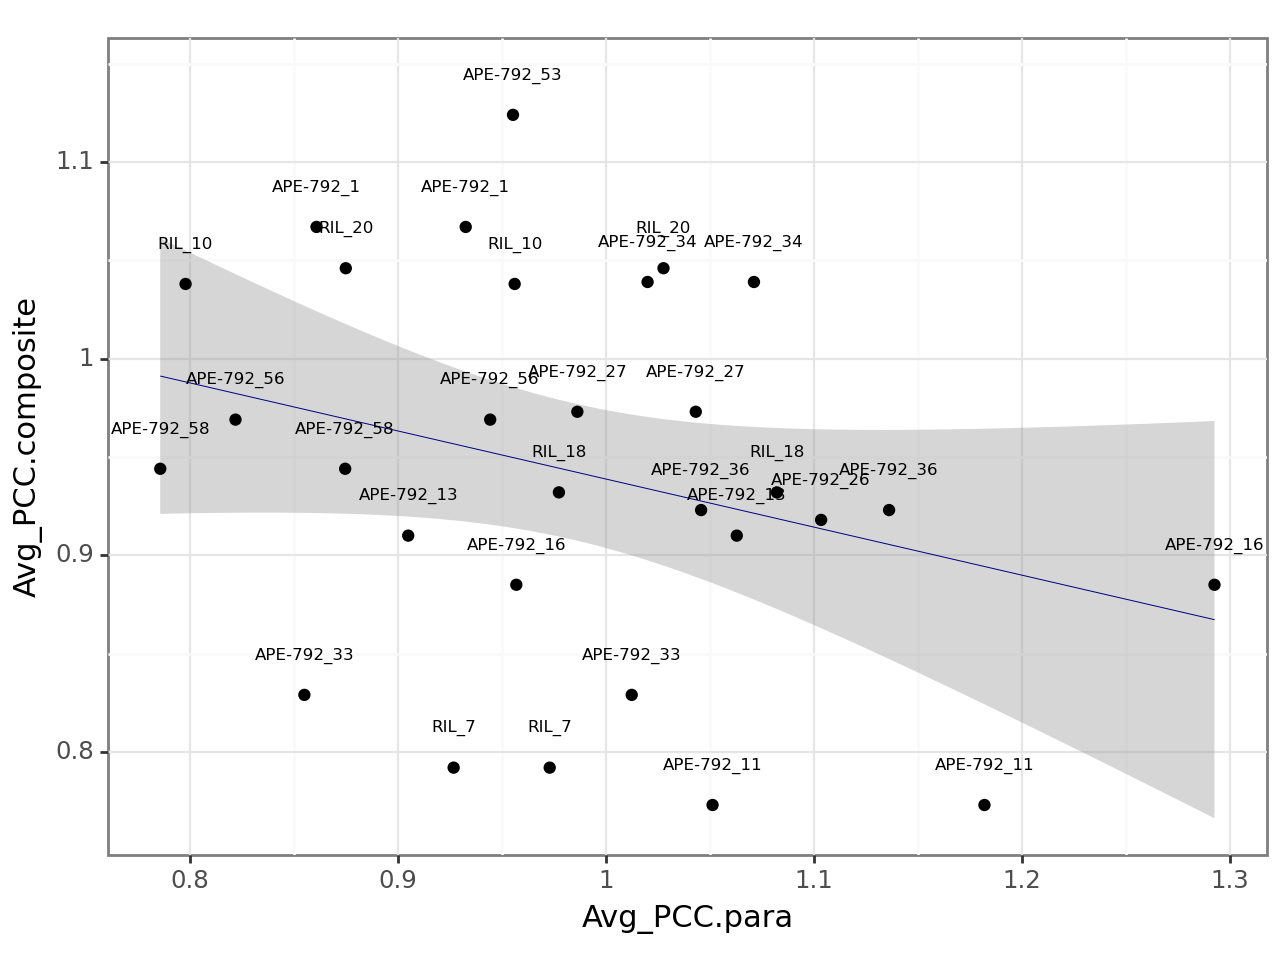


correlation for MTL_gm is -0.45 with p-value of 0.0116


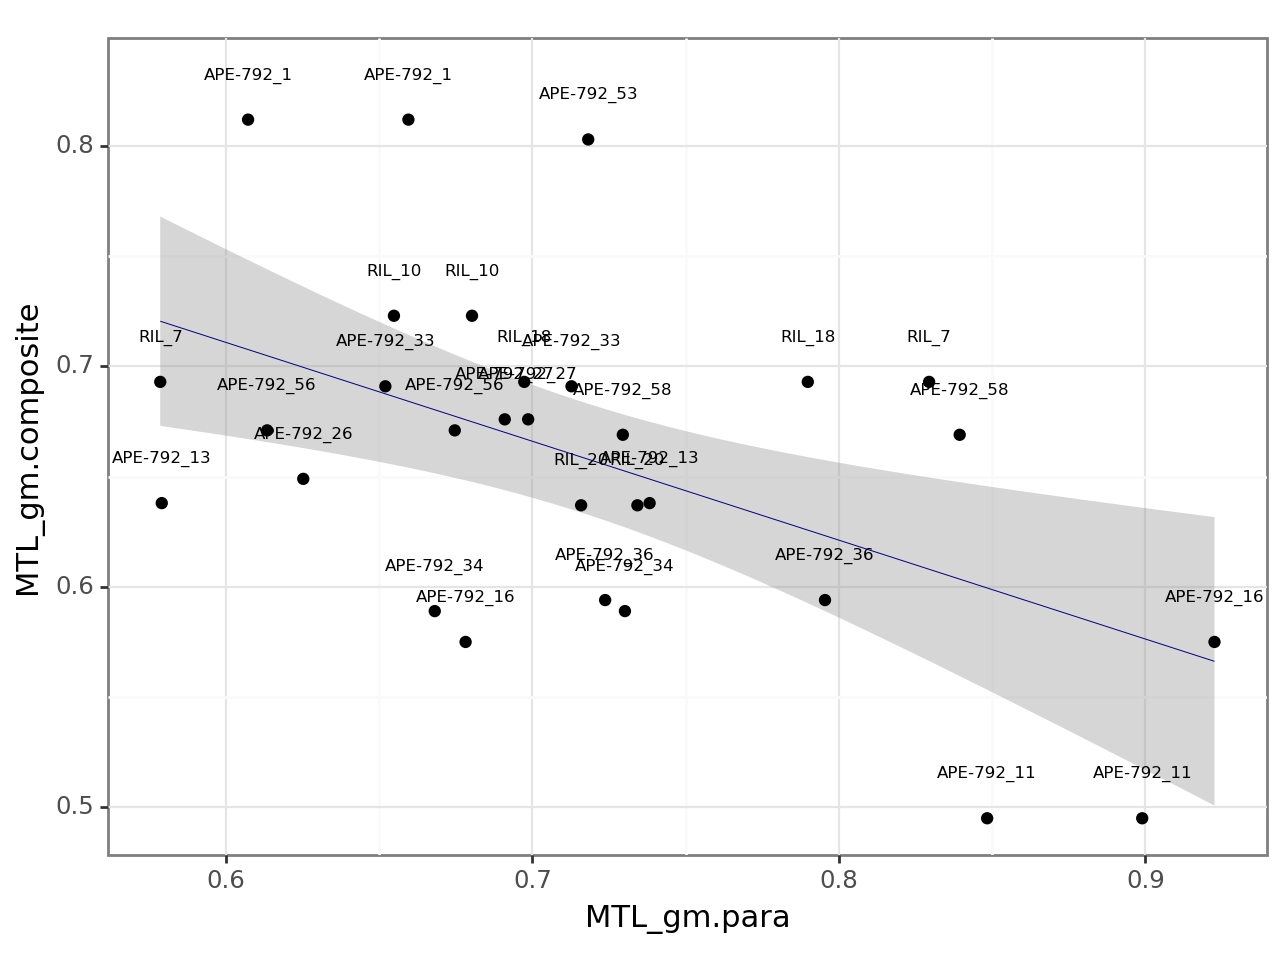


correlation for AC_gm is -0.26 with p-value of 0.1652


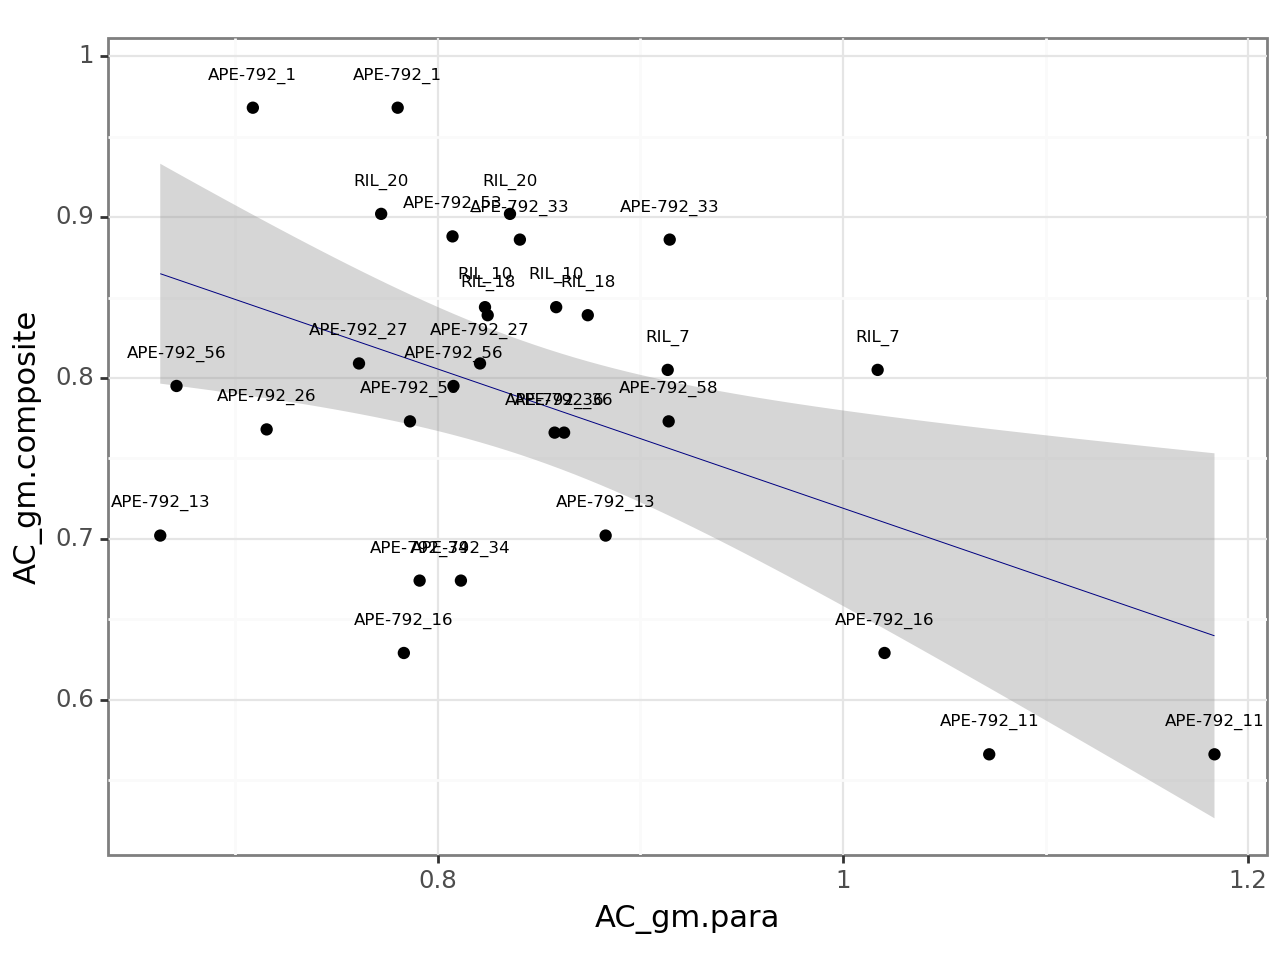


correlation for Precun_gm is -0.24 with p-value of 0.1933


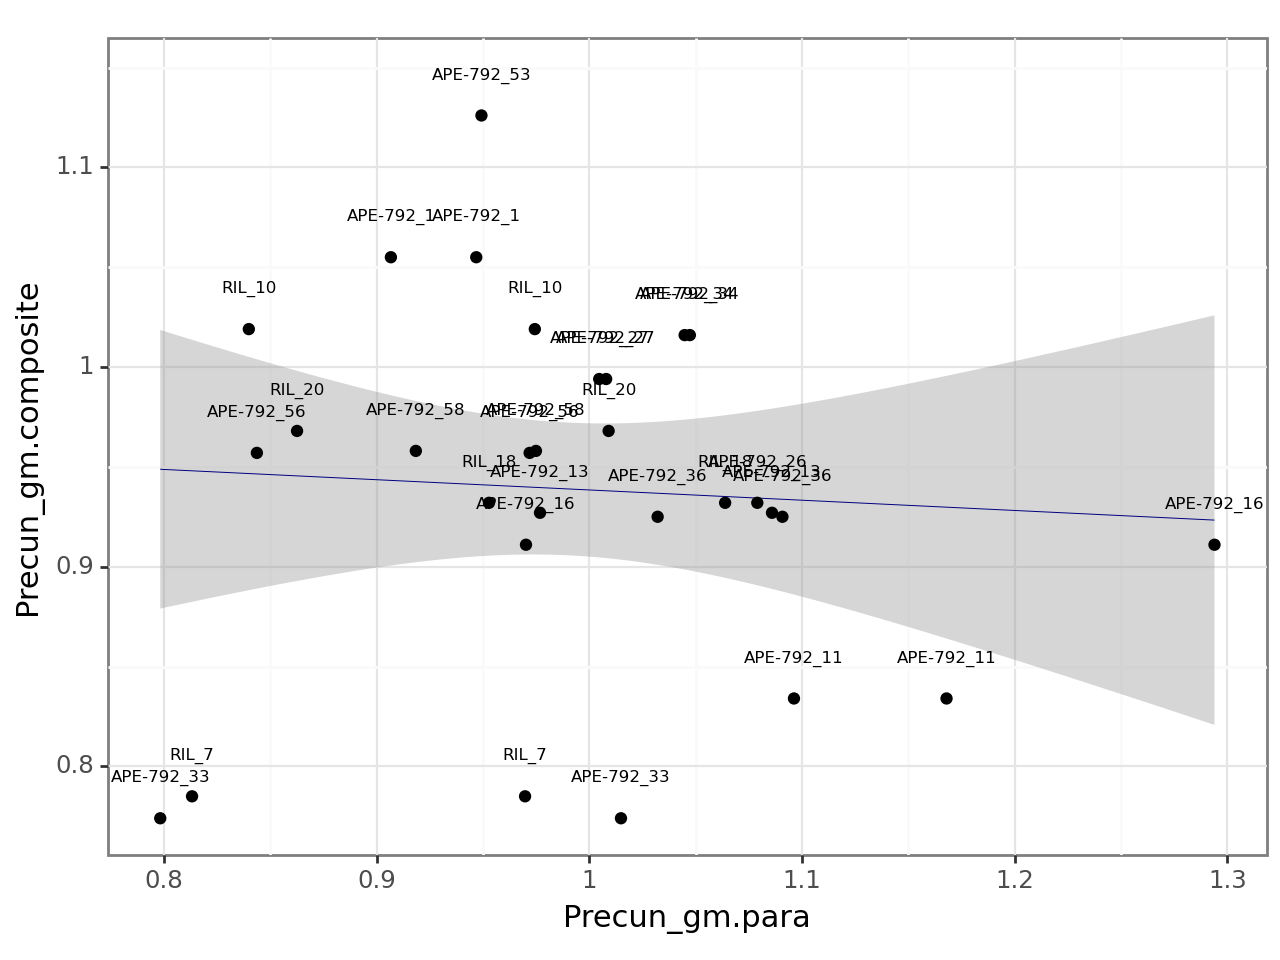


correlation for Par_gm is -0.06 with p-value of 0.7707


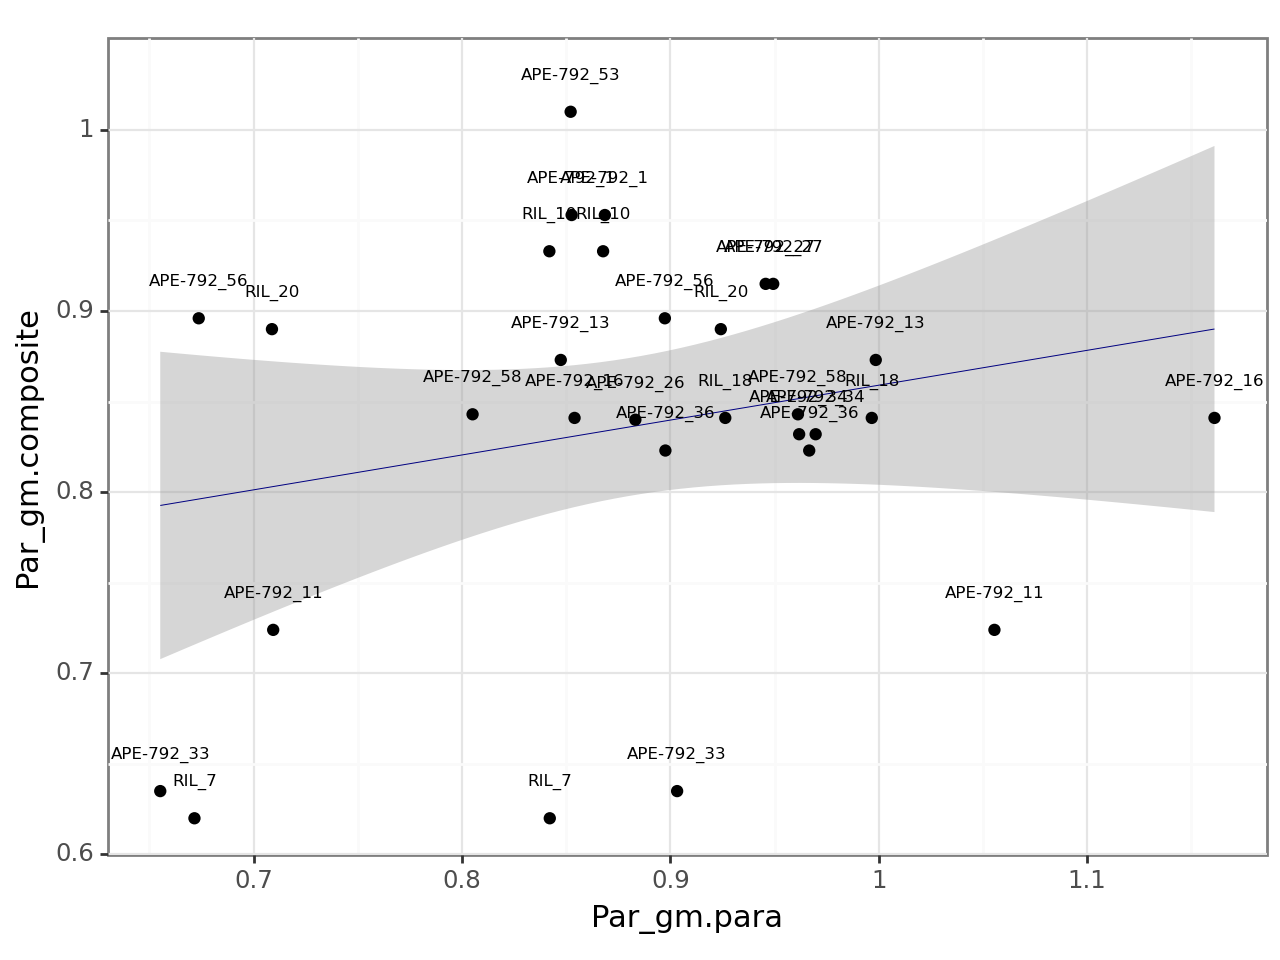


correlation for Temp_gm is -0.22 with p-value of 0.2487


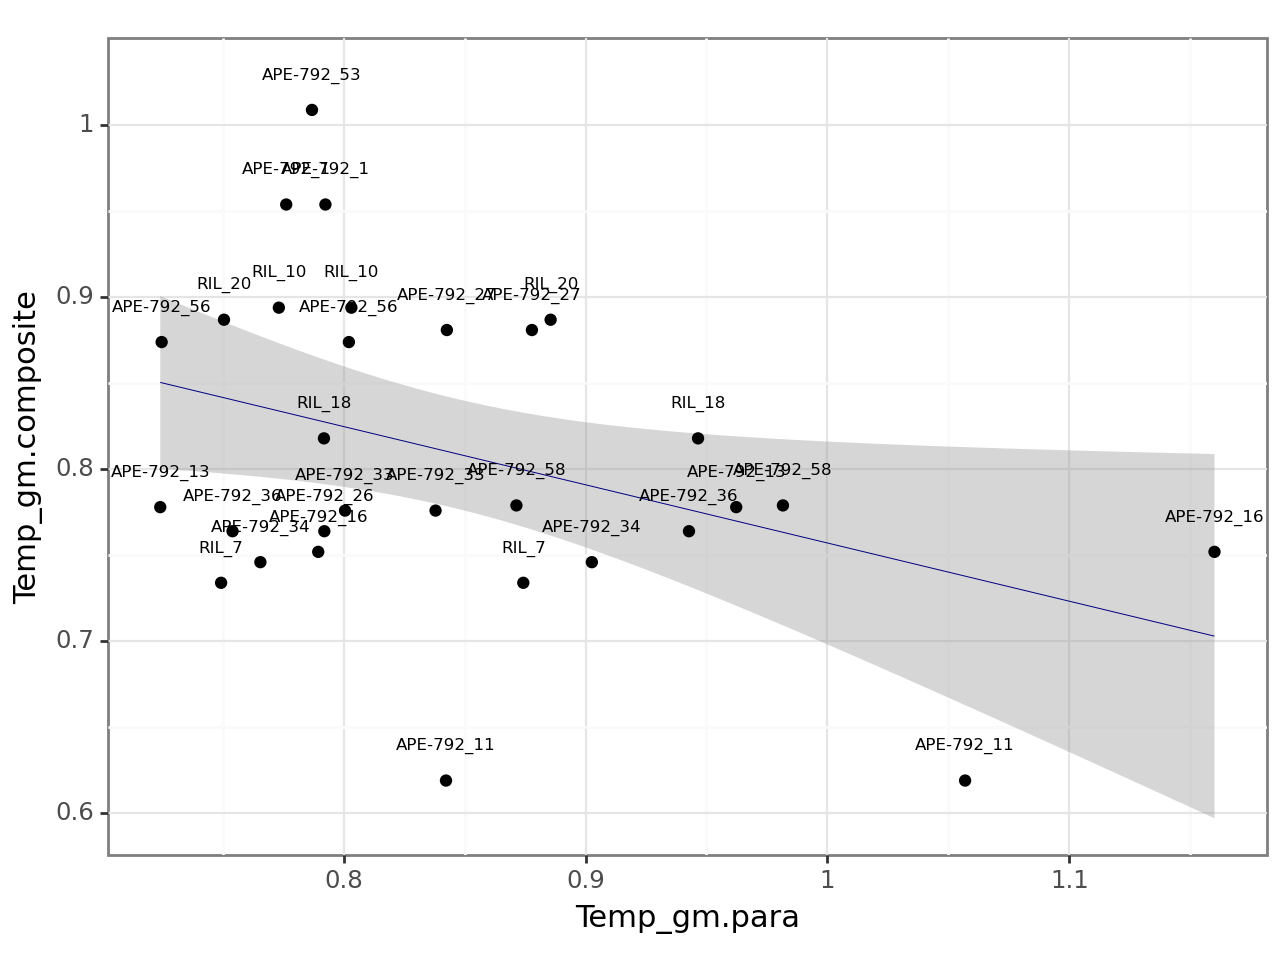


correlation for PostCing_gm is -0.23 with p-value of 0.2157


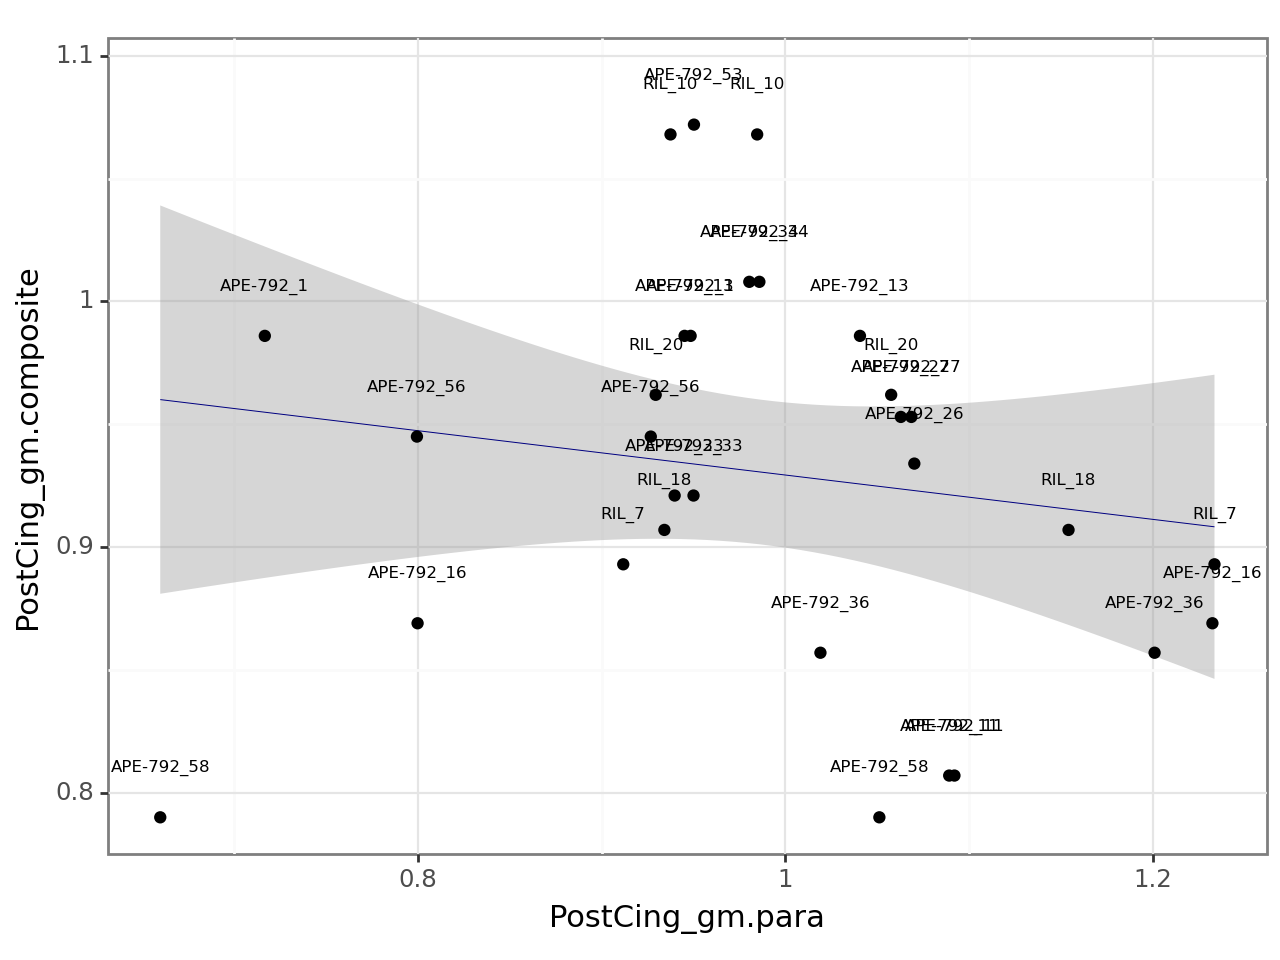

In [5]:
for var in [ele for ele in FDG_columns if (ele in para.columns) & (ele in composite.columns)]:
    temp1 = para.loc[para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = composite.loc[composite['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.para', '.composite'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.para'], temp_combined[var +'.composite'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.para', y = var +'.composite', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# composite and pons (0.32-0.63 correlation)

correlation for MTL_gm is 0.17 with p-value of 0.3604


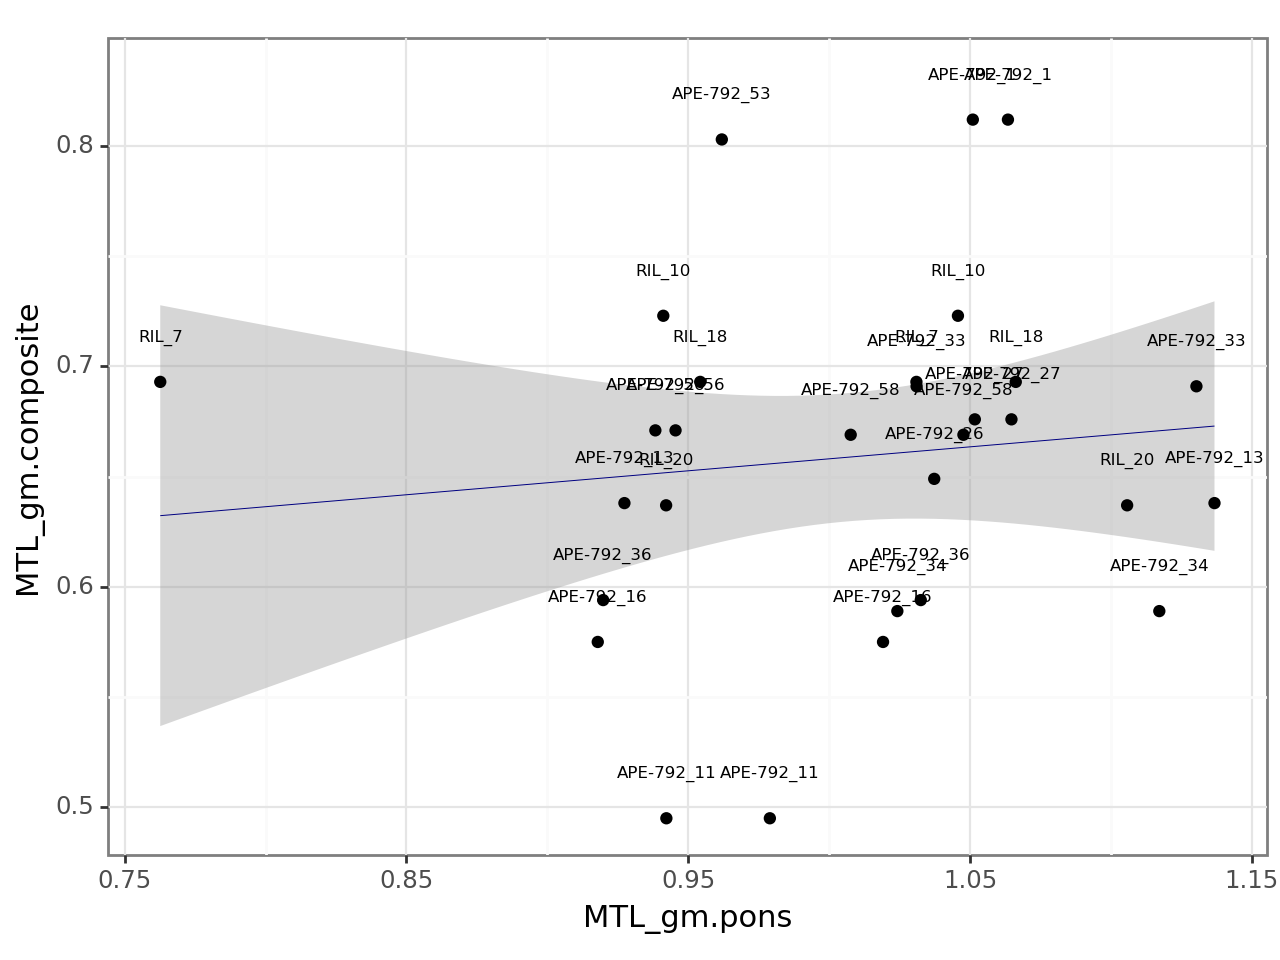


correlation for AC_gm is 0.2 with p-value of 0.2985


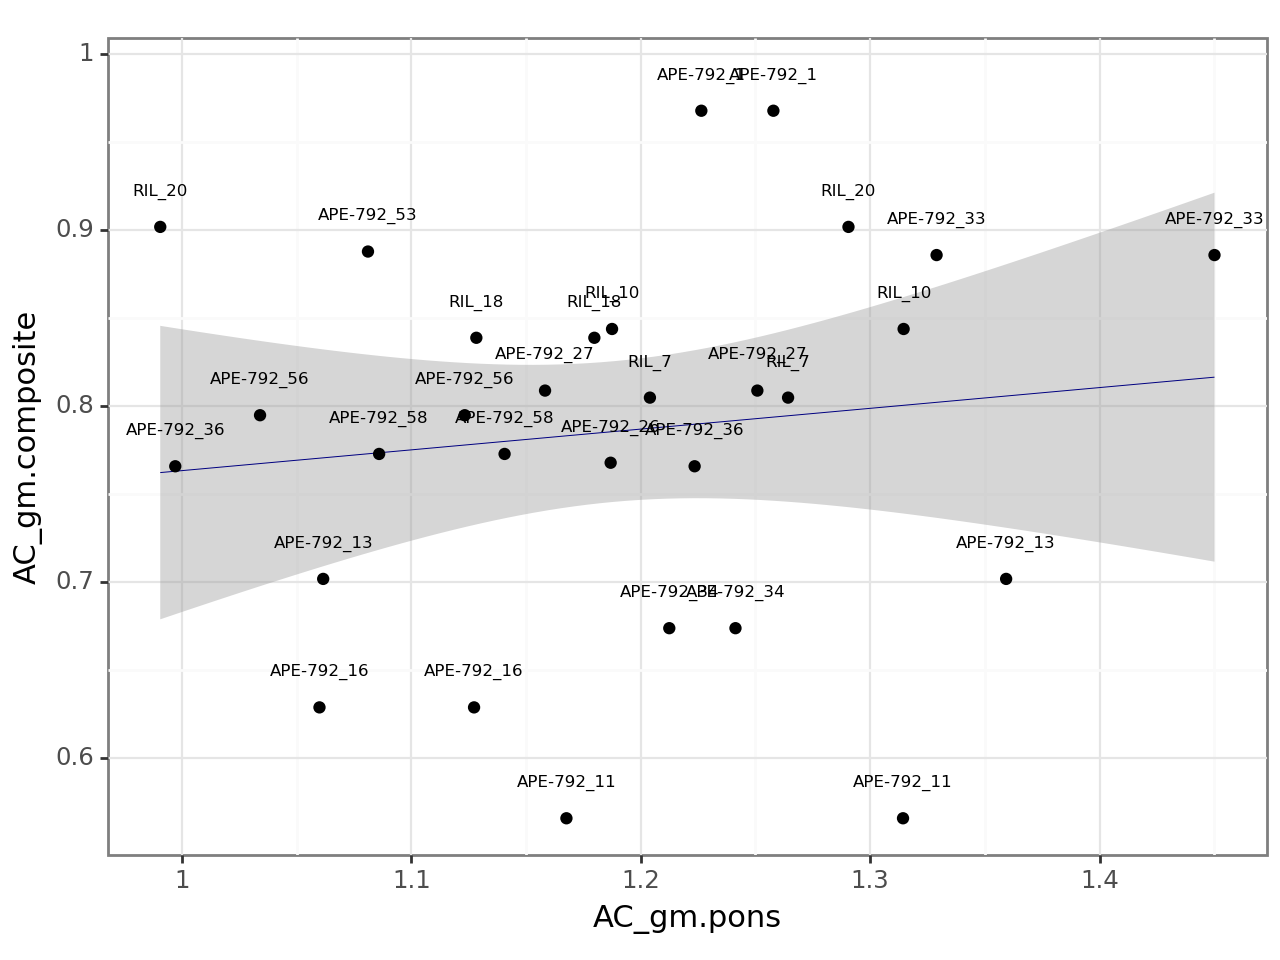


correlation for Precun_gm is 0.24 with p-value of 0.2044


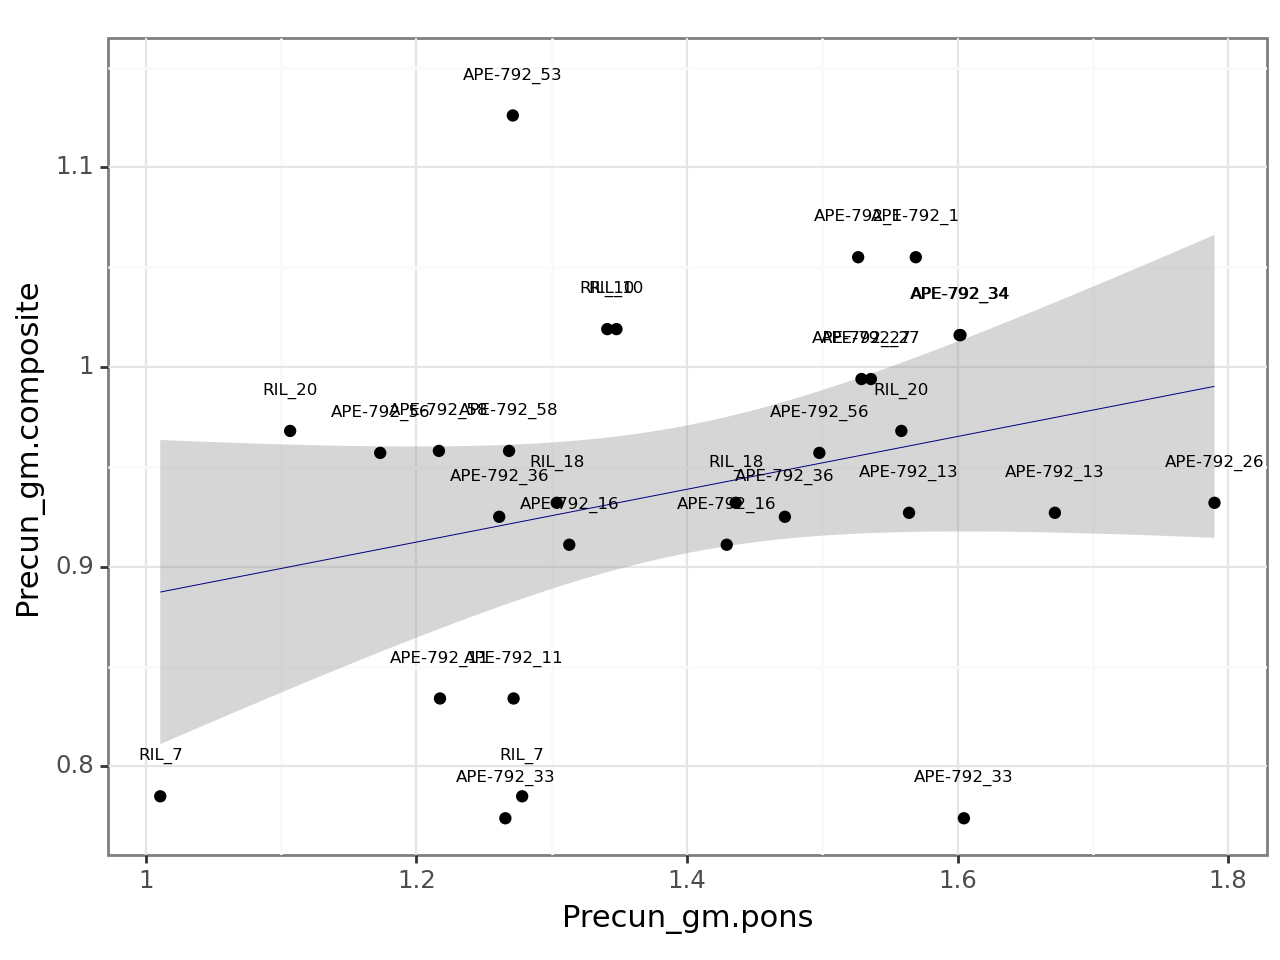


correlation for Par_gm is 0.26 with p-value of 0.1582


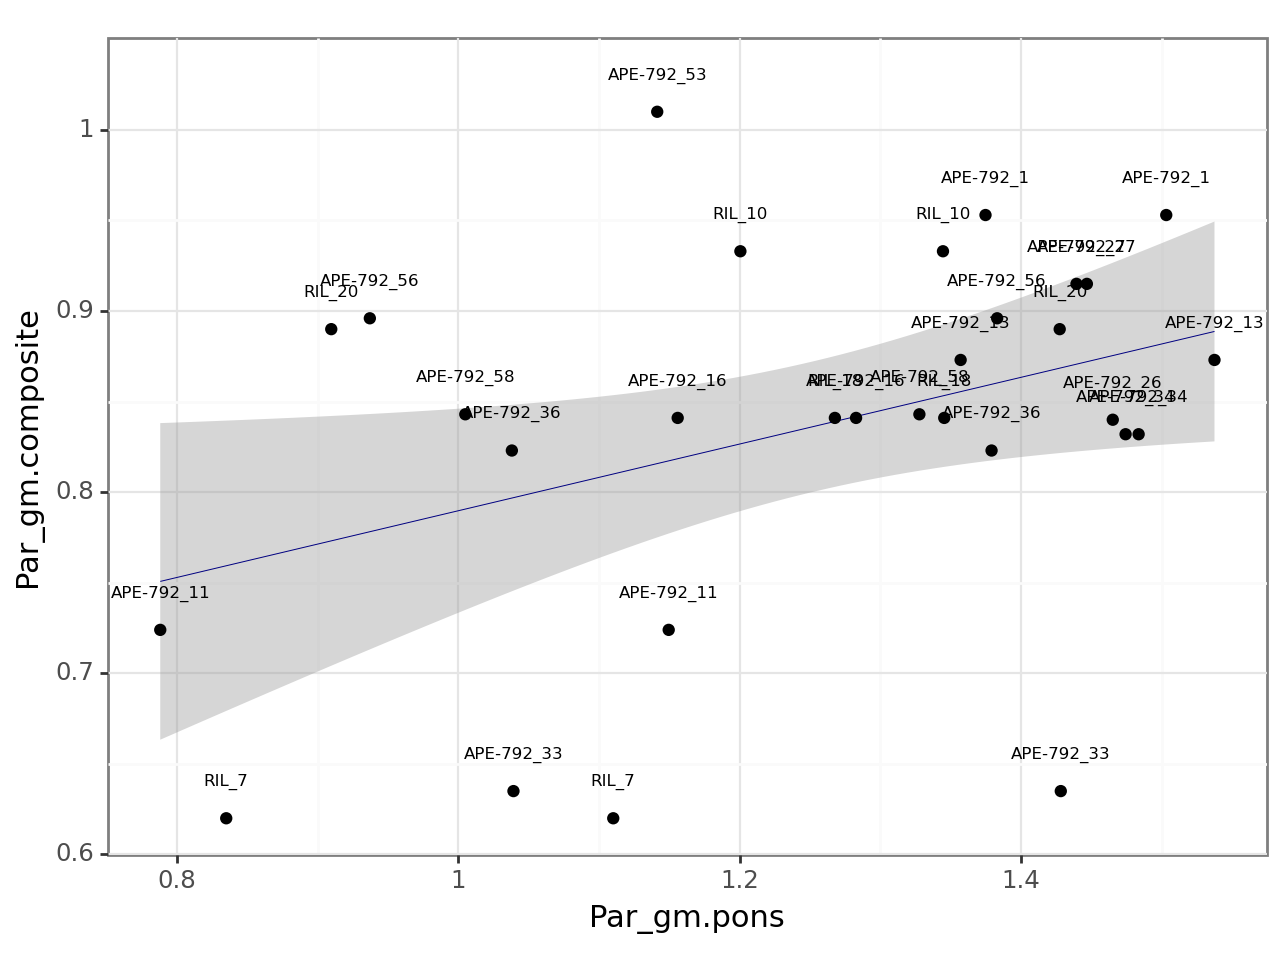


correlation for Temp_gm is 0.15 with p-value of 0.4171


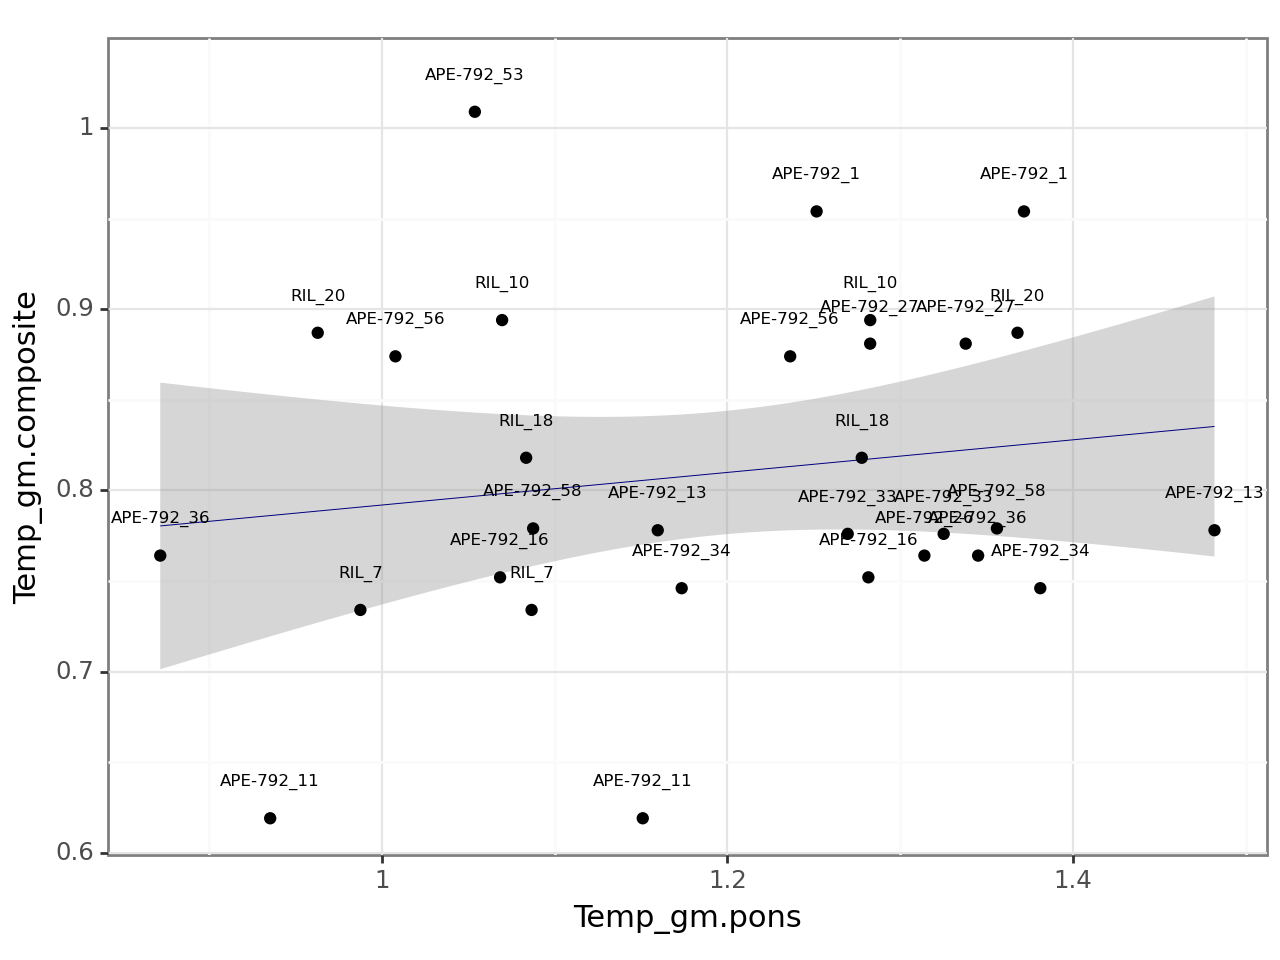


correlation for PostCing_gm is 0.37 with p-value of 0.042


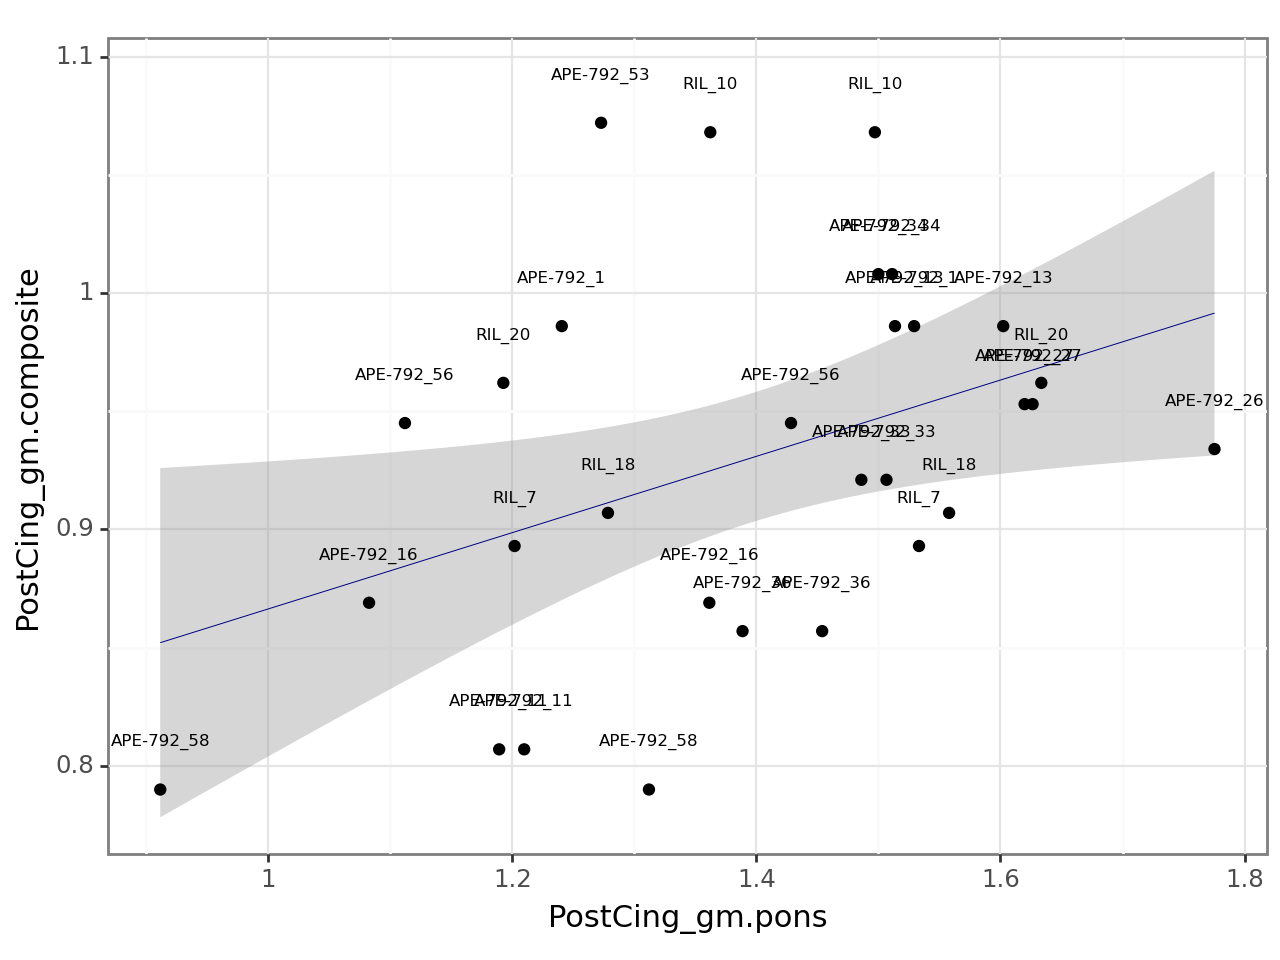

In [6]:
for var in [ele for ele in FDG_columns if (ele in pons.columns) & (ele in composite.columns)]:
    temp1 = pons.loc[pons['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = composite.loc[composite['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.pons', '.composite'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.pons'], temp_combined[var +'.composite'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.pons', y = var +'.composite', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# composite and new_para: (1.0 correlation)

correlation for MTL_gm is 1.0 with p-value of 0.0


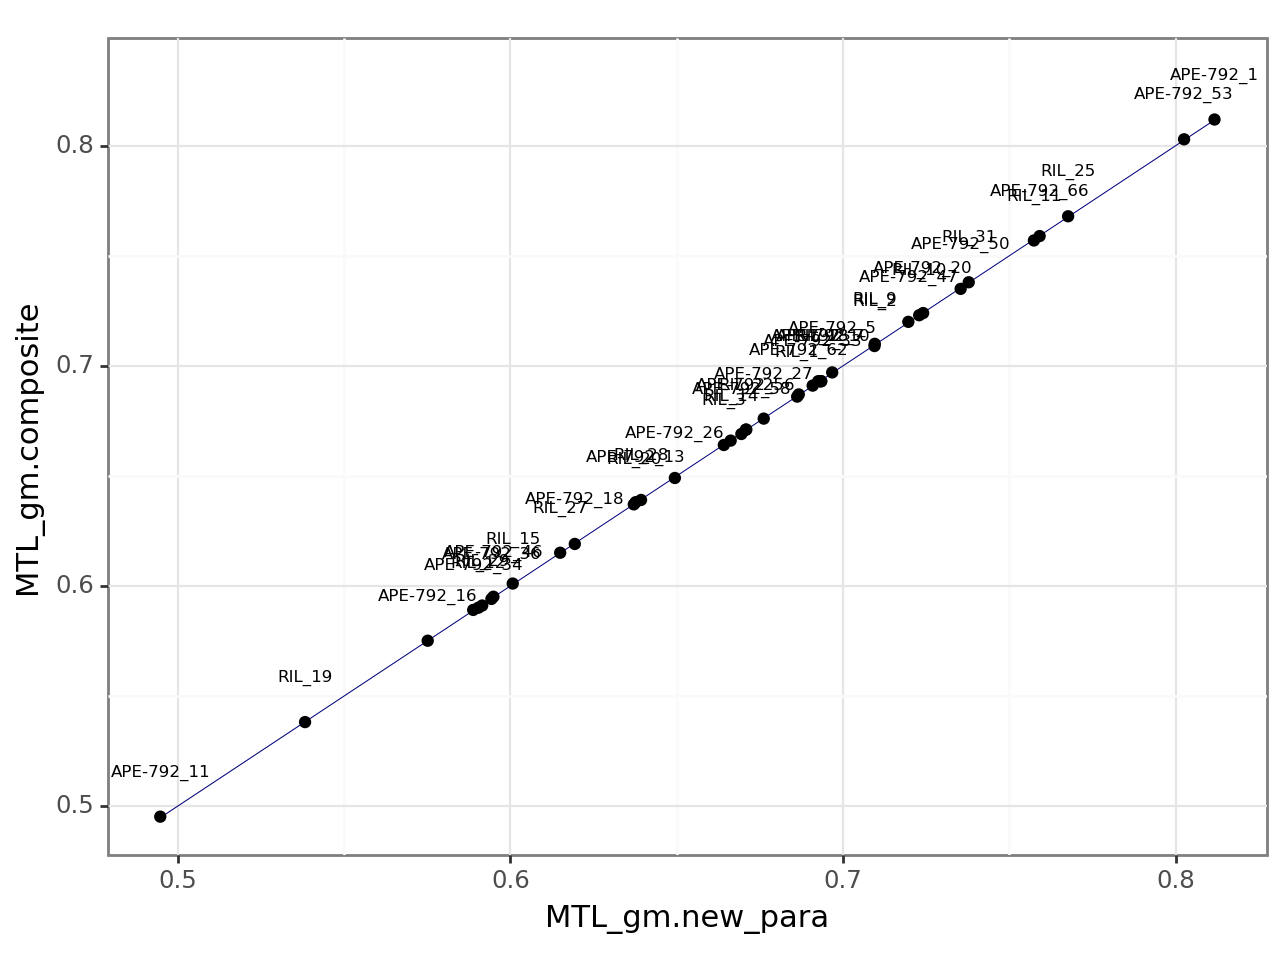


correlation for FRONTAL_gm is 1.0 with p-value of 0.0


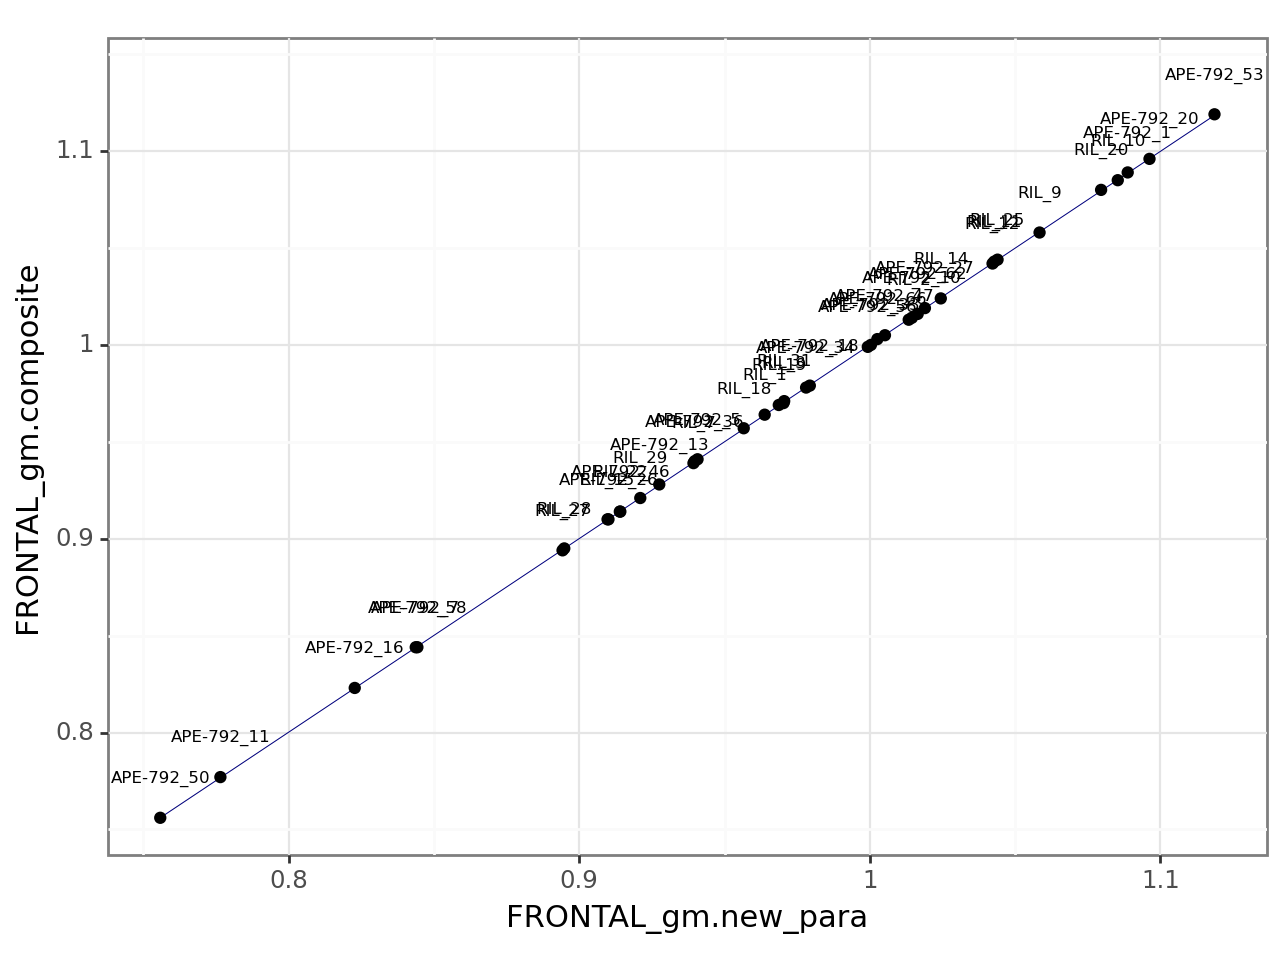


correlation for AC_gm is 1.0 with p-value of 0.0


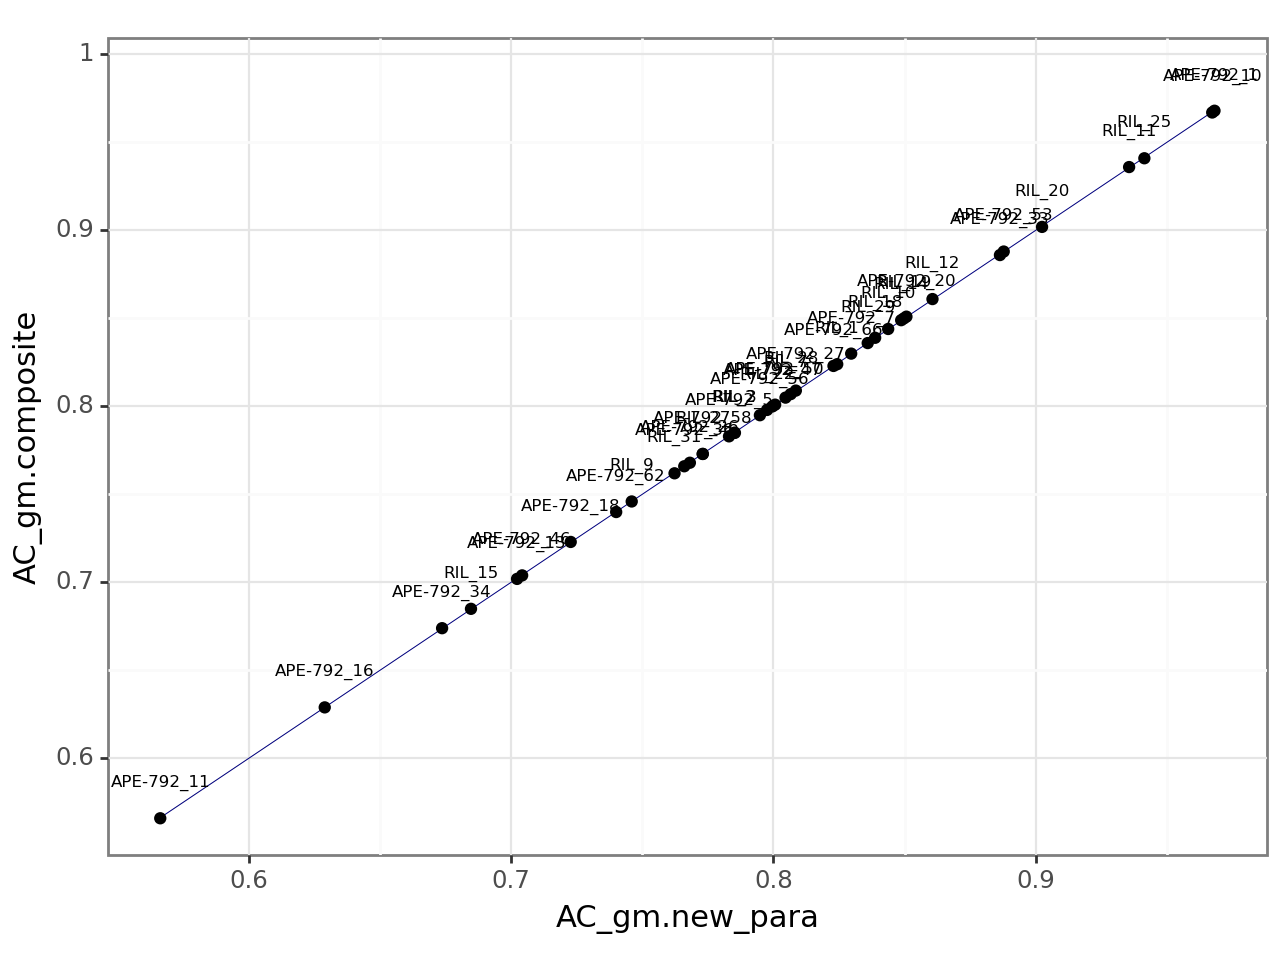


correlation for Precun_gm is 1.0 with p-value of 0.0


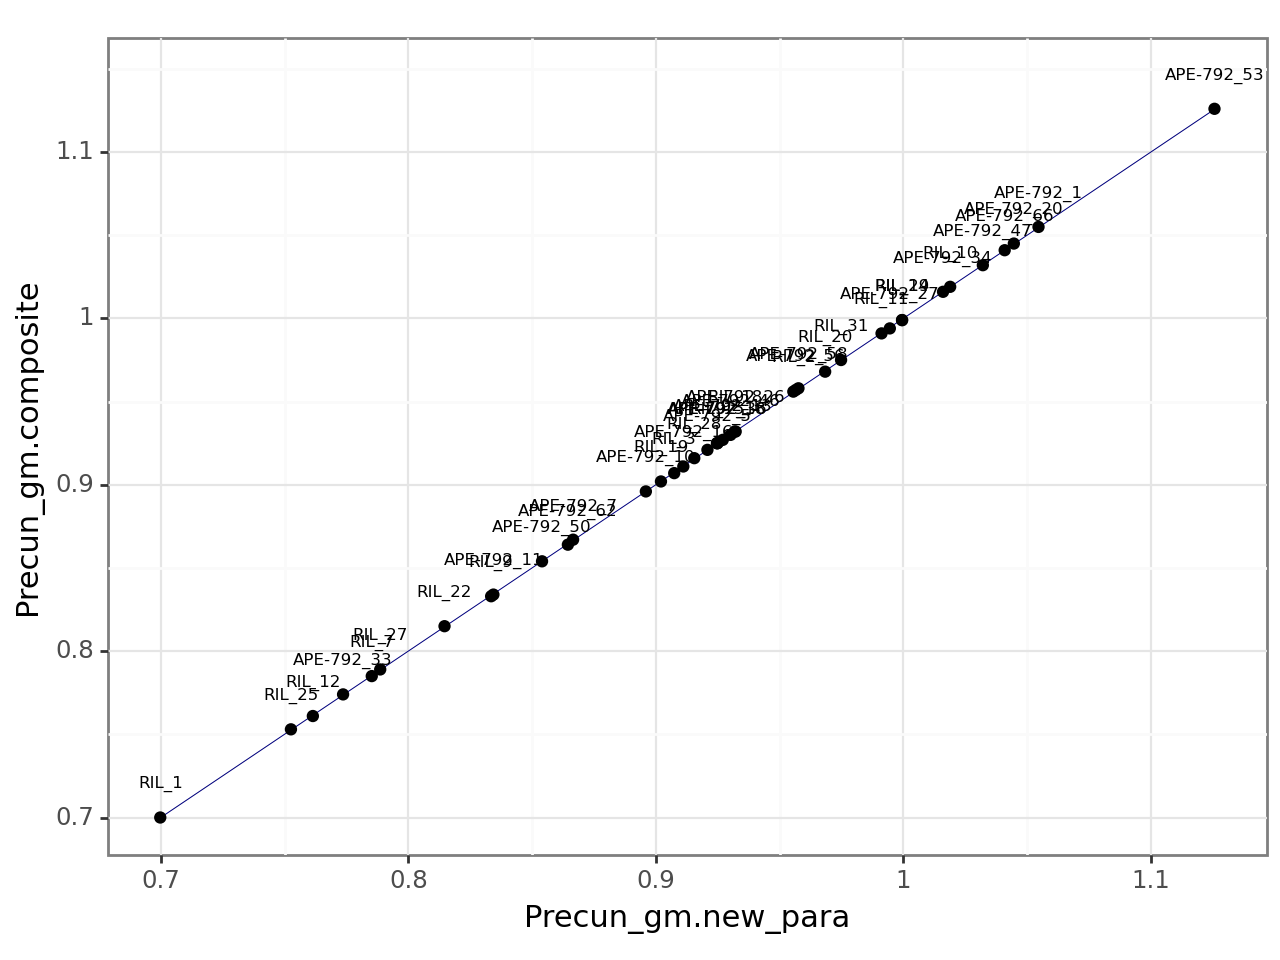


correlation for Par_gm is 1.0 with p-value of 0.0


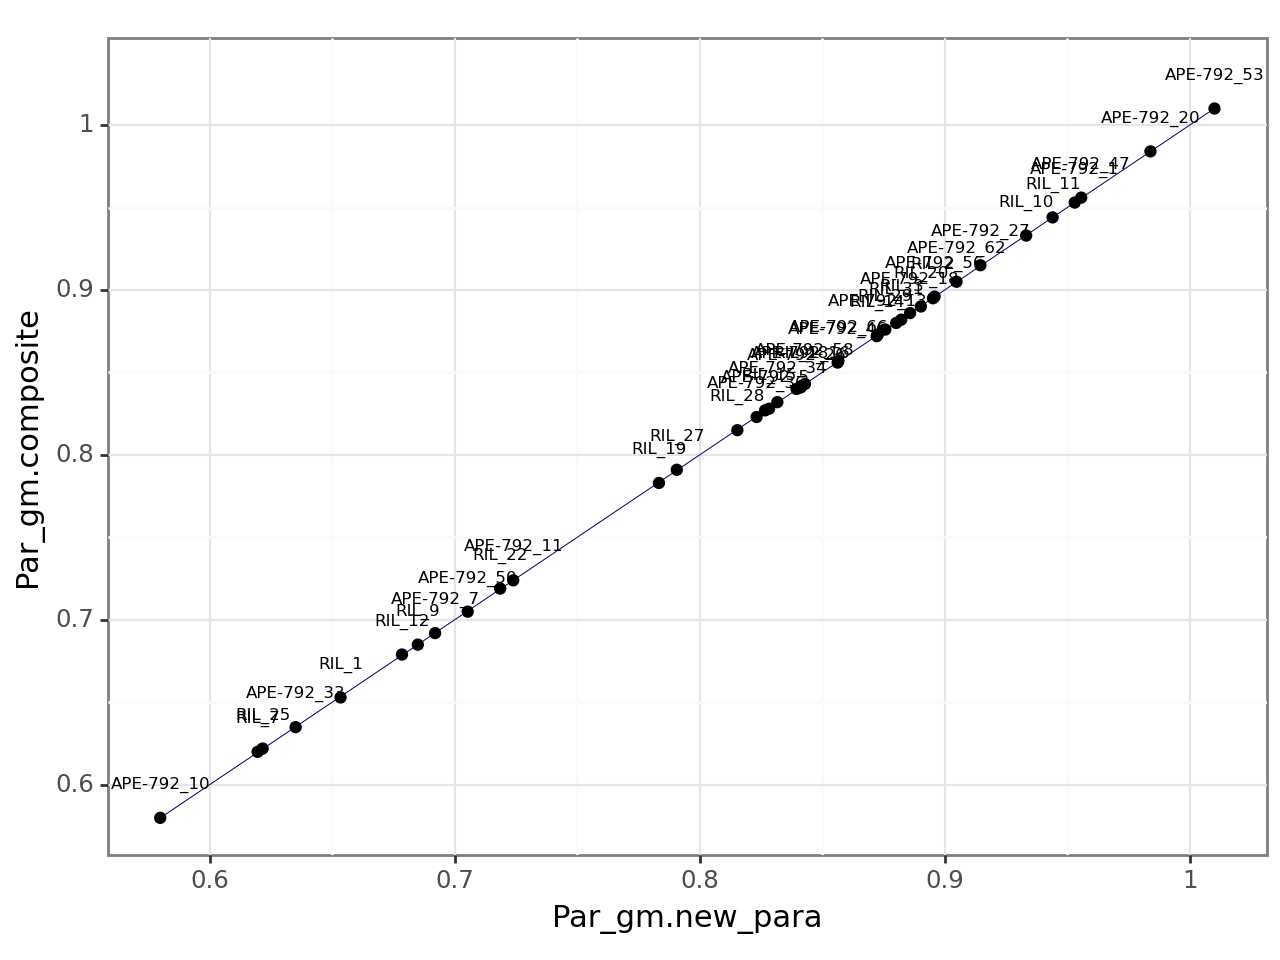


correlation for Temp_gm is 1.0 with p-value of 0.0


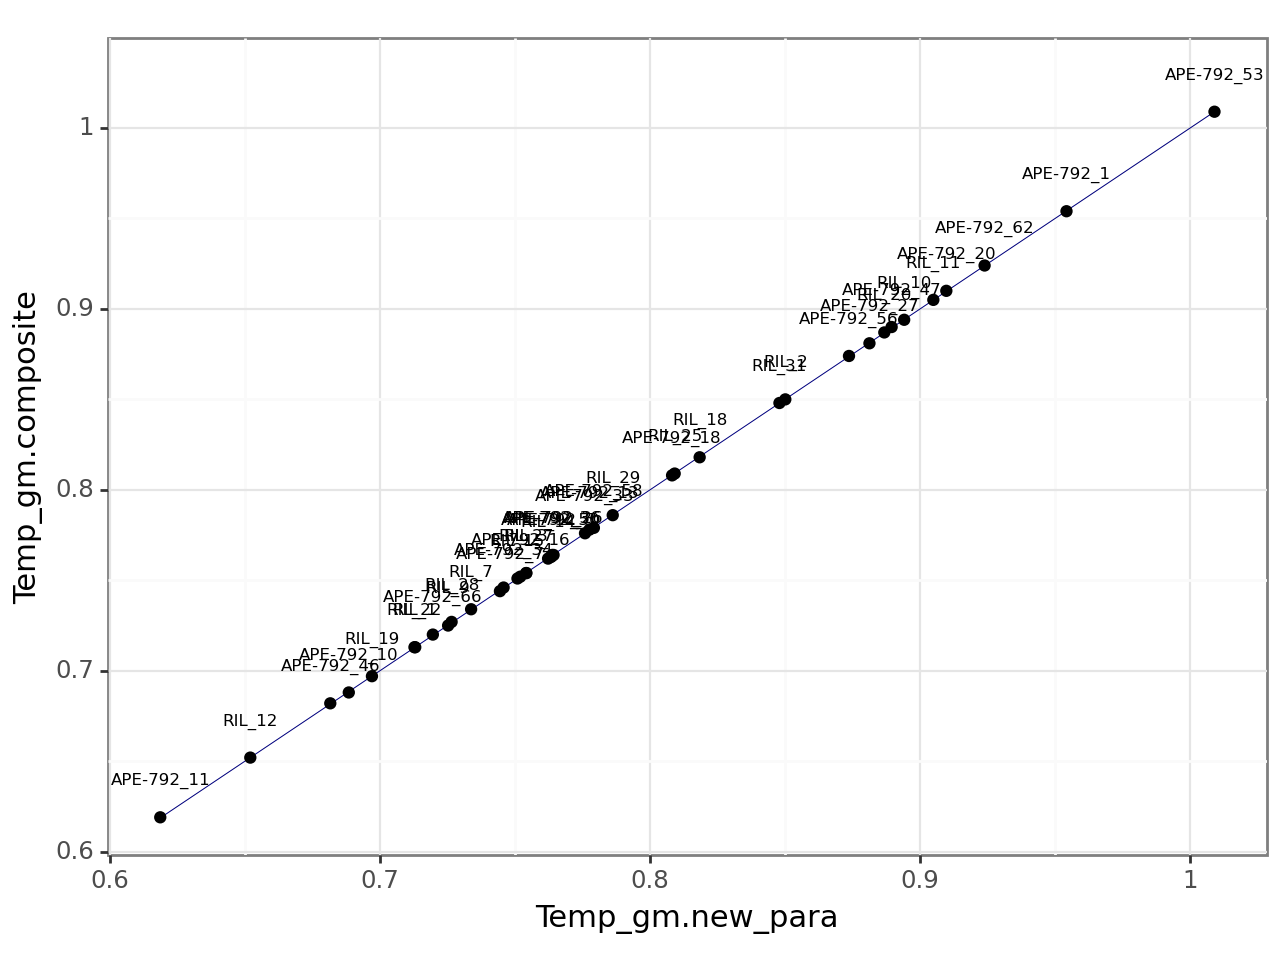


correlation for PostCing_gm is 1.0 with p-value of 0.0


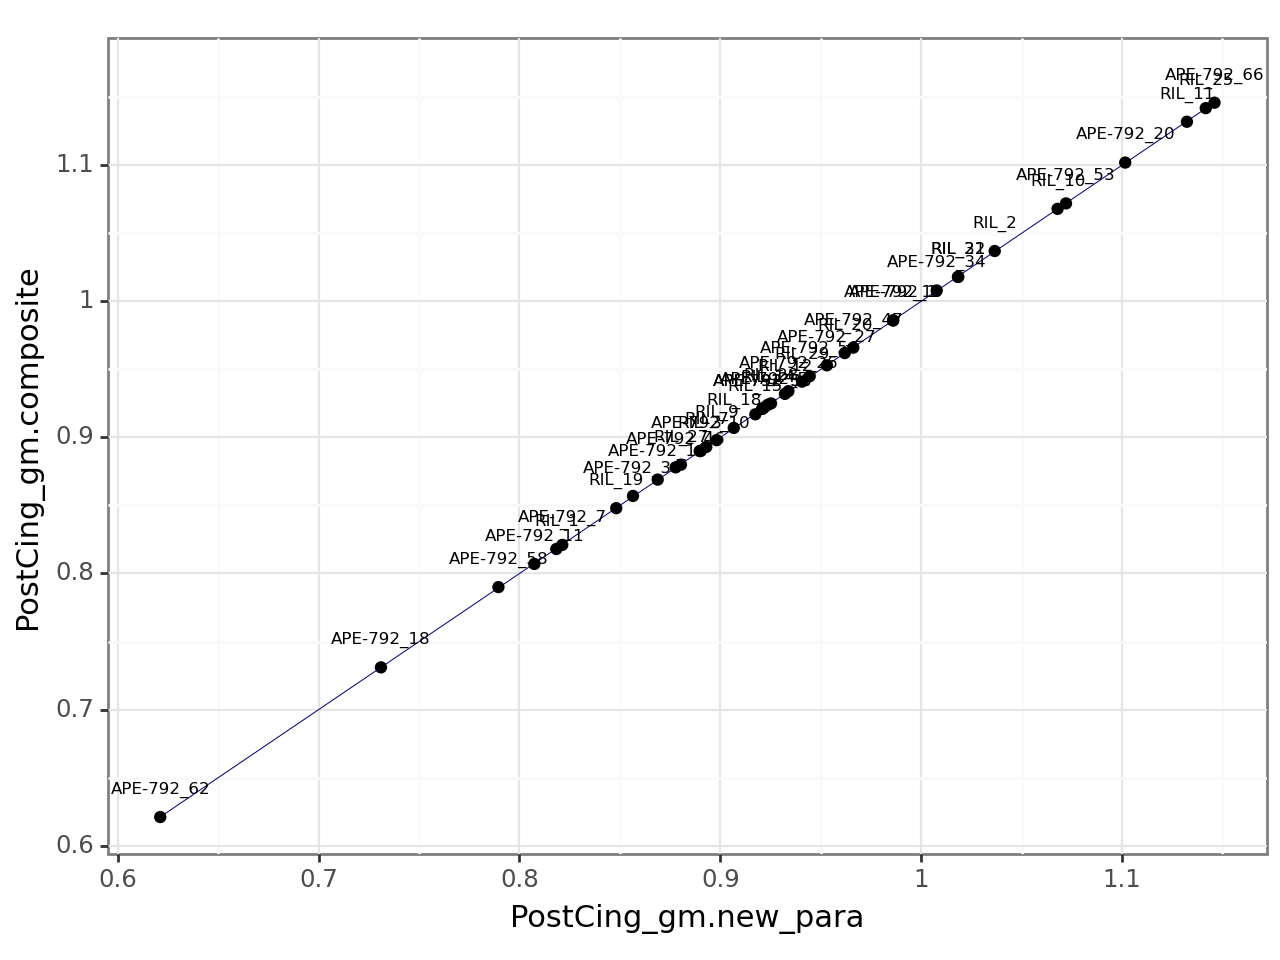

In [7]:
for var in [ele for ele in FDG_columns if (ele in new_para.columns) & (ele in composite.columns)]:
    temp1 = new_para.loc[new_para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = composite.loc[composite['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.new_para', '.composite'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.new_para'], temp_combined[var +'.composite'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.new_para', y = var +'.composite', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# composite and ras (0.76-0.9 correlation)

correlation for Avg_PCC is 0.83 with p-value of 0.0


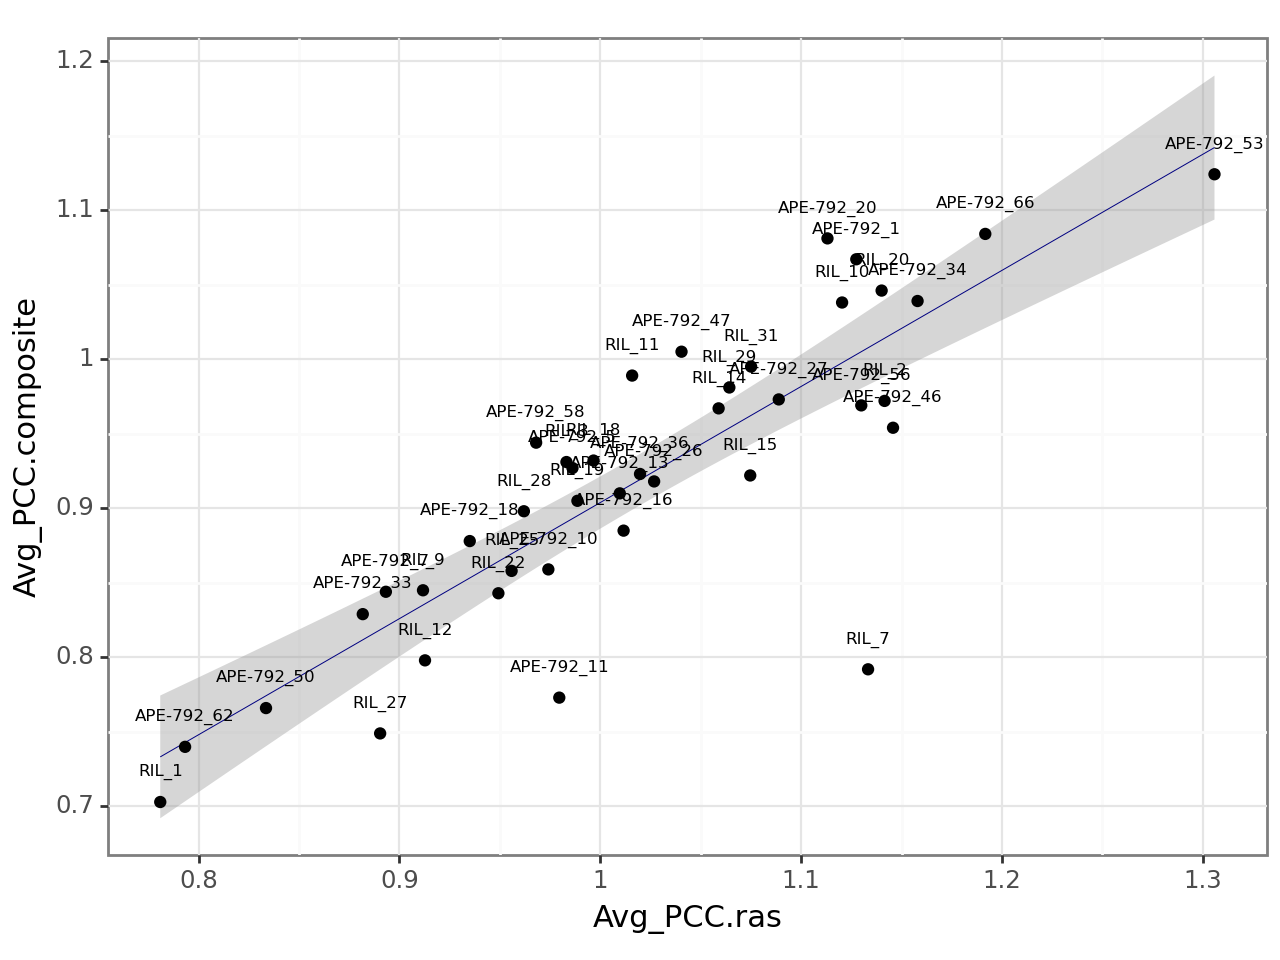


correlation for MTL_gm is 0.9 with p-value of 0.0


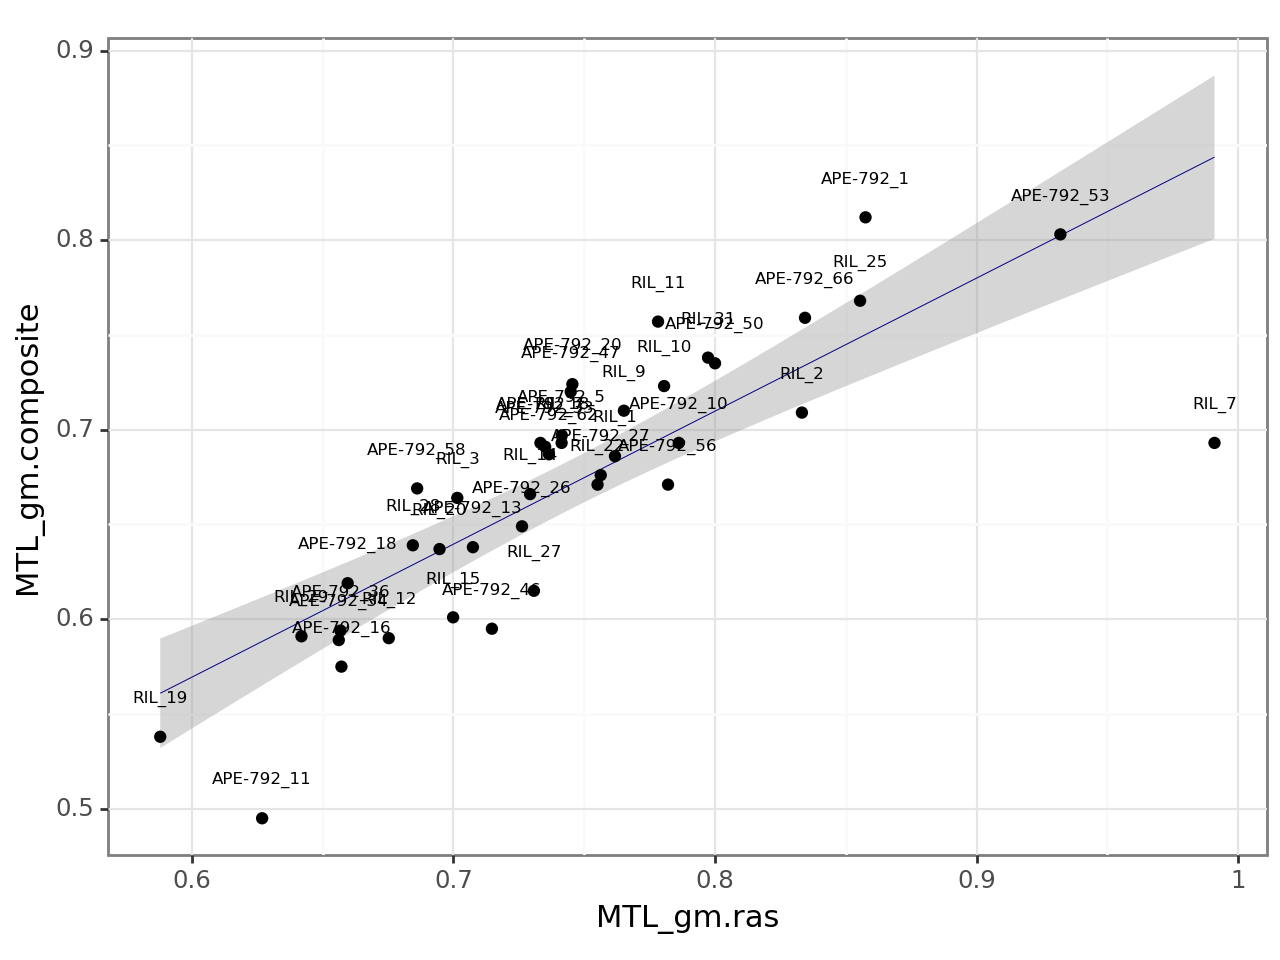


correlation for FRONTAL_gm is 0.79 with p-value of 0.0


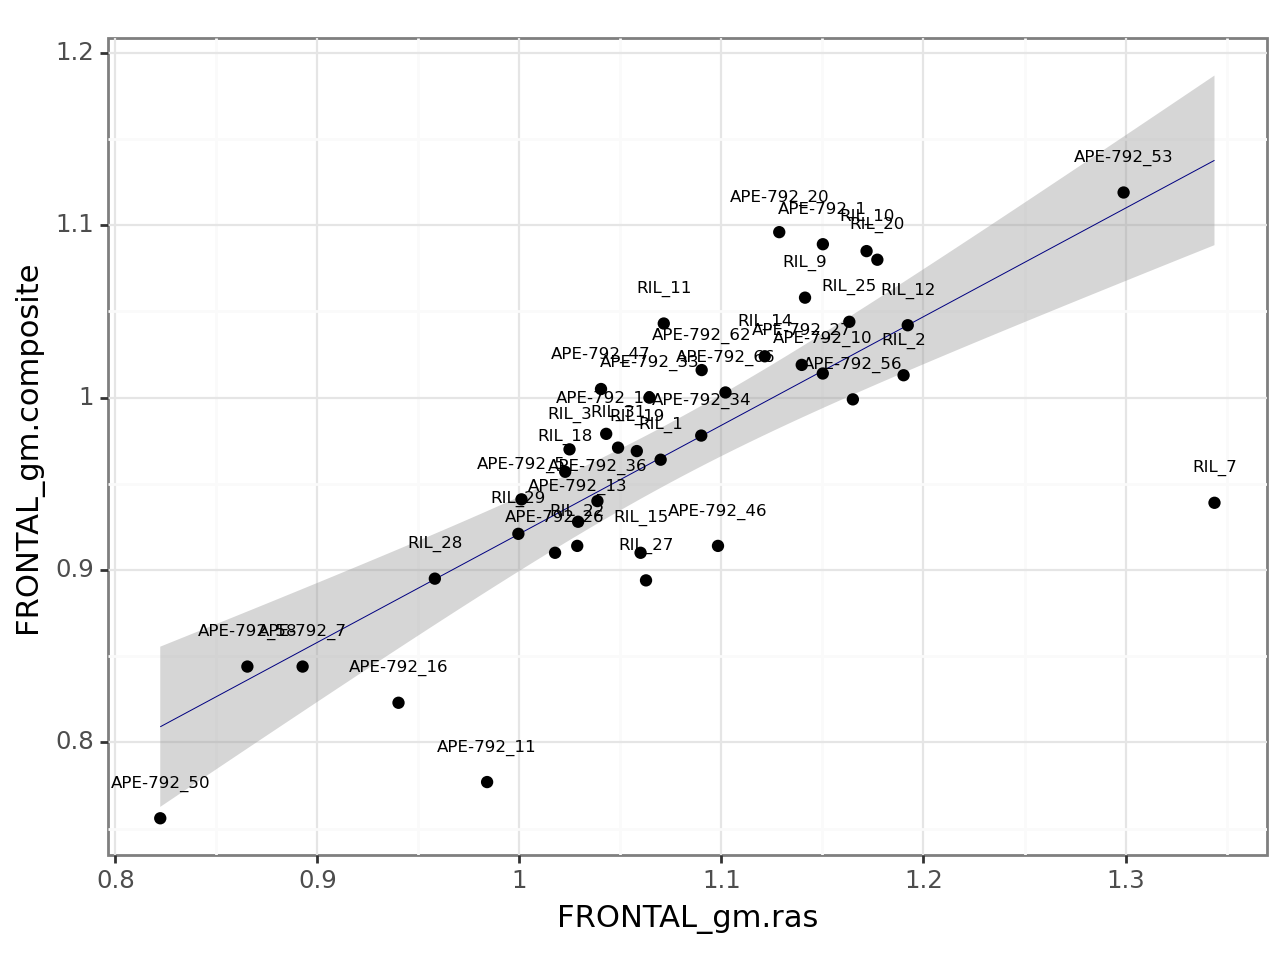


correlation for AC_gm is 0.86 with p-value of 0.0


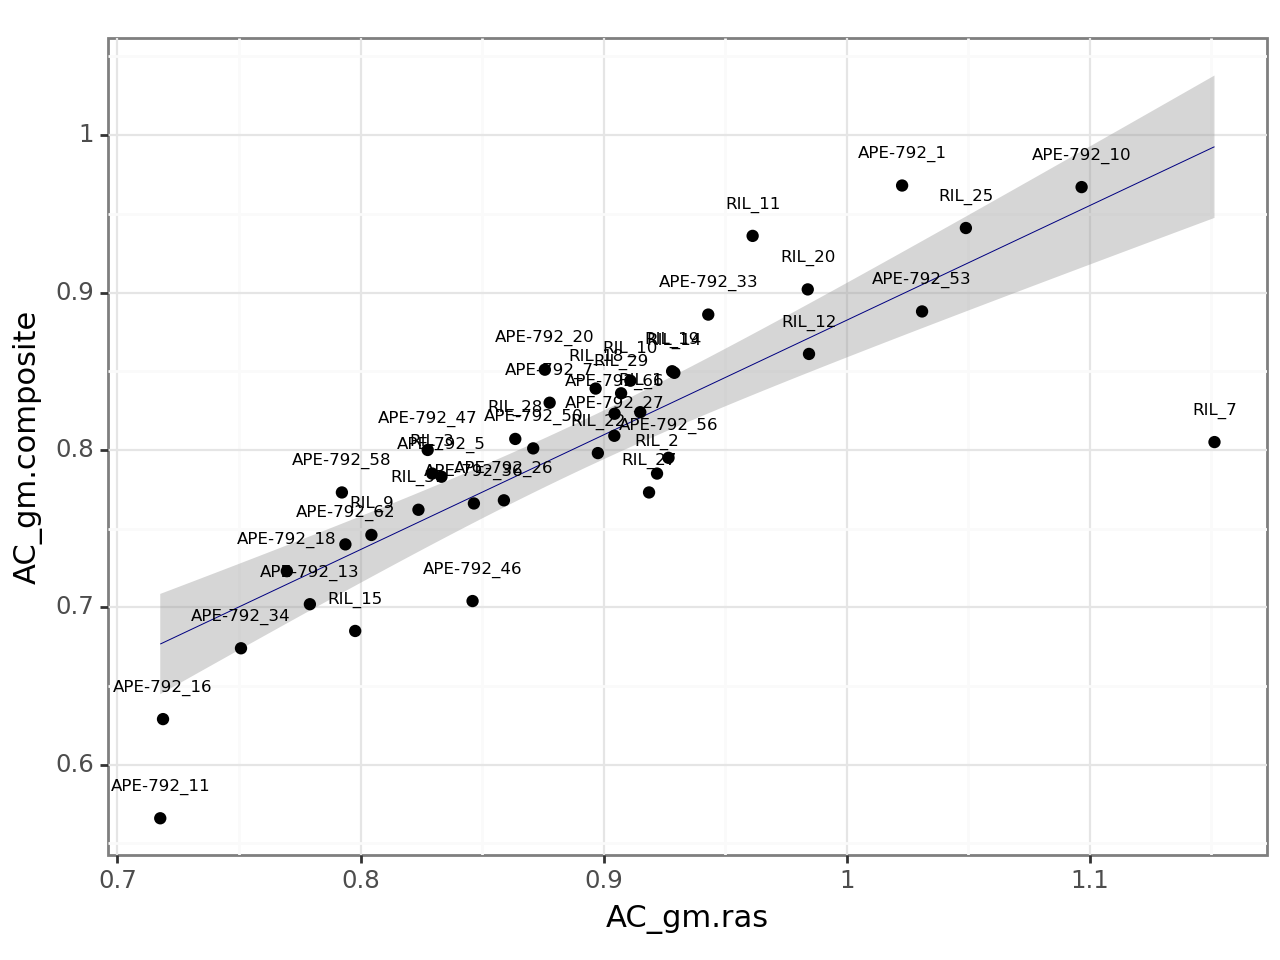


correlation for Precun_gm is 0.76 with p-value of 0.0


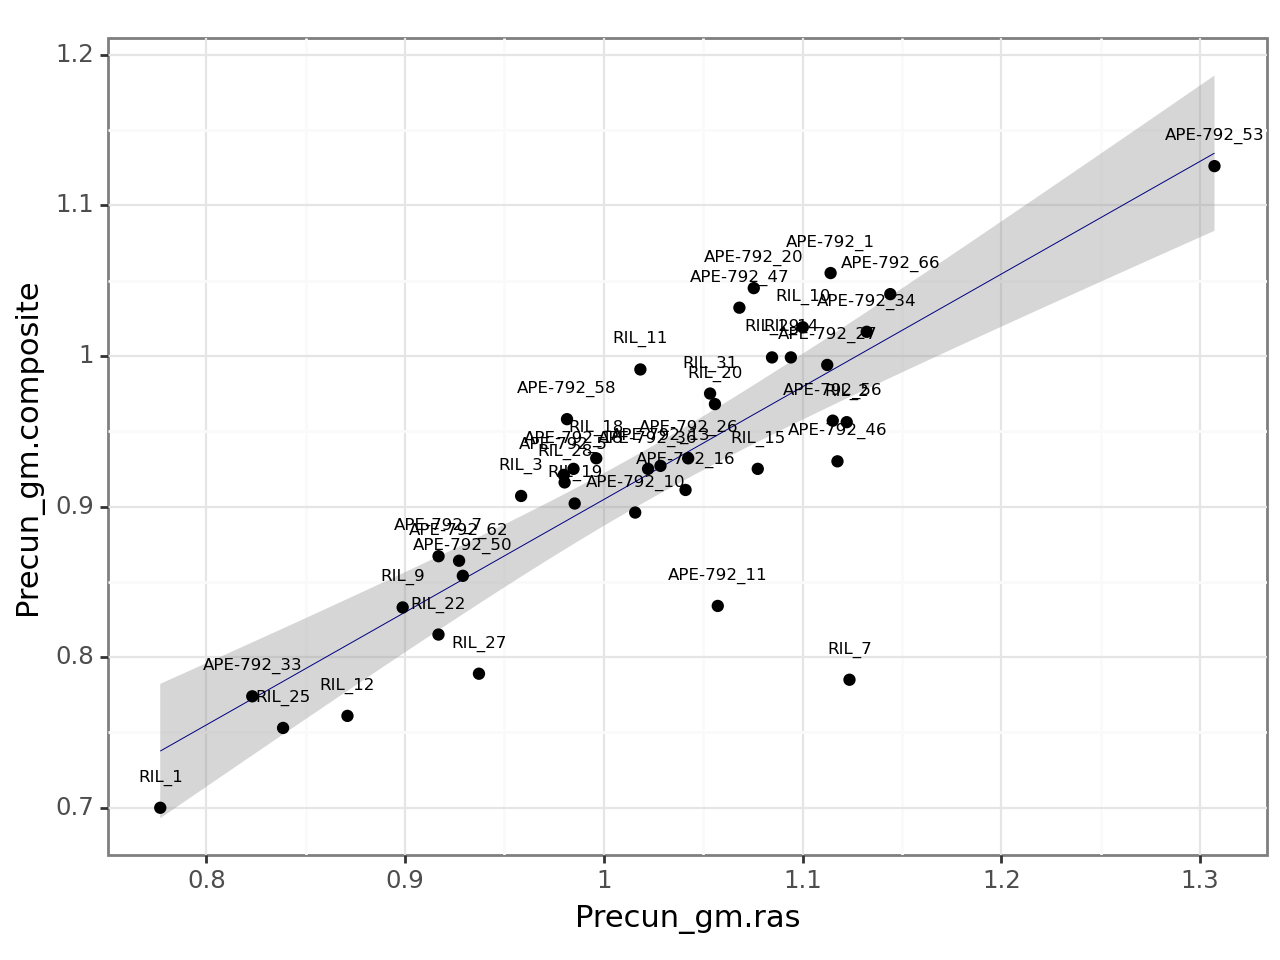


correlation for Par_gm is 0.89 with p-value of 0.0


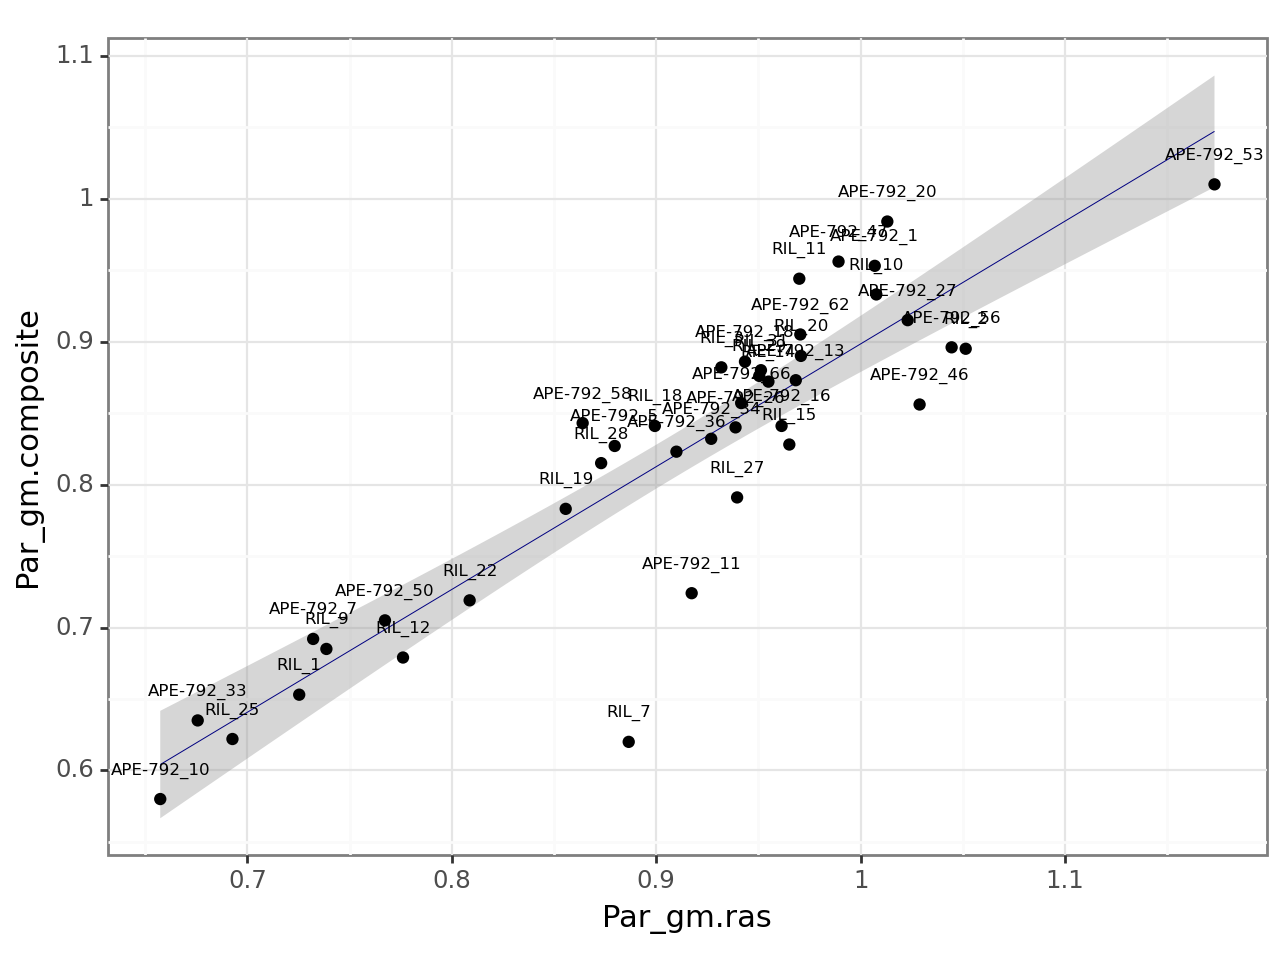


correlation for Temp_gm is 0.82 with p-value of 0.0


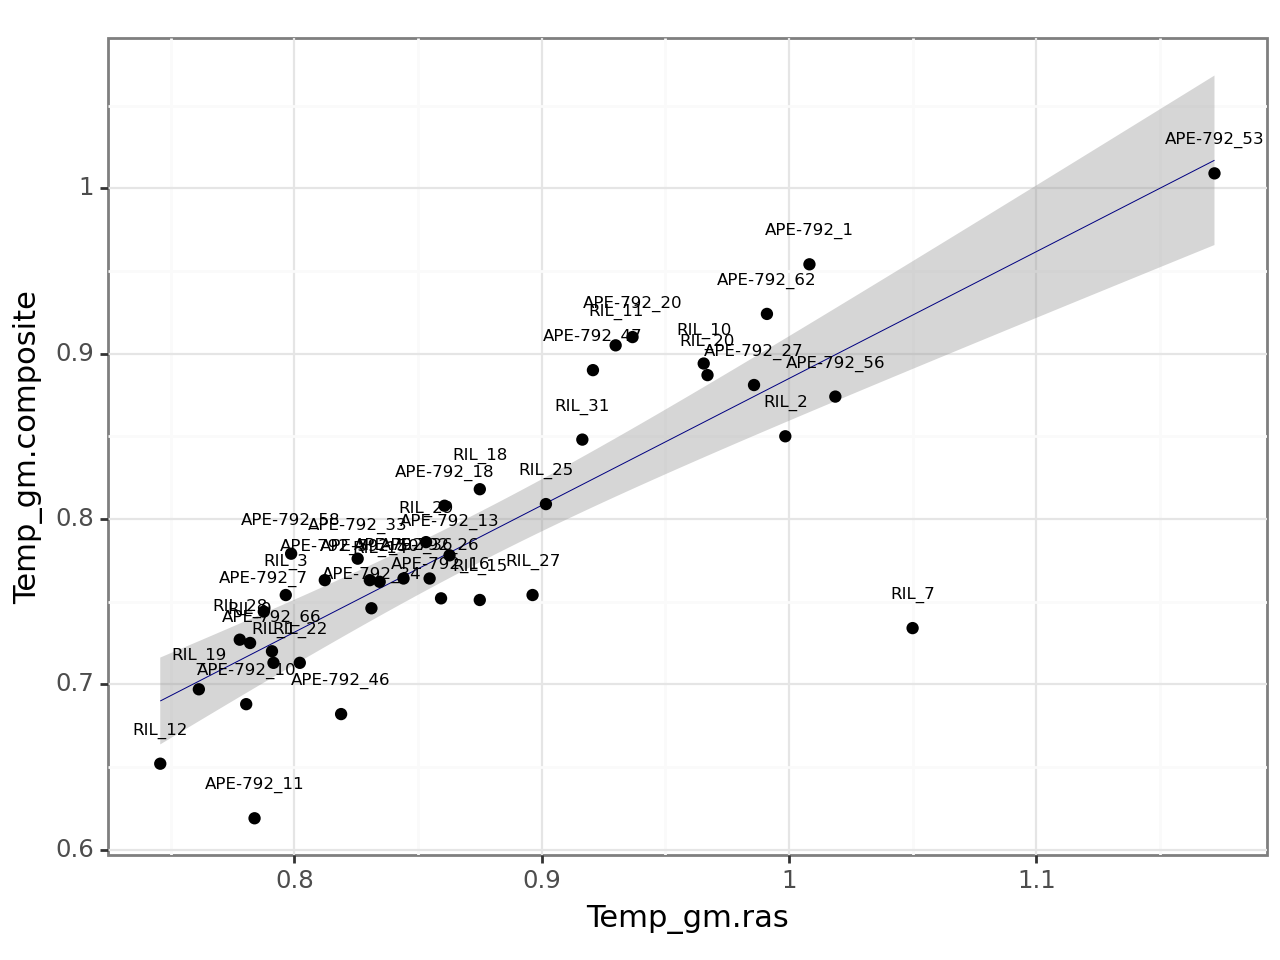


correlation for PostCing_gm is 0.8 with p-value of 0.0


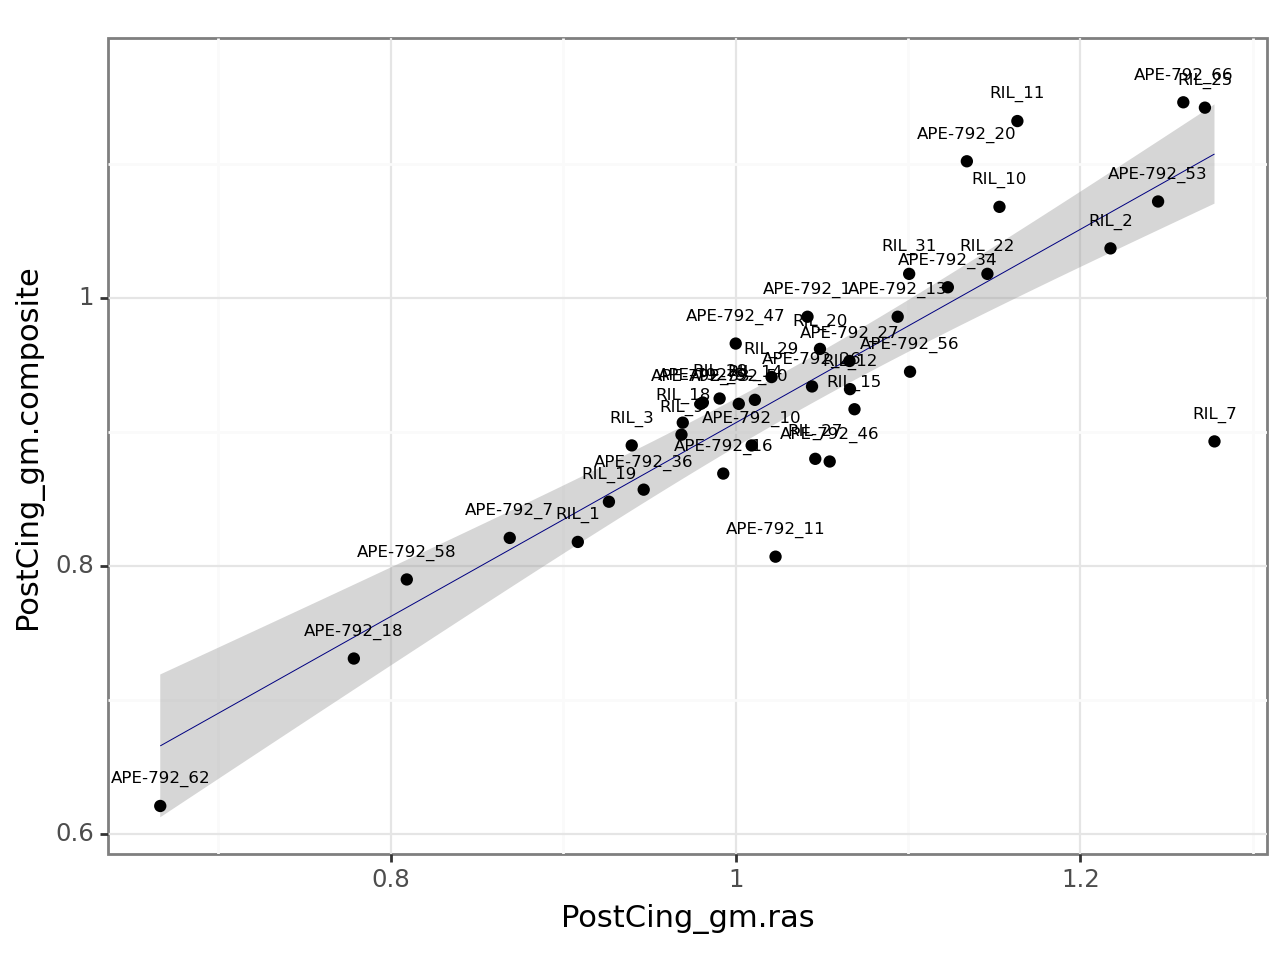

In [8]:
for var in [ele for ele in FDG_columns if (ele in ras.columns) & (ele in composite.columns)]:
    temp1 = ras.loc[ras['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = composite.loc[composite['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.ras', '.composite'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.ras'], temp_combined[var +'.composite'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.ras', y = var +'.composite', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02)
             )   

# para and pons (0.29-0.58 correlation)

correlation for MTL_gm is -0.03 with p-value of 0.7793


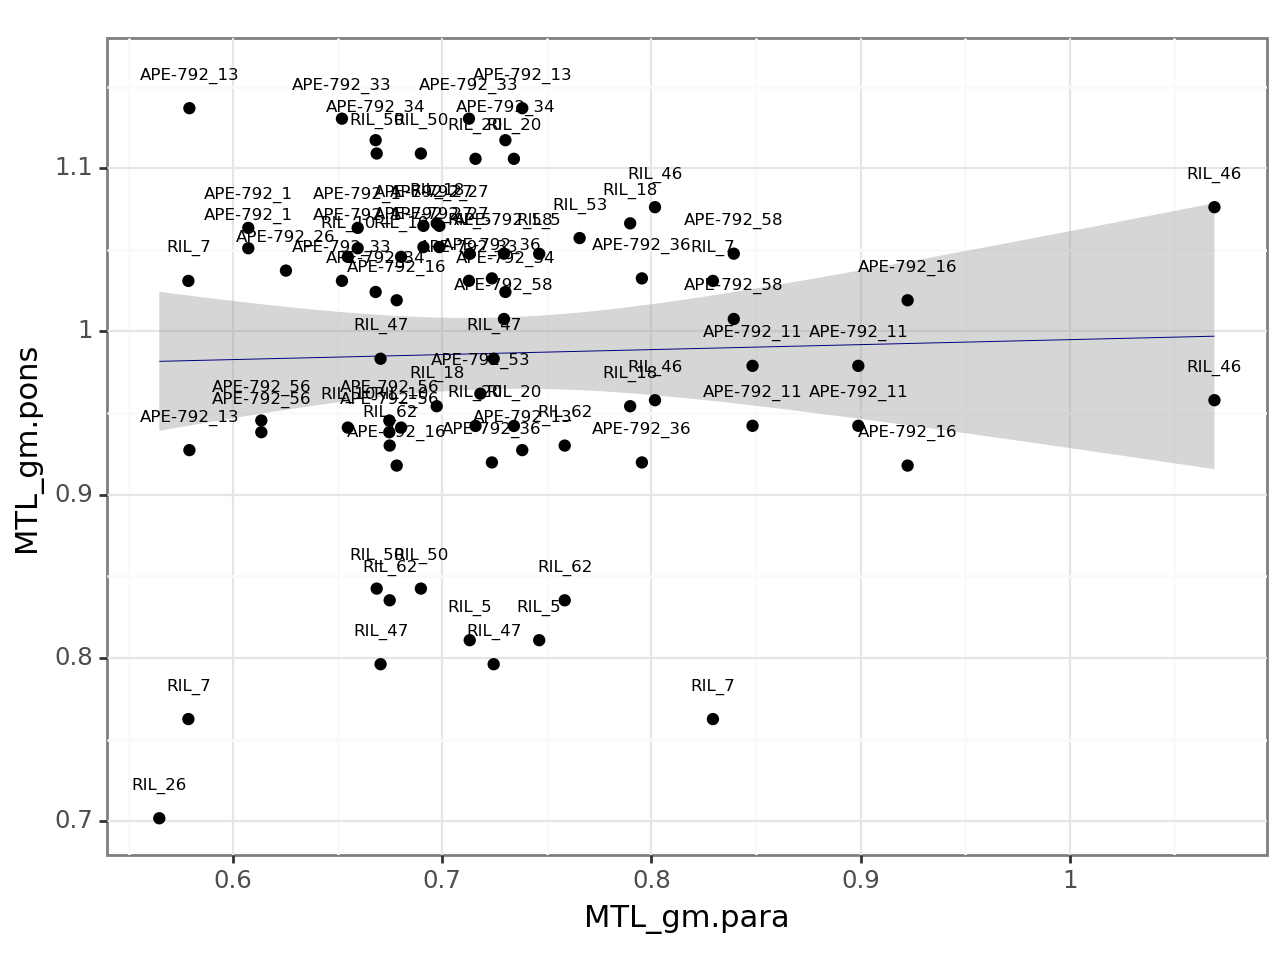


correlation for AC_gm is 0.15 with p-value of 0.1833


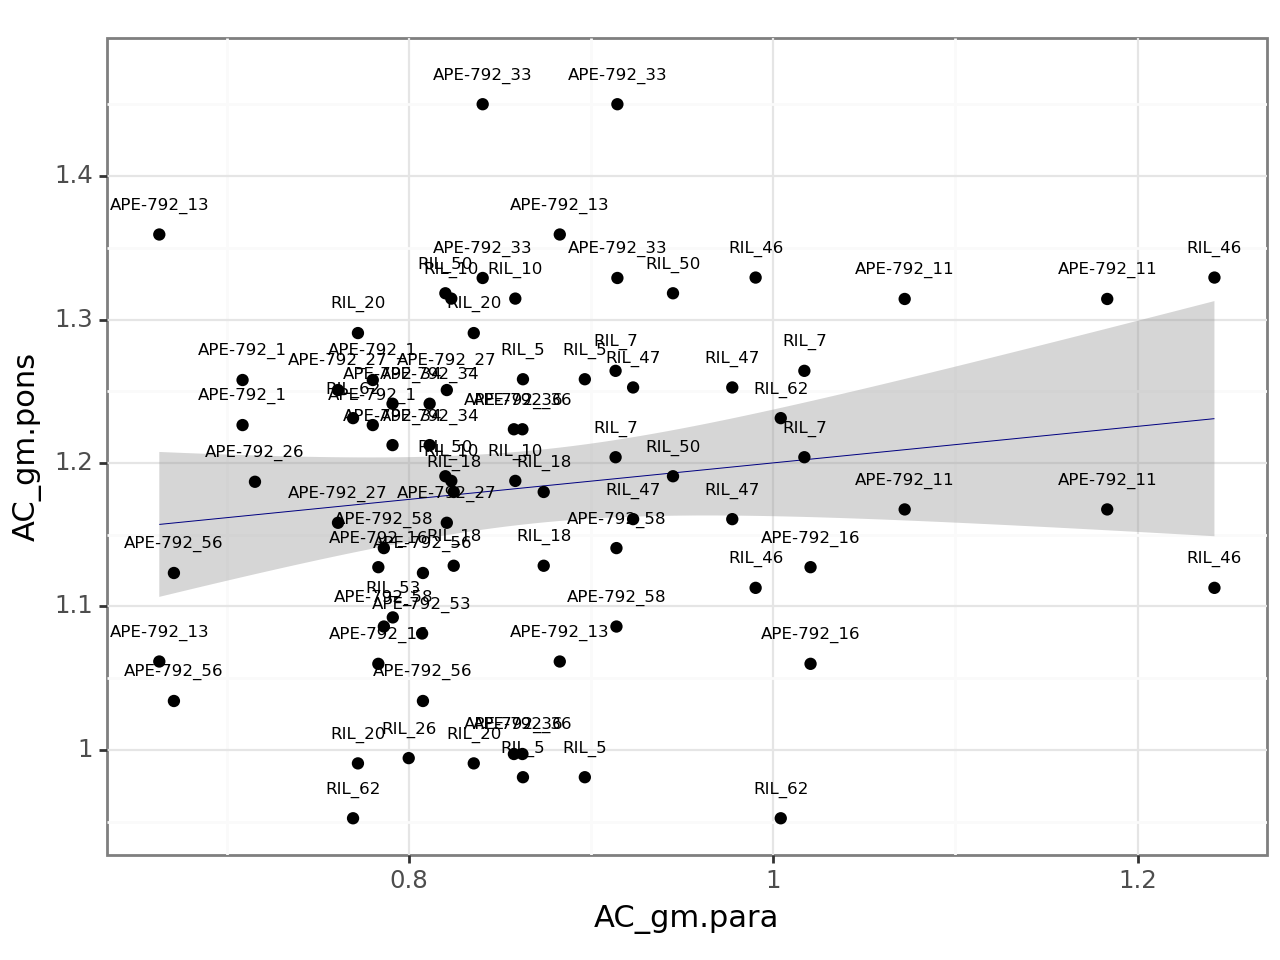


correlation for Precun_gm is 0.15 with p-value of 0.1833


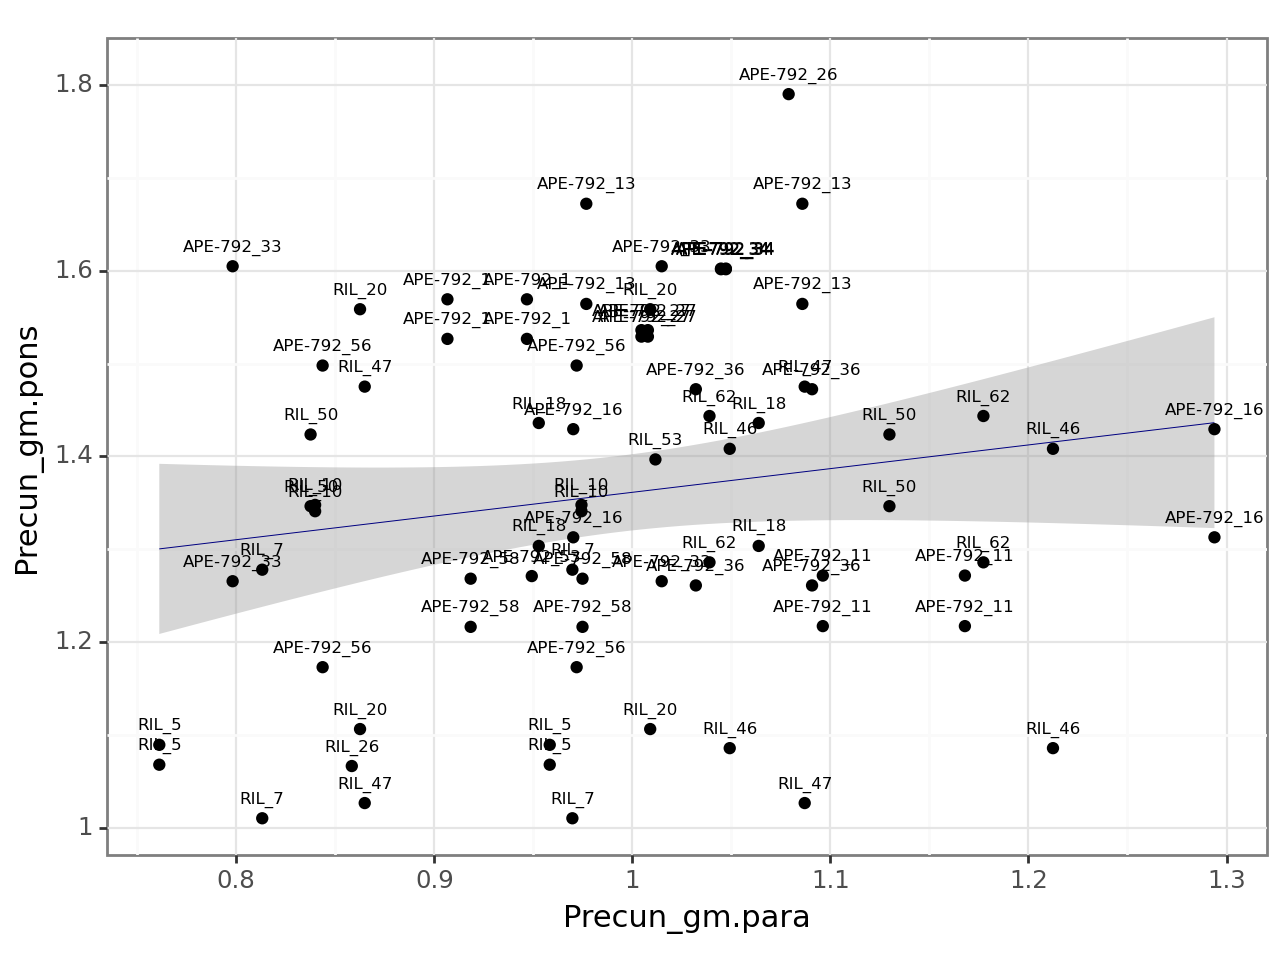


correlation for Par_gm is 0.21 with p-value of 0.0591


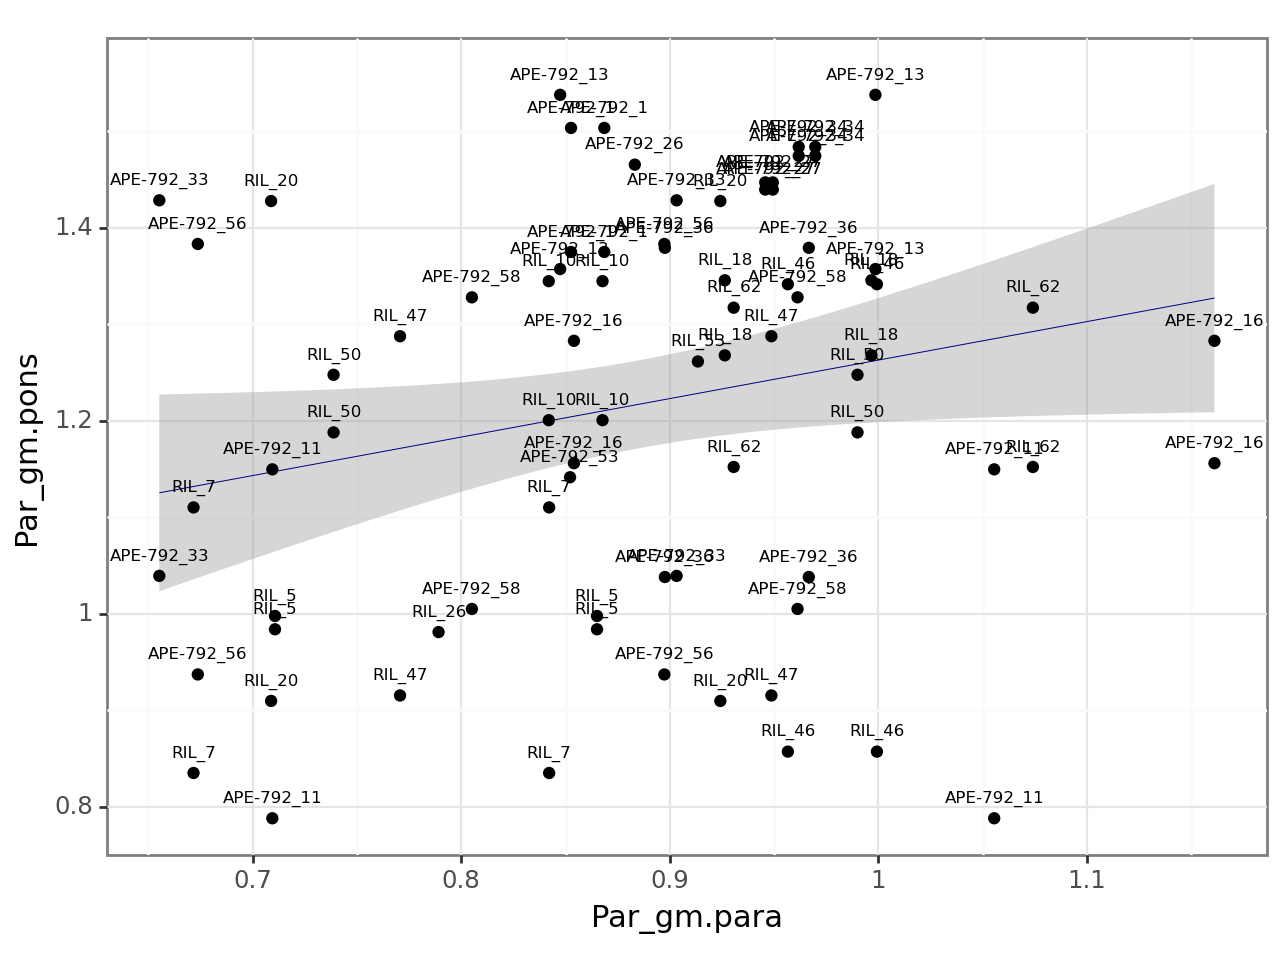


correlation for Temp_gm is 0.04 with p-value of 0.7403


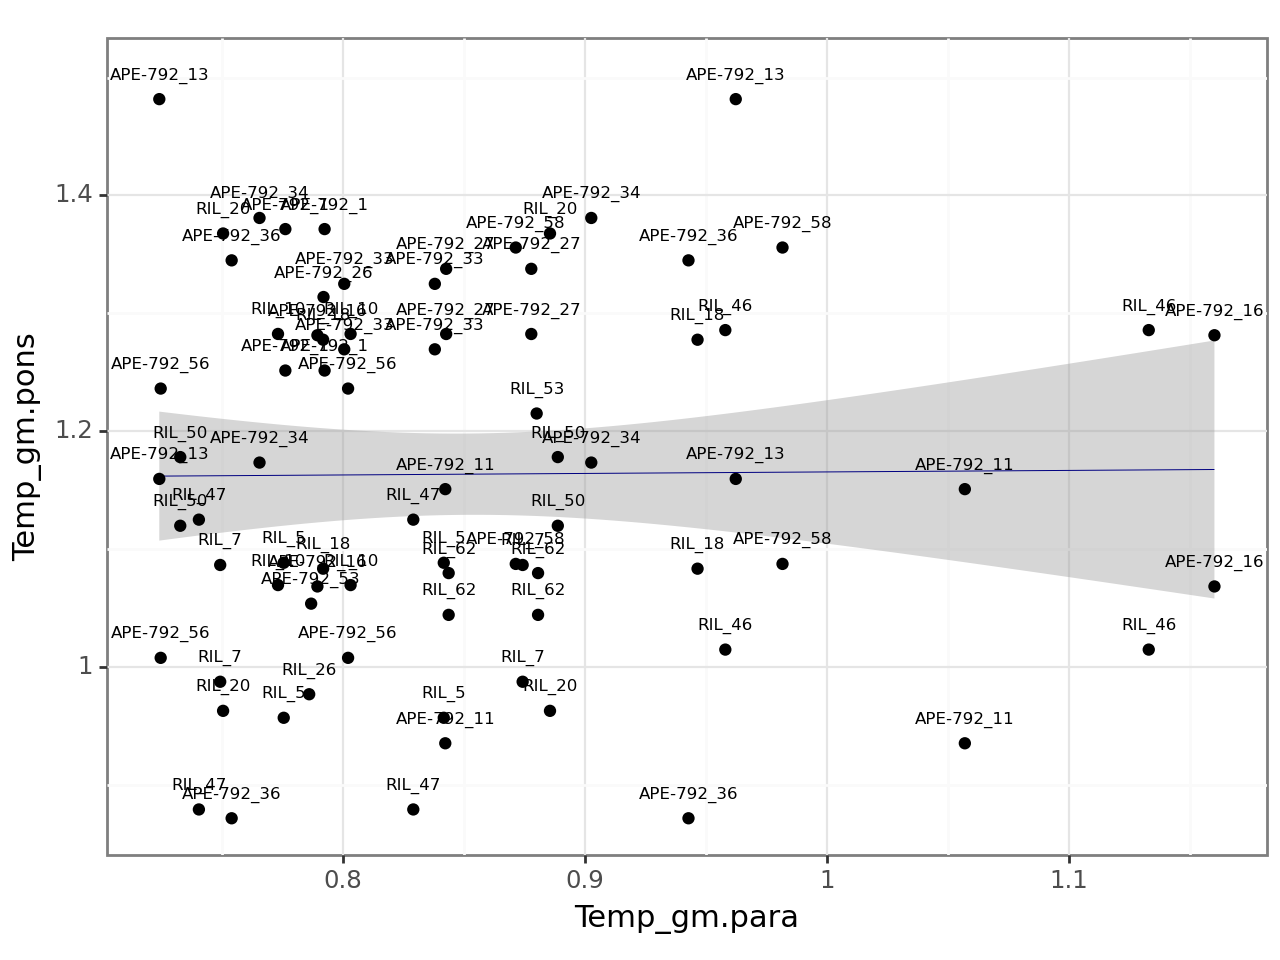


correlation for PostCing_gm is 0.2 with p-value of 0.0809


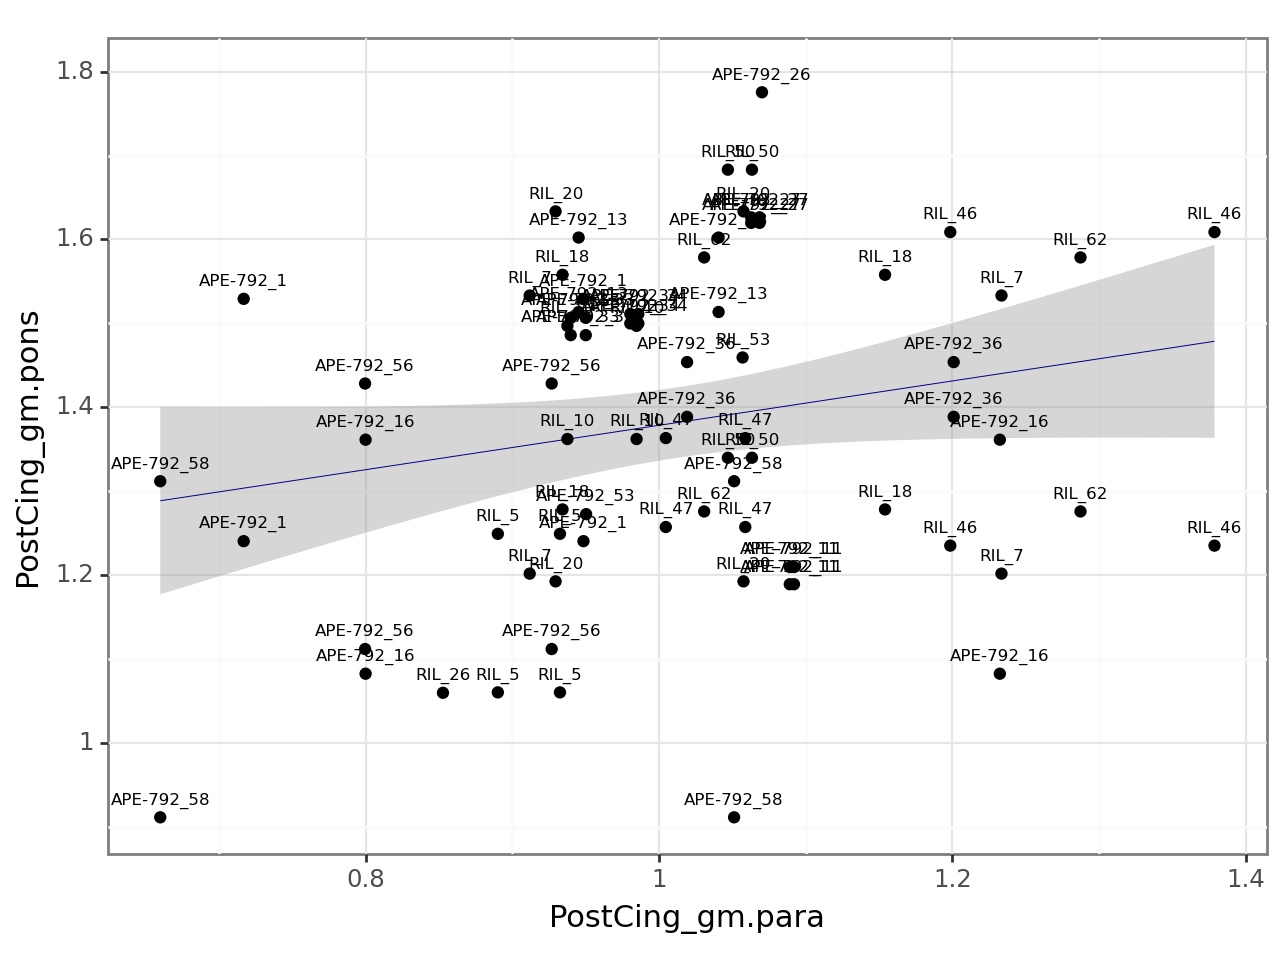

In [9]:
for var in [ele for ele in FDG_columns if (ele in para.columns) & (ele in pons.columns)]:
    temp1 = para.loc[para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = pons.loc[pons['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.para', '.pons'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.para'], temp_combined[var +'.pons'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.para', y = var +'.pons', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# para and new_para: similar (0.67-0.85 correlation)

correlation for MTL_gm is -0.45 with p-value of 0.0127


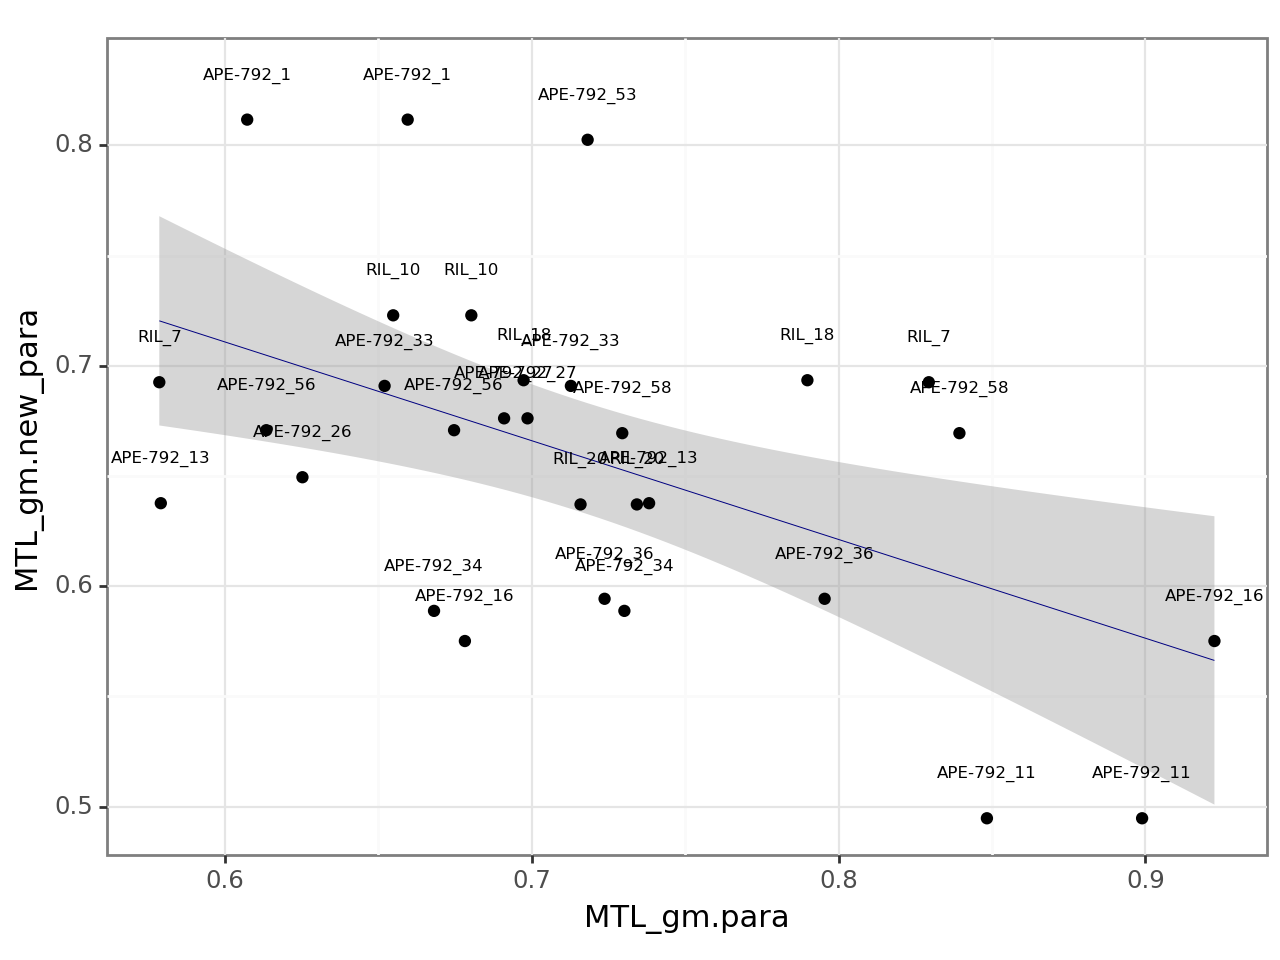


correlation for AC_gm is -0.26 with p-value of 0.1652


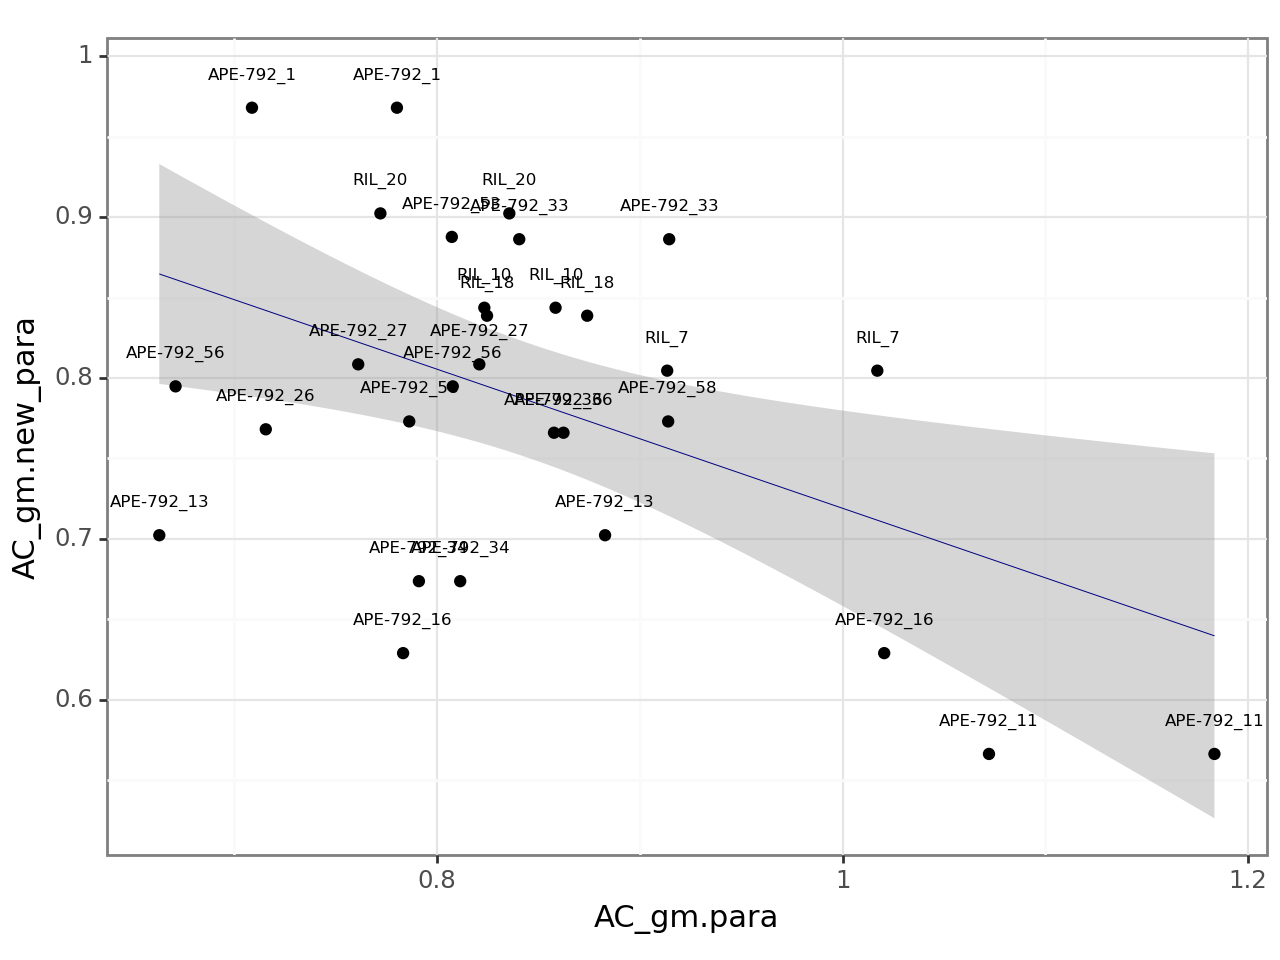


correlation for Precun_gm is -0.24 with p-value of 0.2002


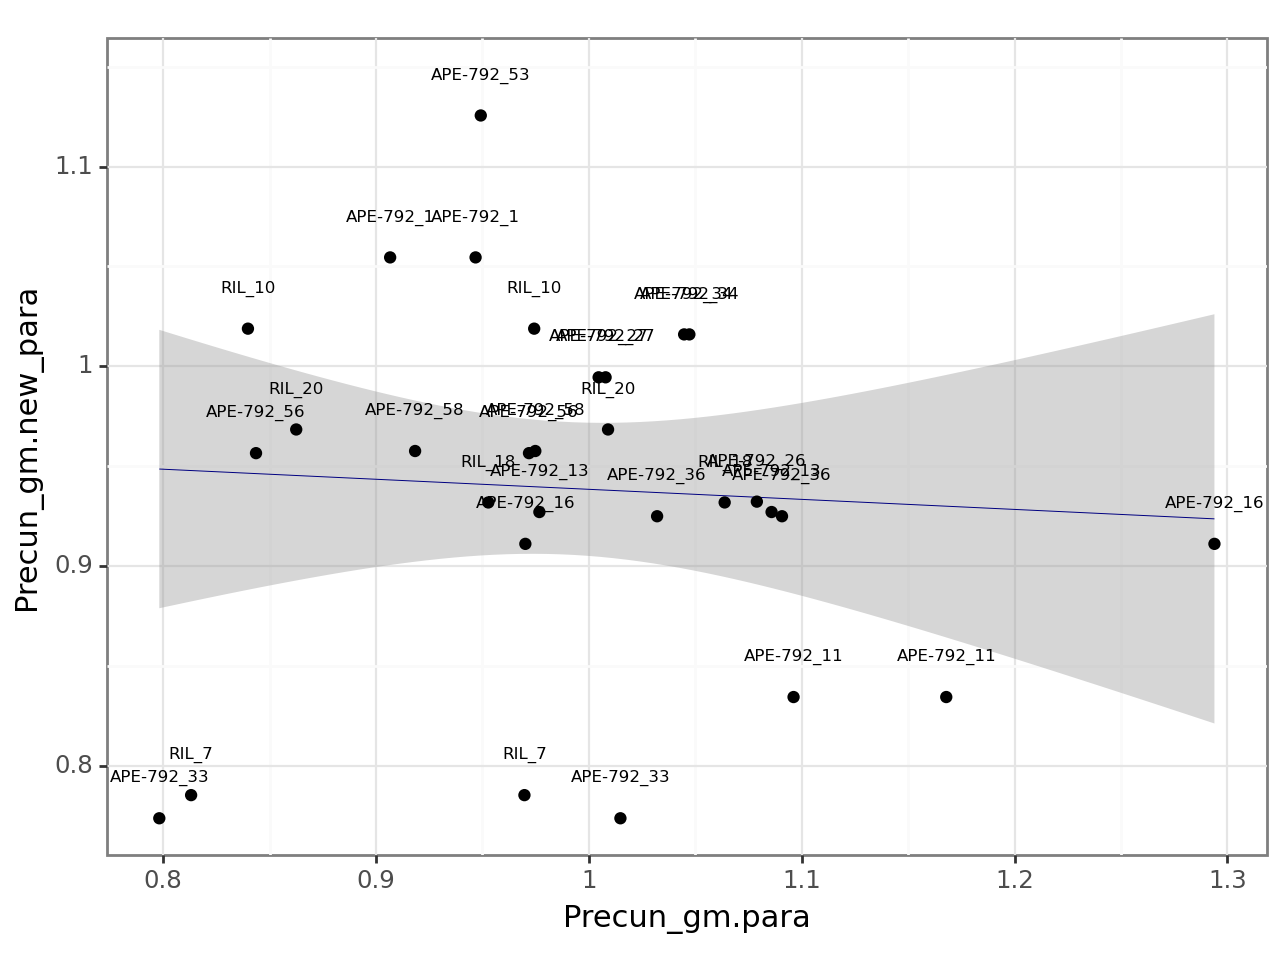


correlation for Par_gm is -0.06 with p-value of 0.762


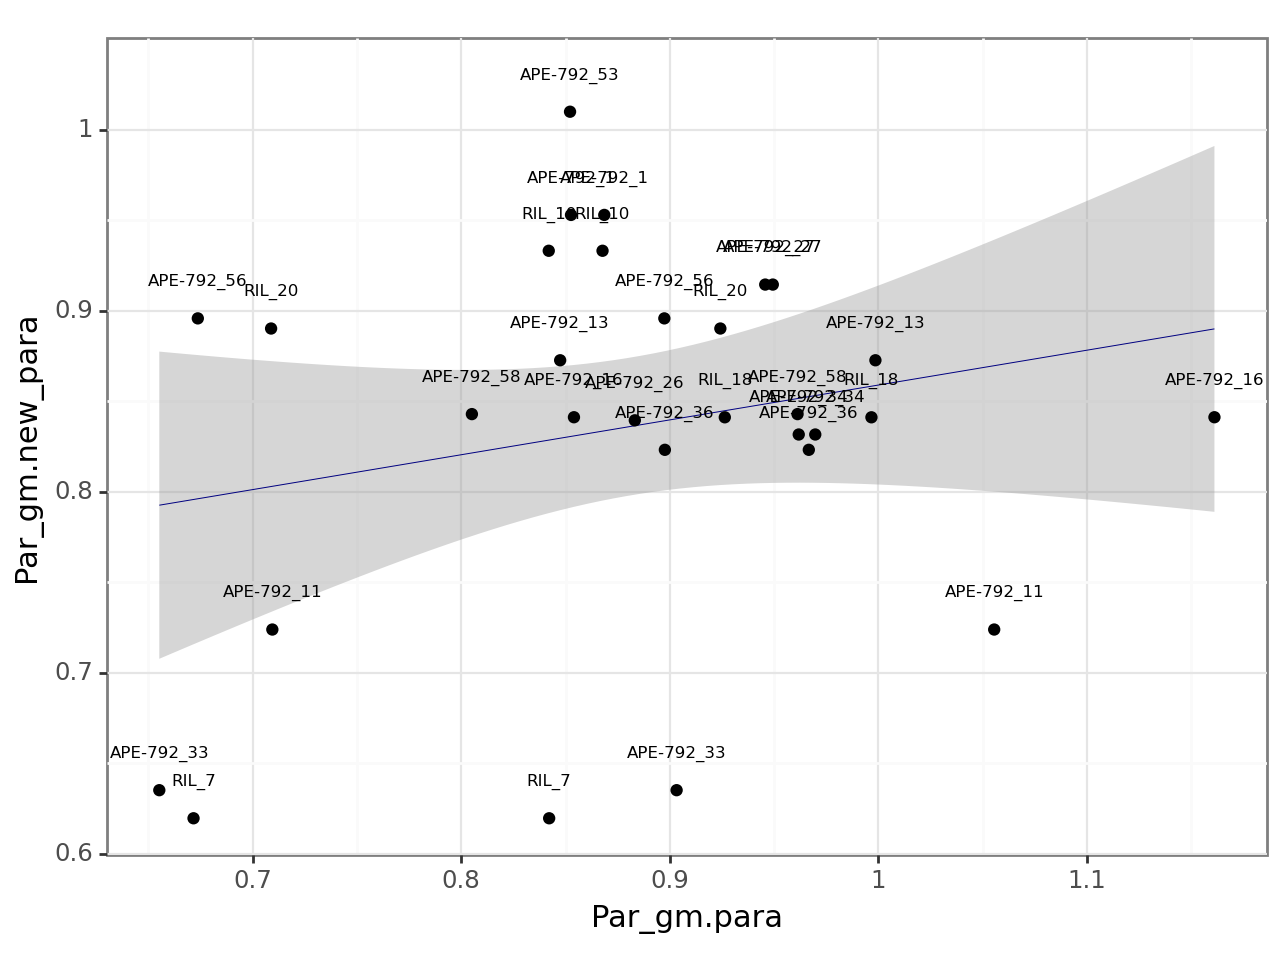


correlation for Temp_gm is -0.22 with p-value of 0.2459


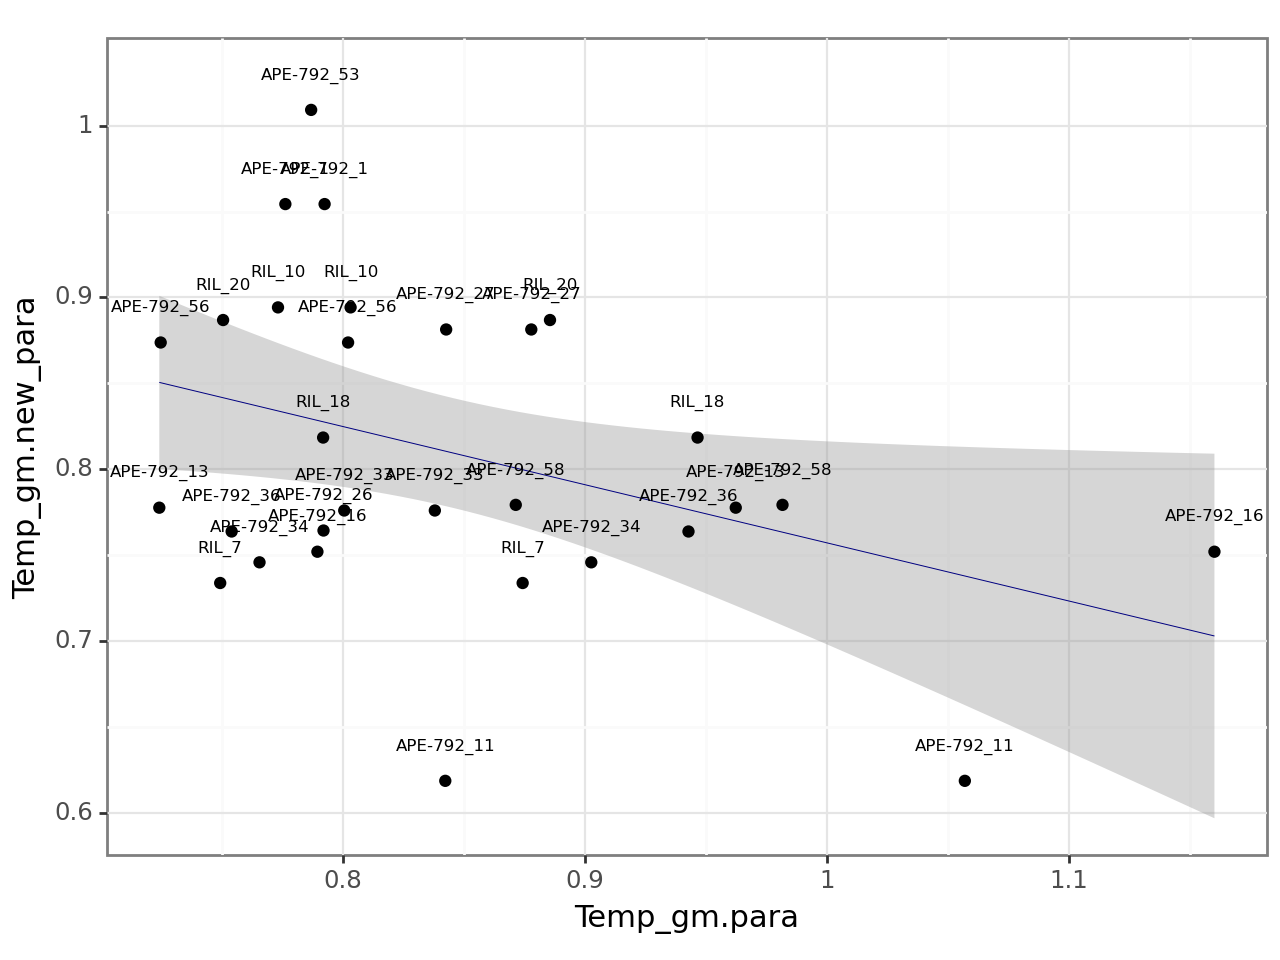


correlation for PostCing_gm is -0.23 with p-value of 0.2309


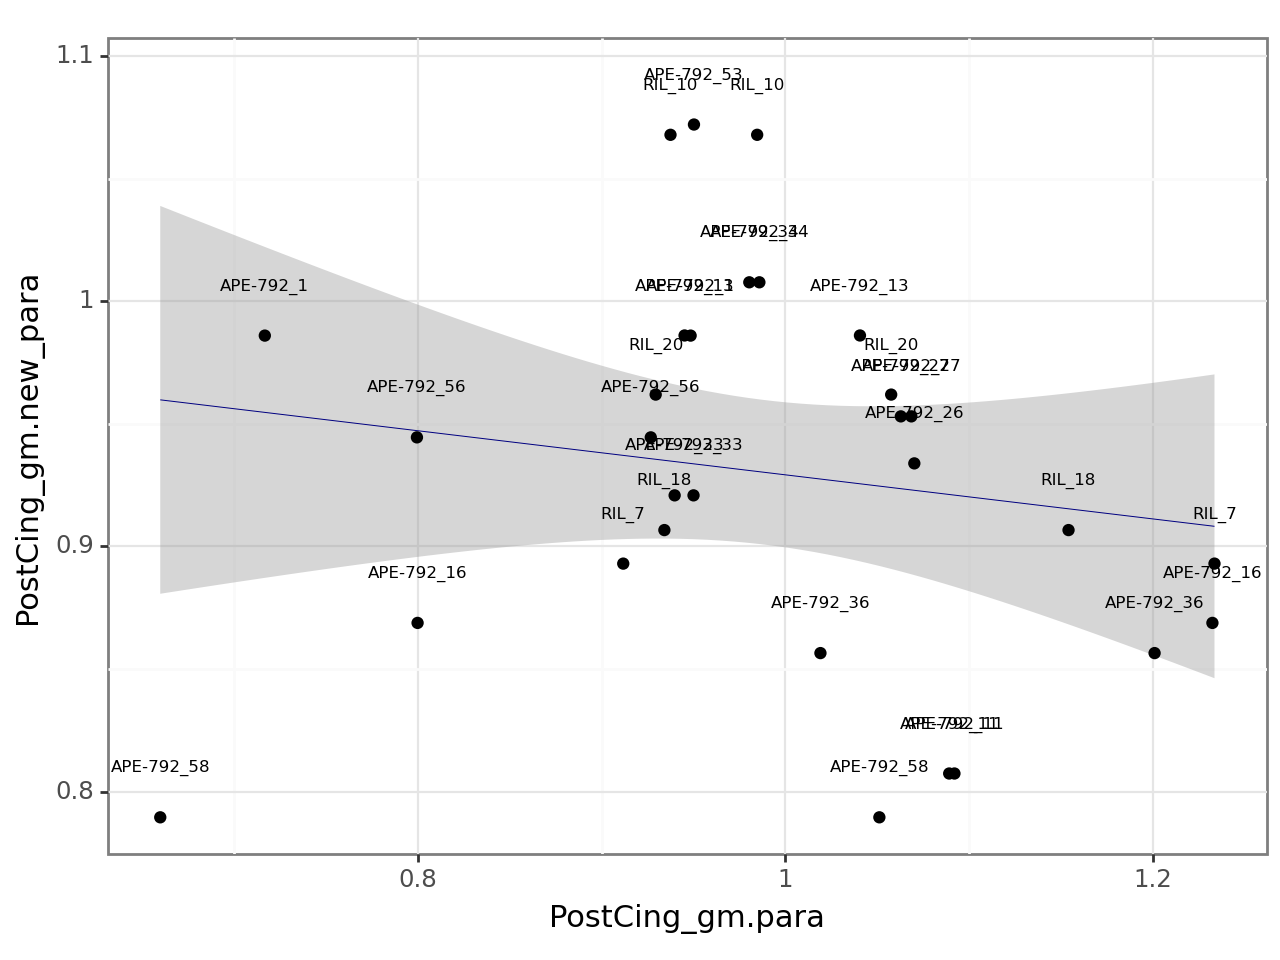

In [10]:
for var in [ele for ele in FDG_columns if (ele in para.columns) & (ele in new_para.columns)]:
    temp1 = para.loc[para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = new_para.loc[new_para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.para', '.new_para'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.para'], temp_combined[var +'.new_para'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.para', y = var +'.new_para', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02)
             )    

# para and ras (0.84-0.91 correlation)

correlation for Avg_PCC is -0.1 with p-value of 0.6153


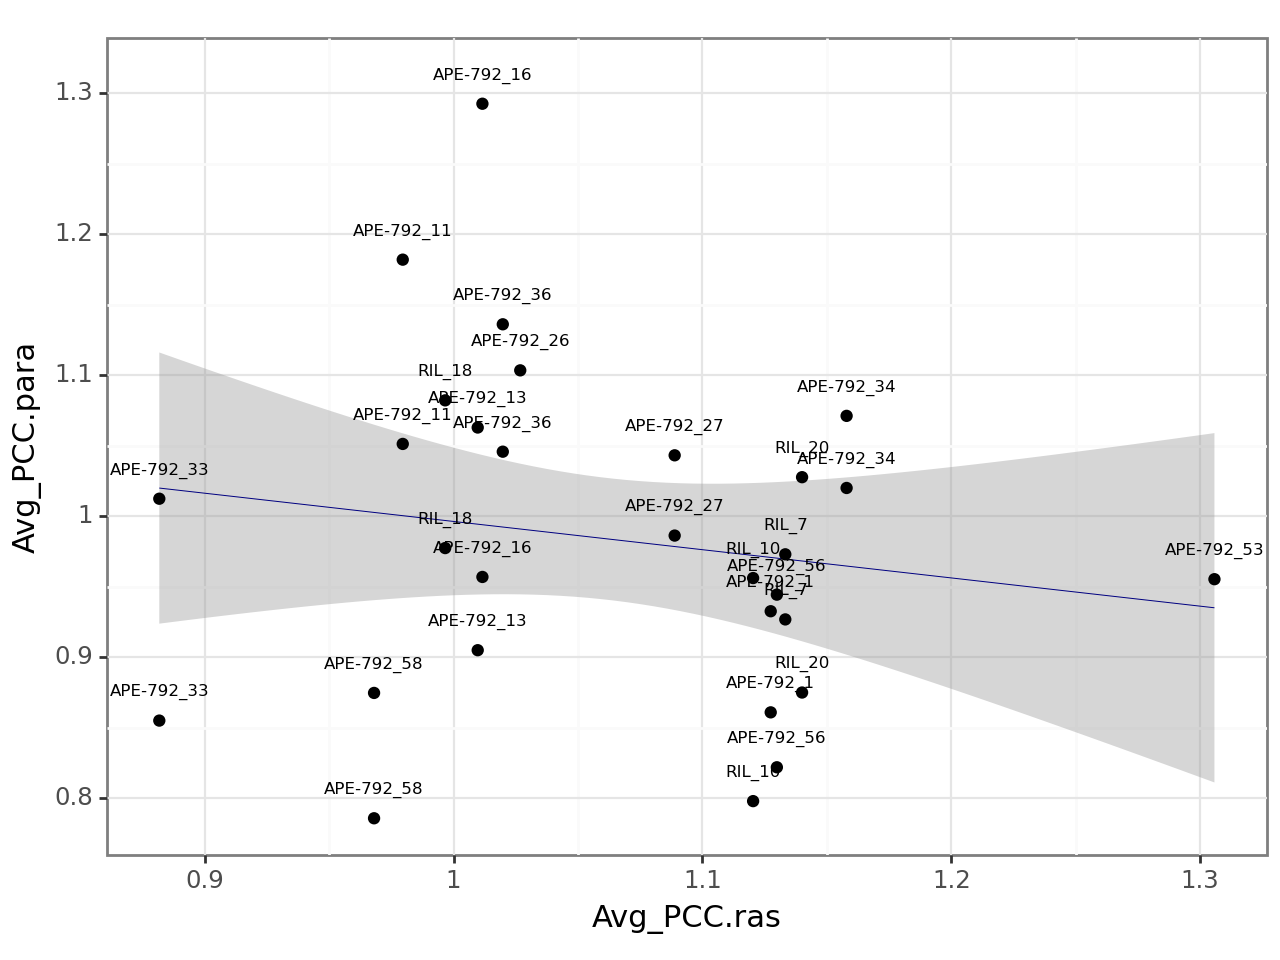


correlation for MTL_gm is -0.52 with p-value of 0.0035


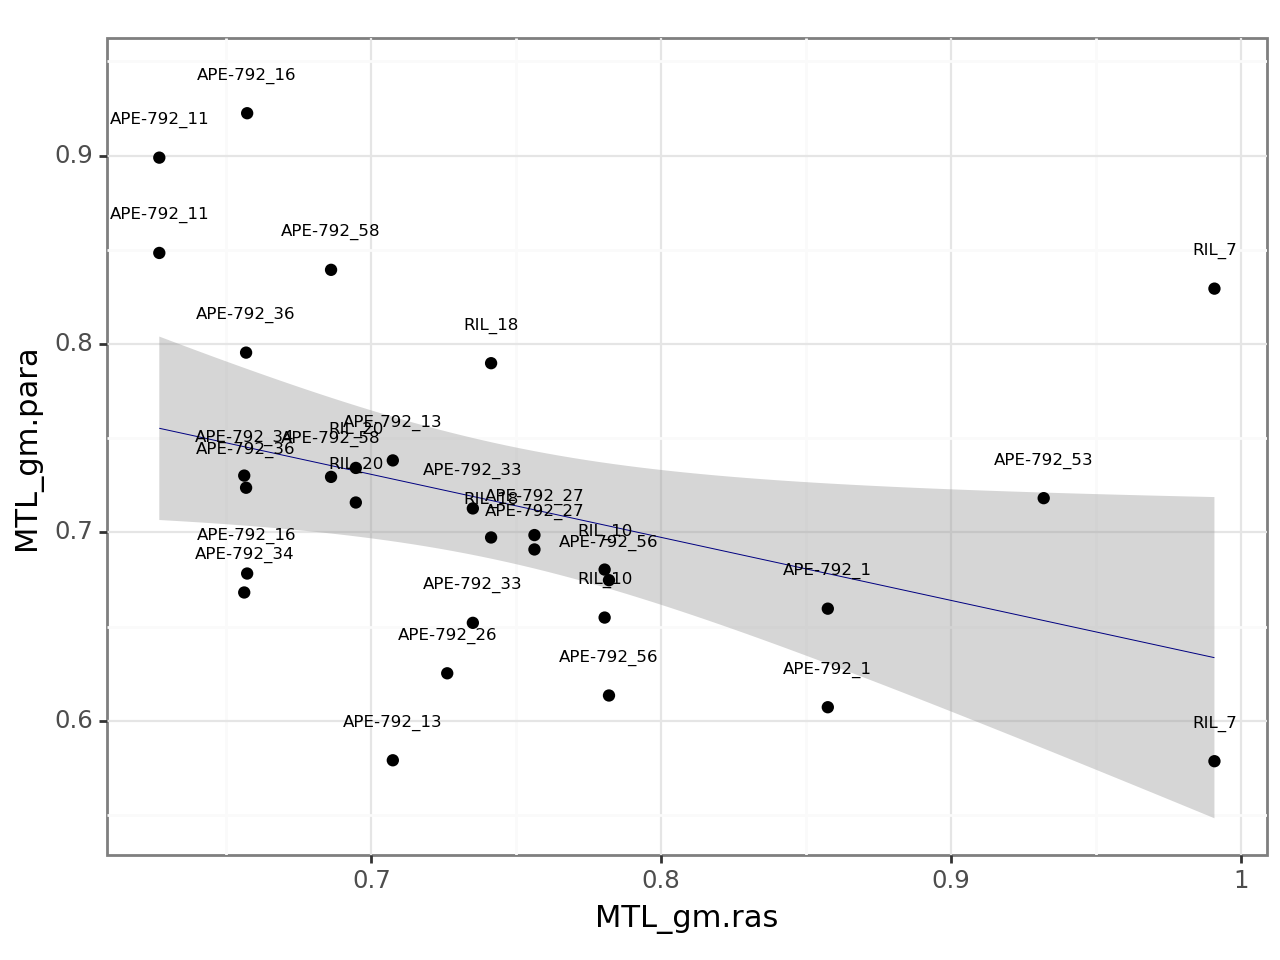


correlation for AC_gm is -0.19 with p-value of 0.3202


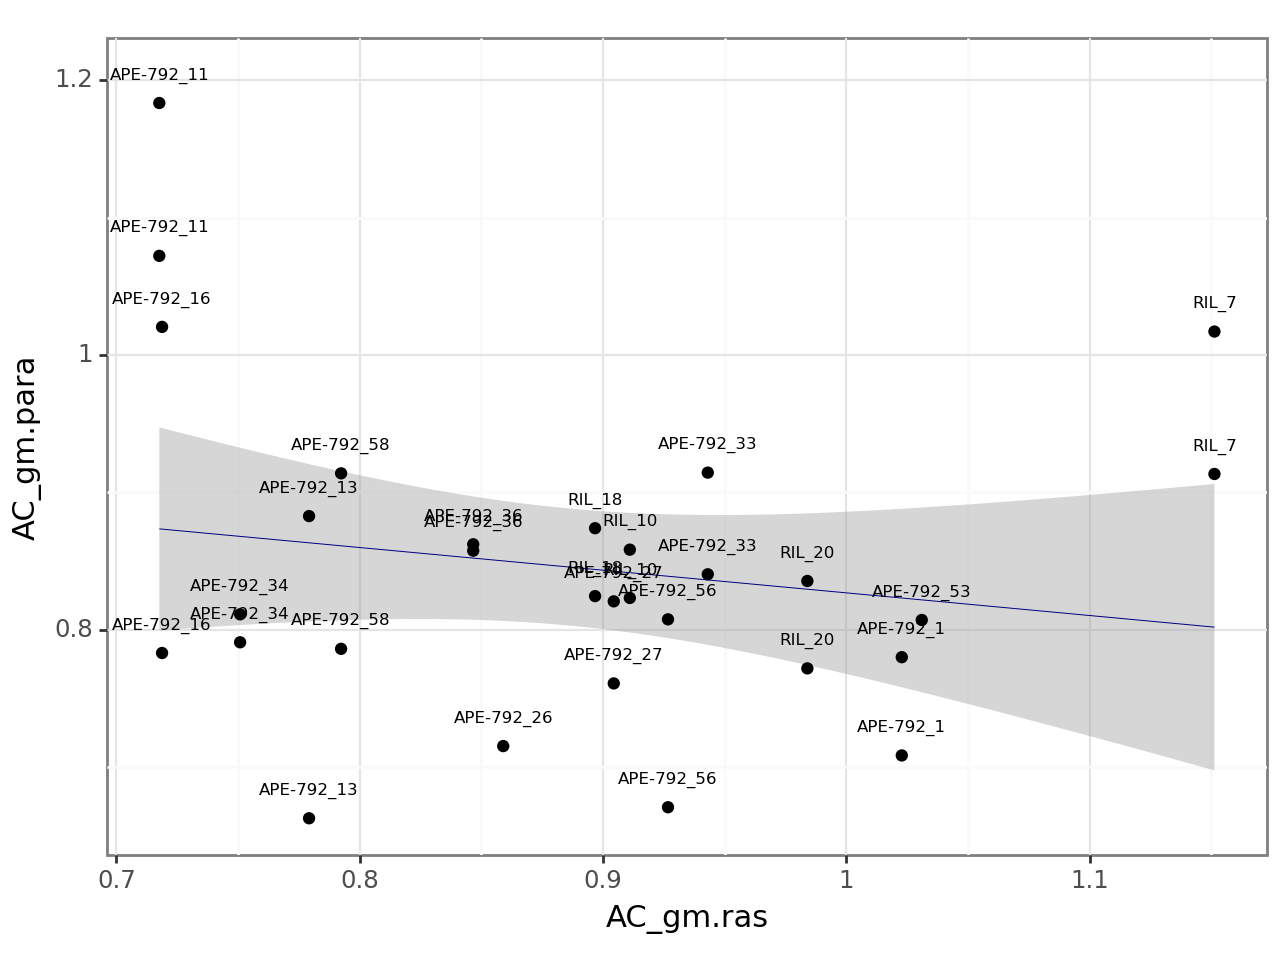


correlation for Precun_gm is -0.18 with p-value of 0.3509


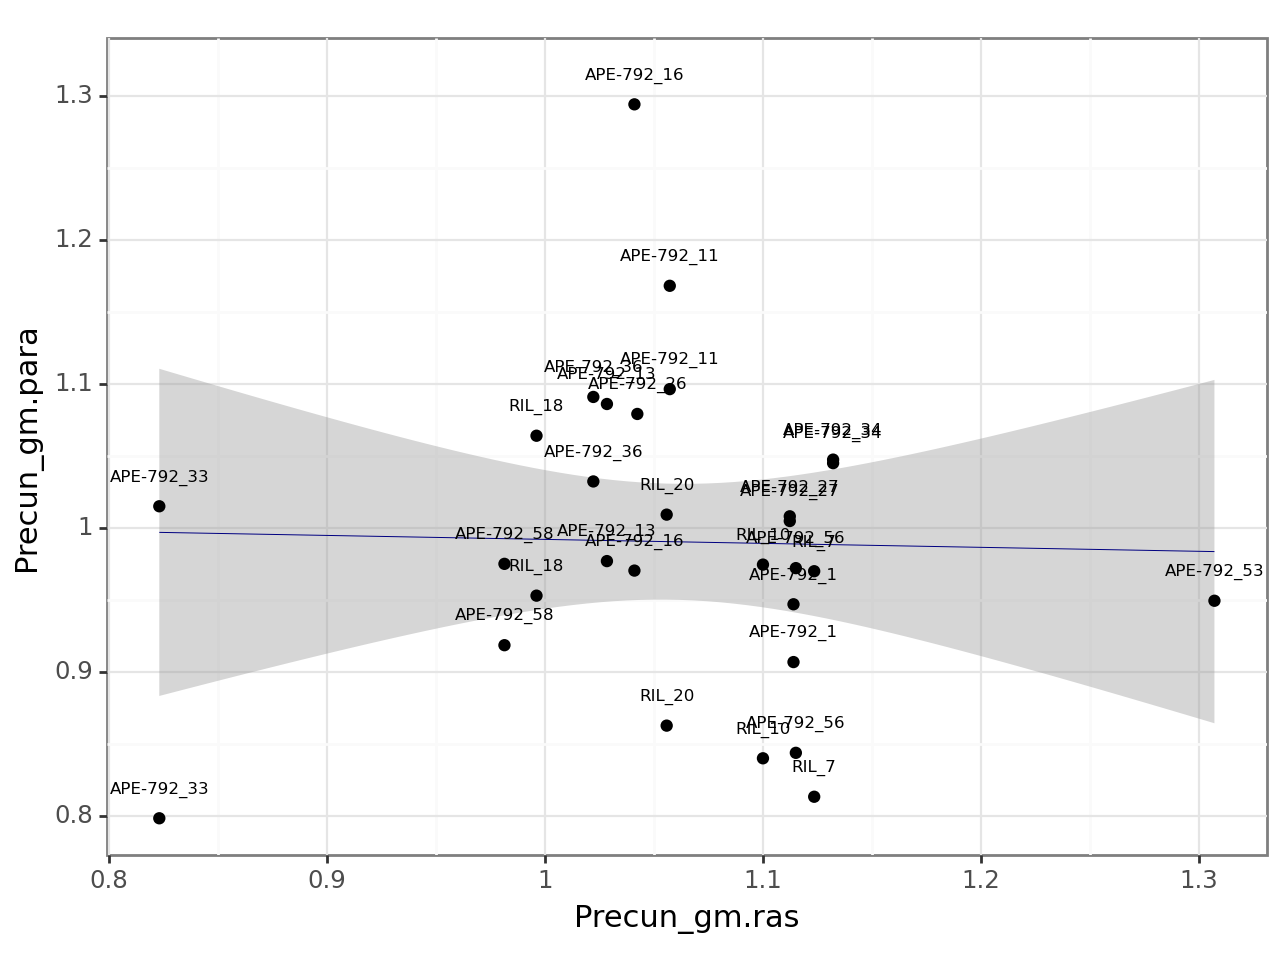


correlation for Par_gm is -0.04 with p-value of 0.8197


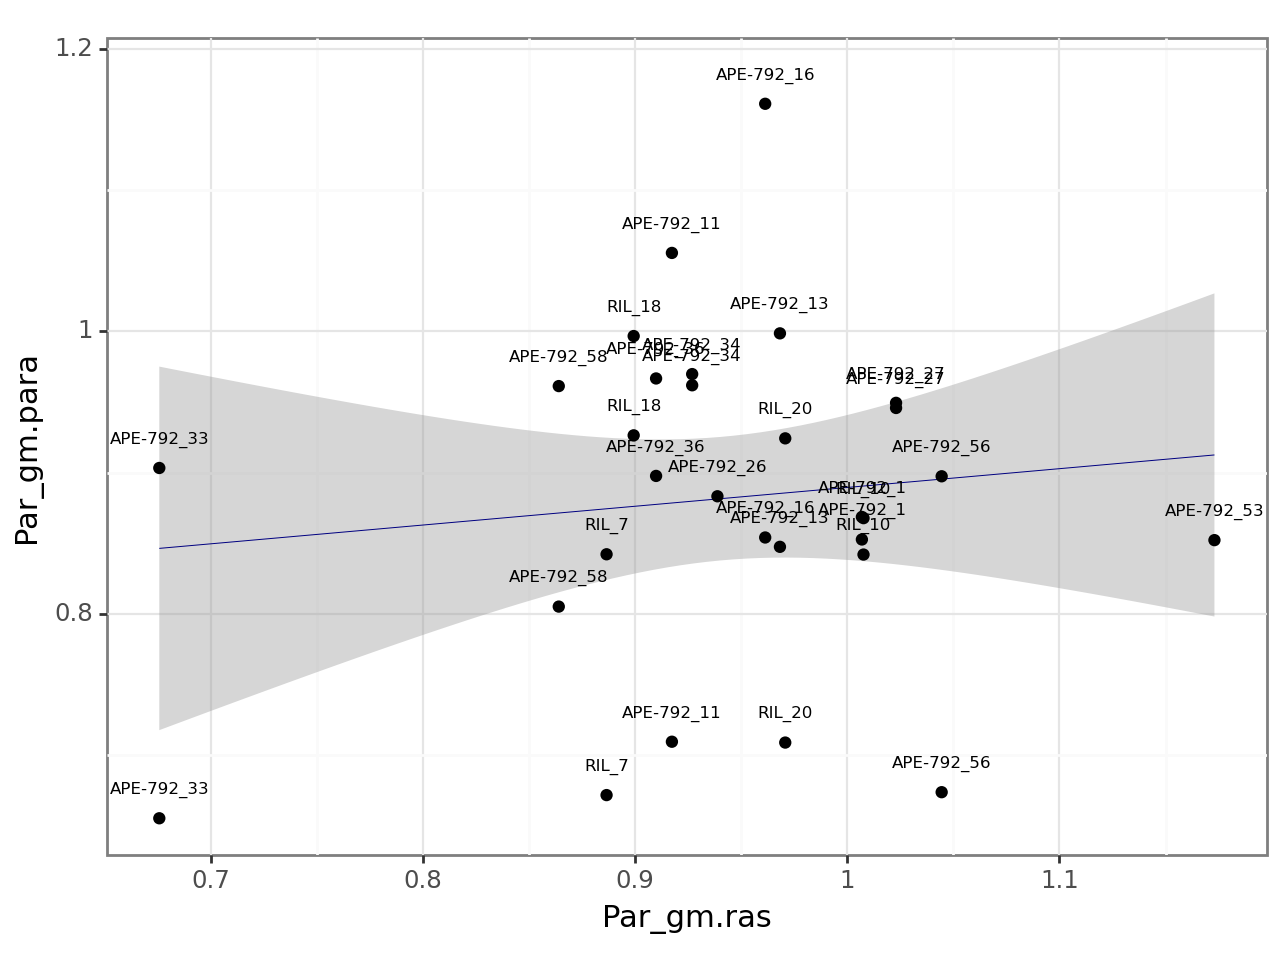


correlation for Temp_gm is -0.37 with p-value of 0.0472


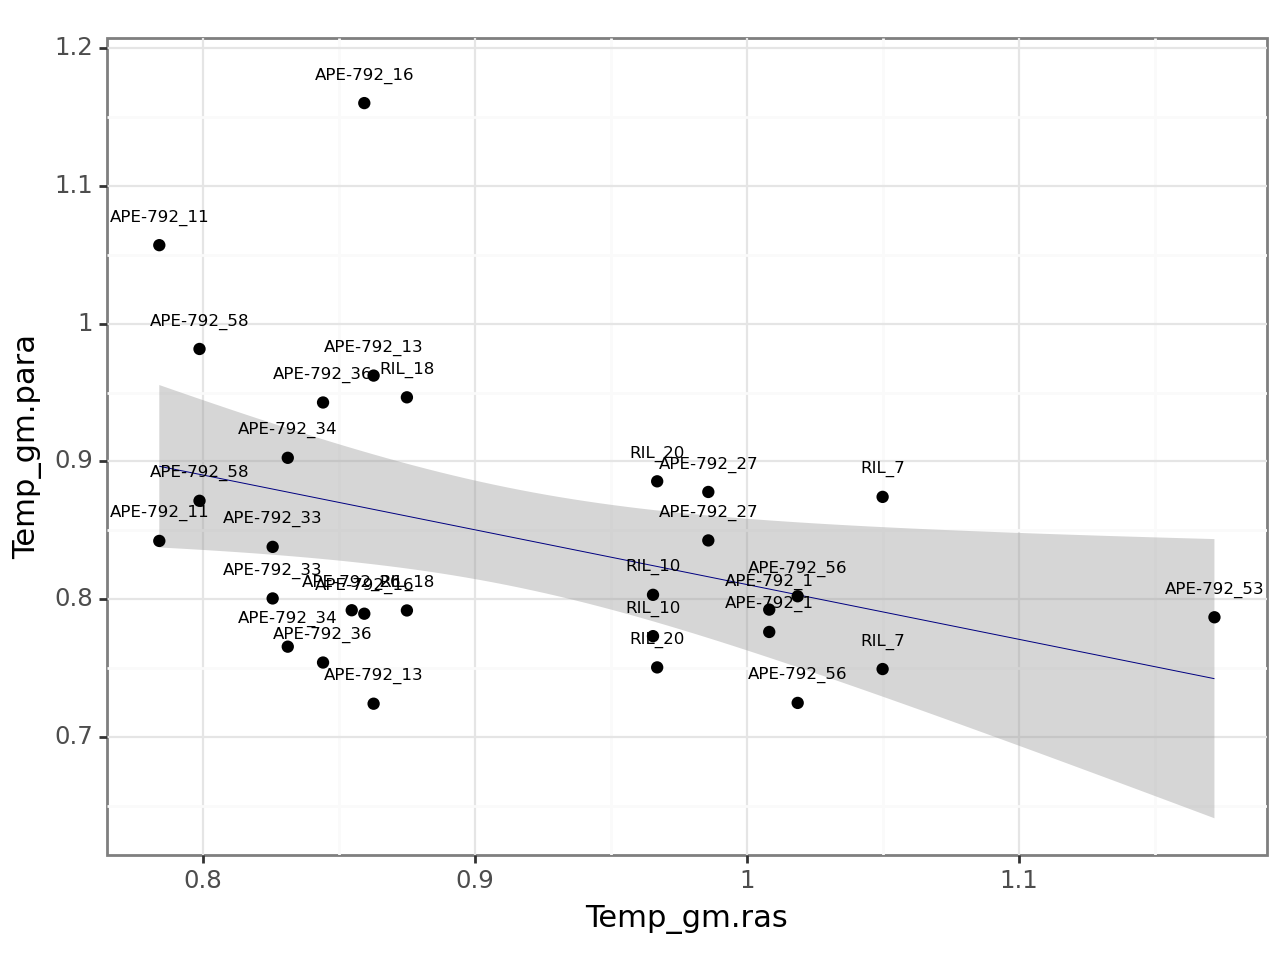


correlation for PostCing_gm is -0.1 with p-value of 0.6096


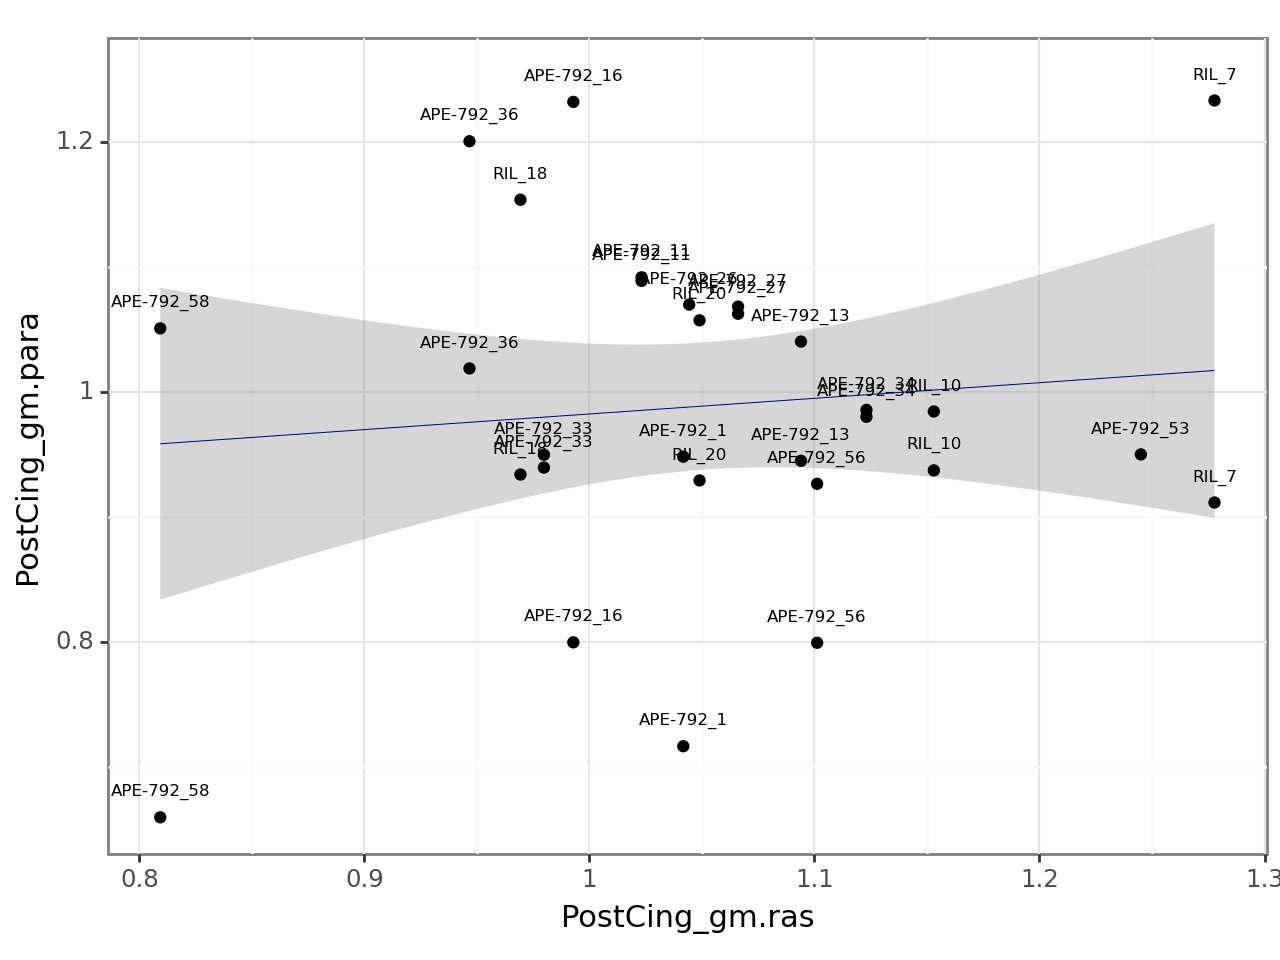

In [11]:
for var in [ele for ele in FDG_columns if (ele in ras.columns) & (ele in para.columns)]:
    temp1 = ras.loc[ras['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = para.loc[para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.ras', '.para'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.ras'], temp_combined[var +'.para'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.ras', y = var +'.para', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02)
             )   

# pons and new_para (0.33-0.63 correlation)

correlation for MTL_gm is 0.18 with p-value of 0.3375


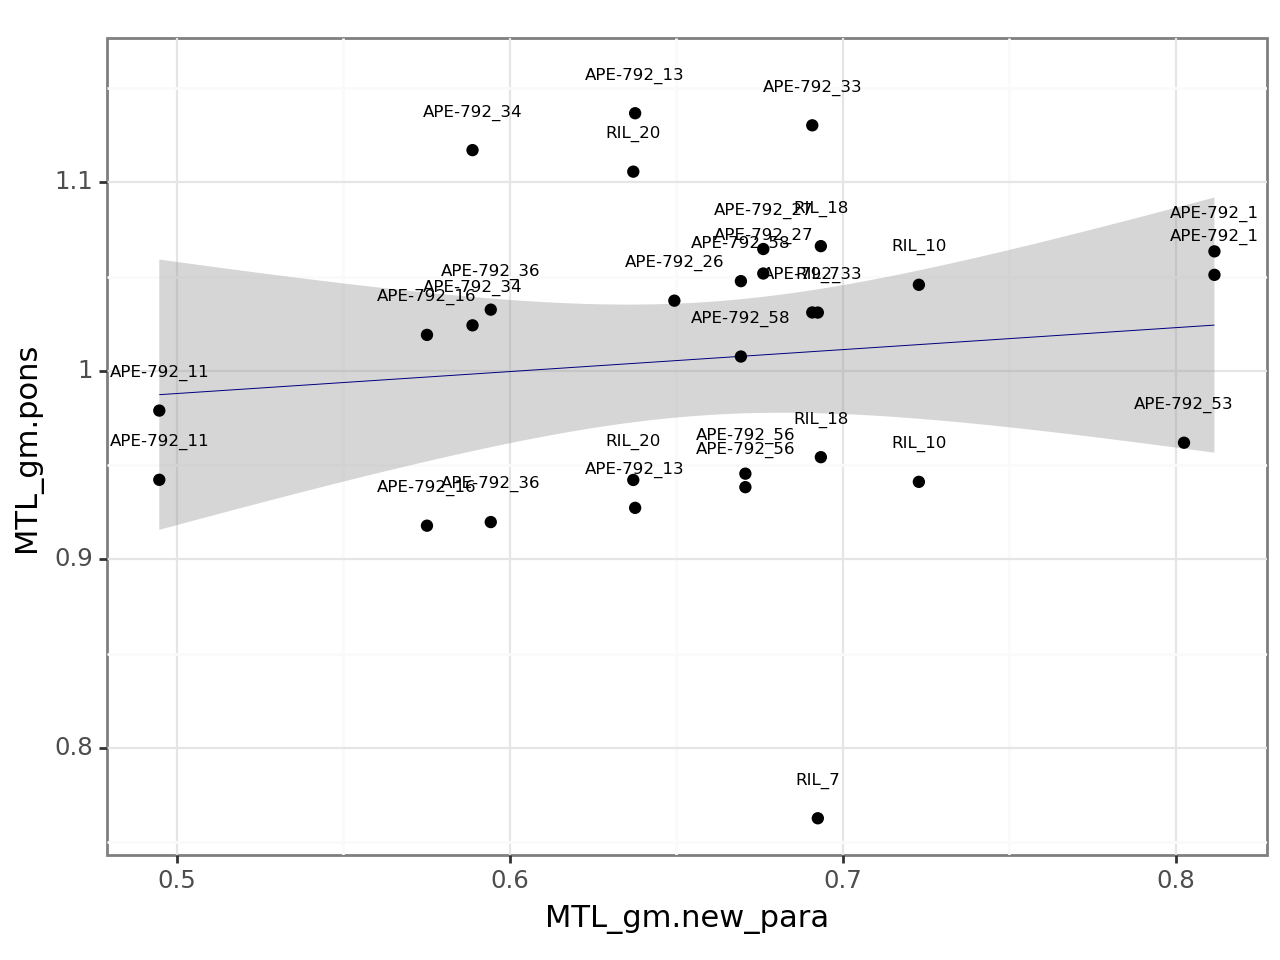


correlation for AC_gm is 0.2 with p-value of 0.2985


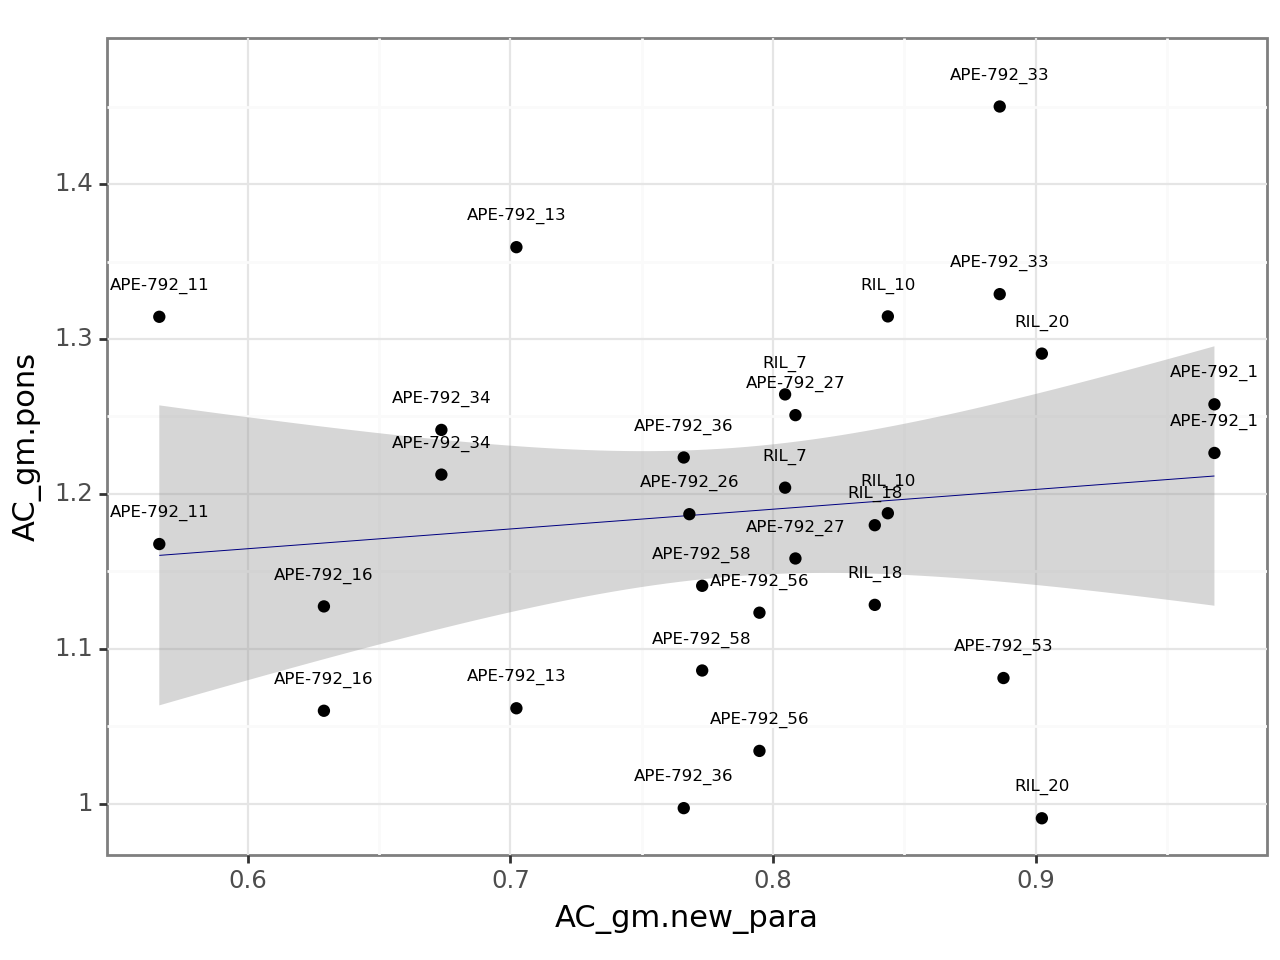


correlation for Precun_gm is 0.25 with p-value of 0.1913


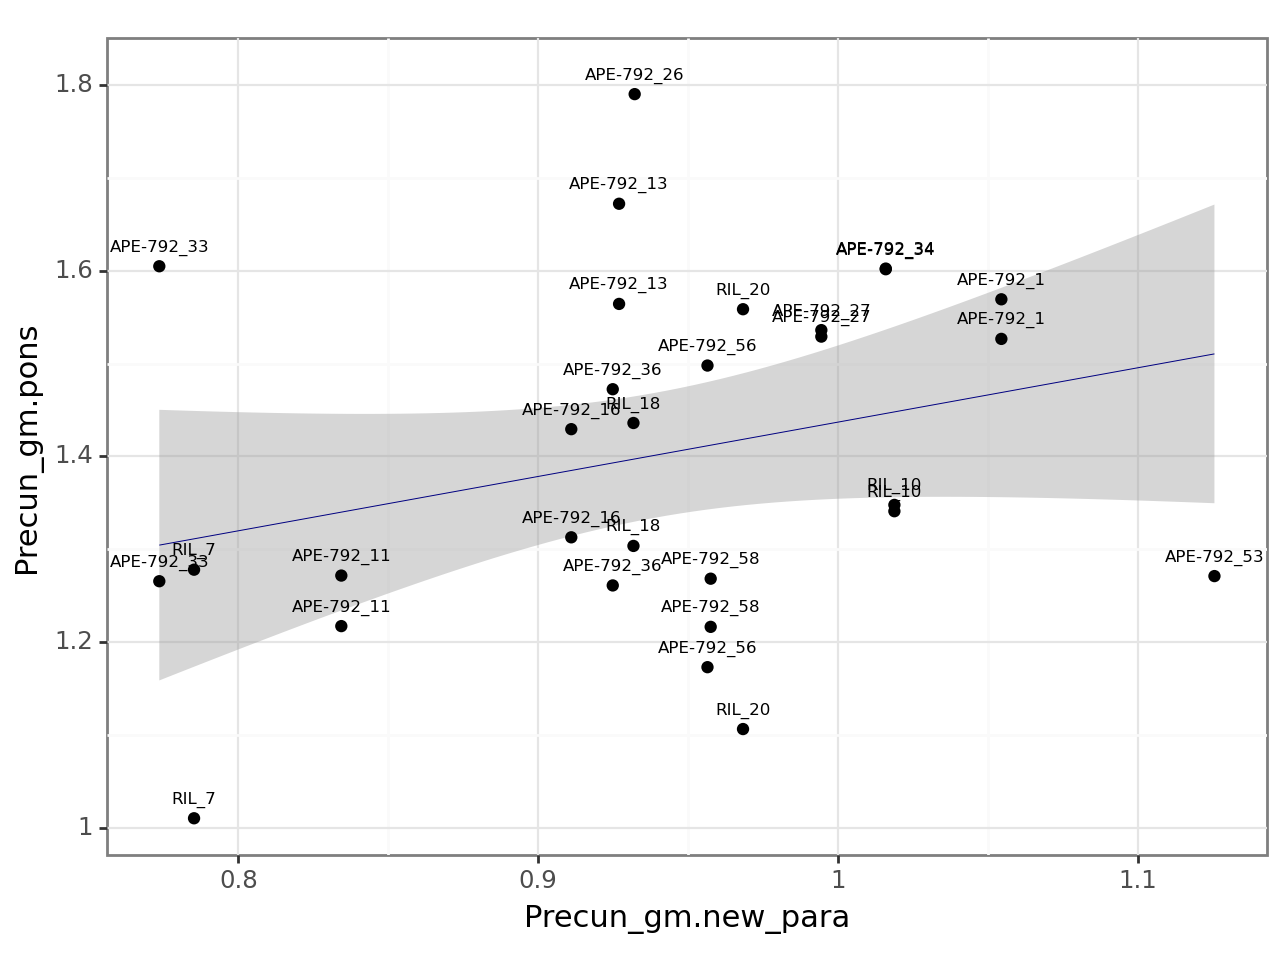


correlation for Par_gm is 0.26 with p-value of 0.1622


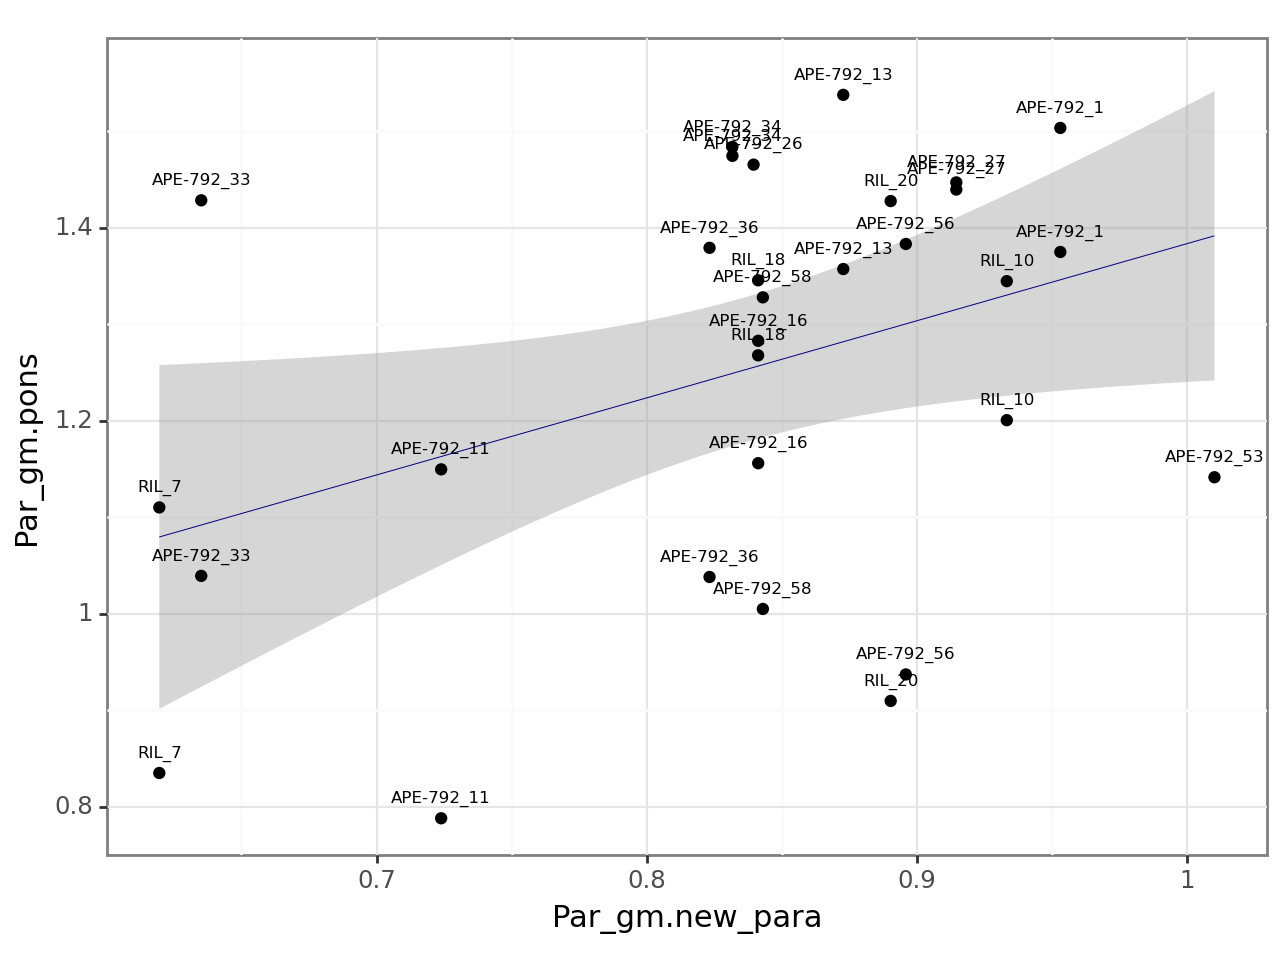


correlation for Temp_gm is 0.16 with p-value of 0.4051


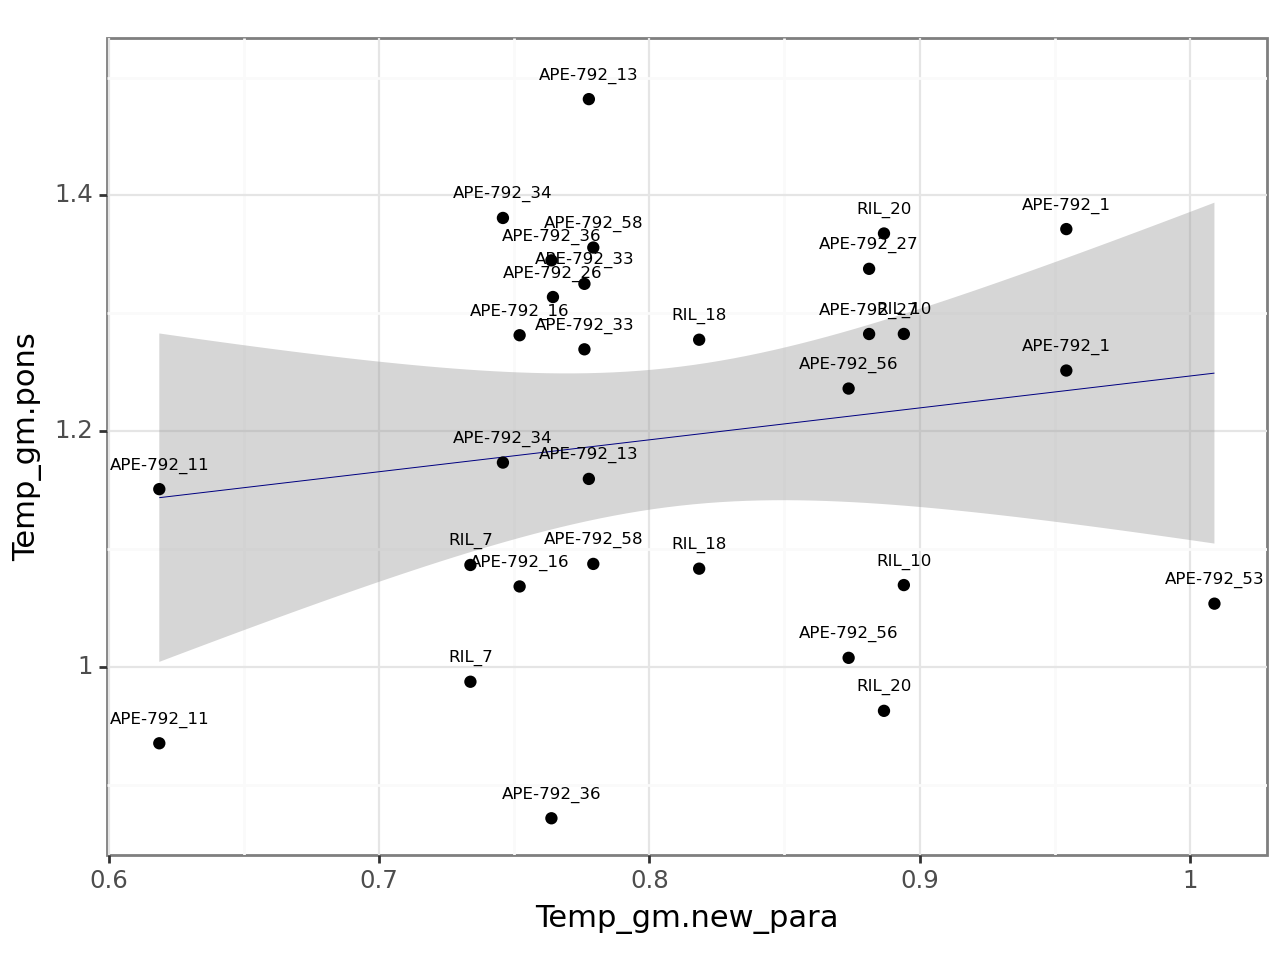


correlation for PostCing_gm is 0.38 with p-value of 0.0379


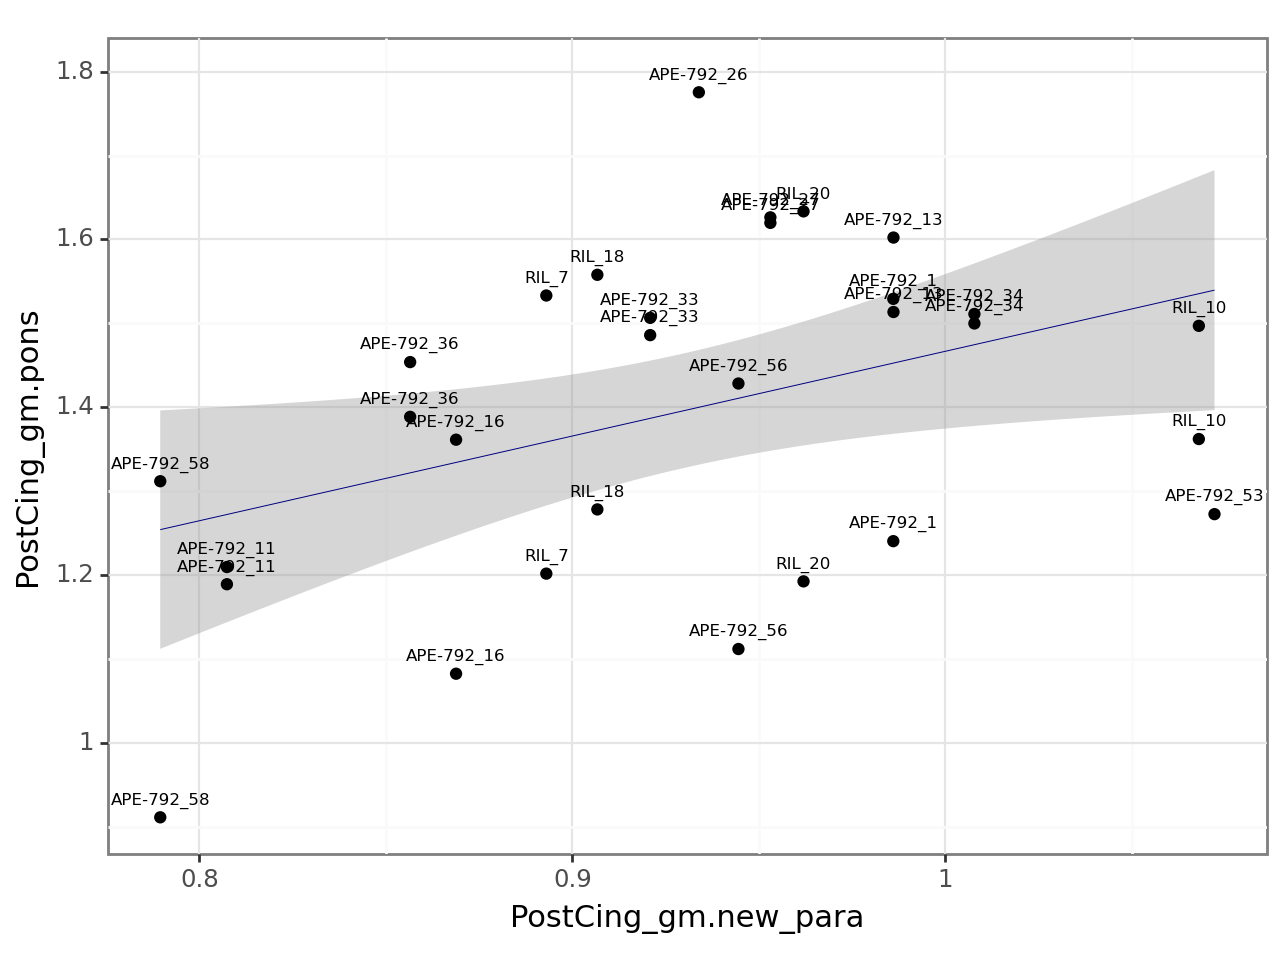

In [12]:
for var in [ele for ele in FDG_columns if (ele in new_para.columns) & (ele in pons.columns)]:
    temp1 = new_para.loc[new_para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = pons.loc[pons['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.new_para', '.pons'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.new_para'], temp_combined[var +'.pons'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.new_para', y = var +'.pons', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# pons and ras (0.37-0.67 correlation)

correlation for MTL_gm is 0.01 with p-value of 0.9404


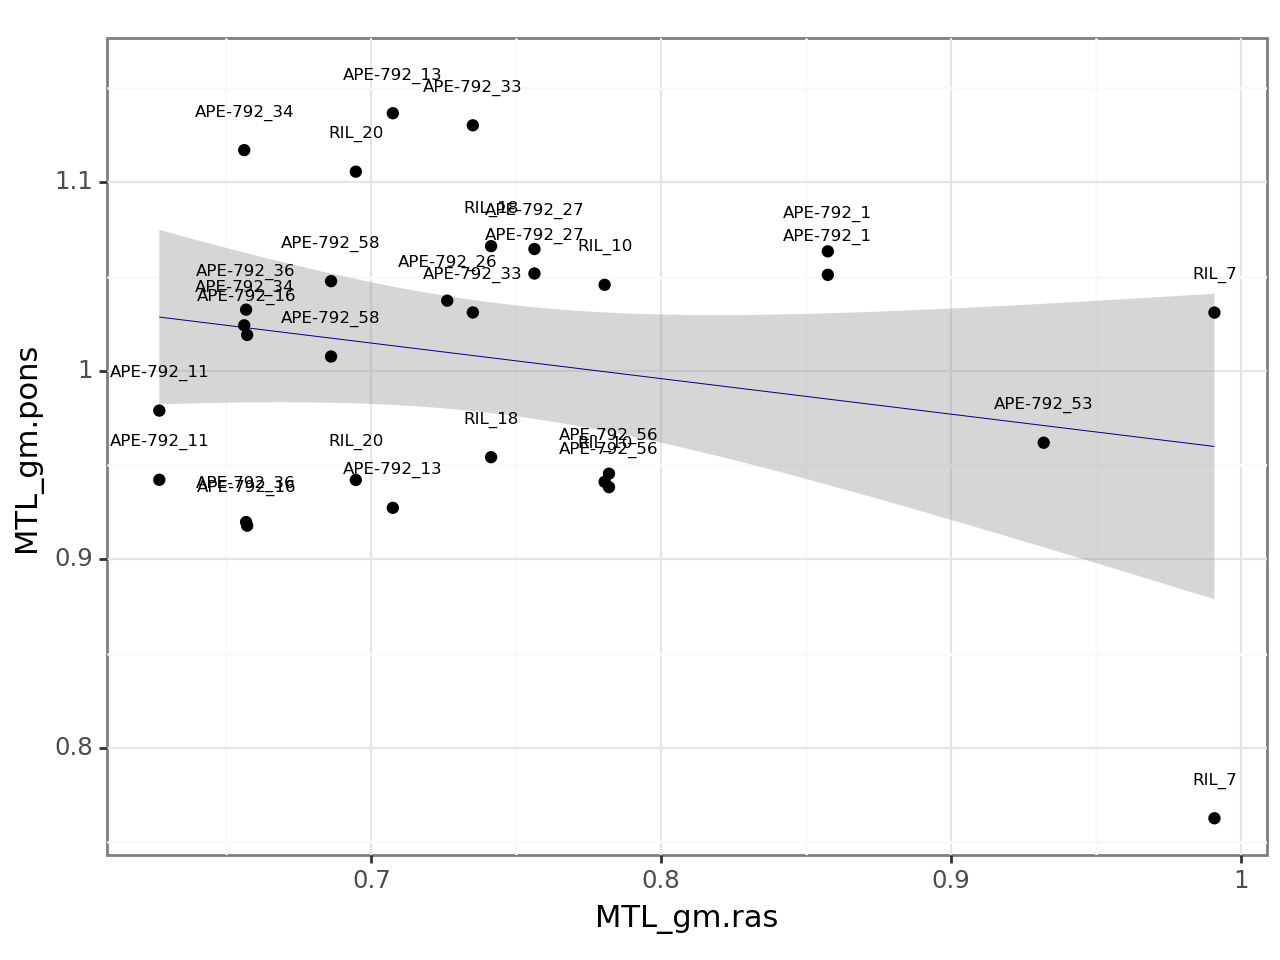


correlation for AC_gm is 0.16 with p-value of 0.3938


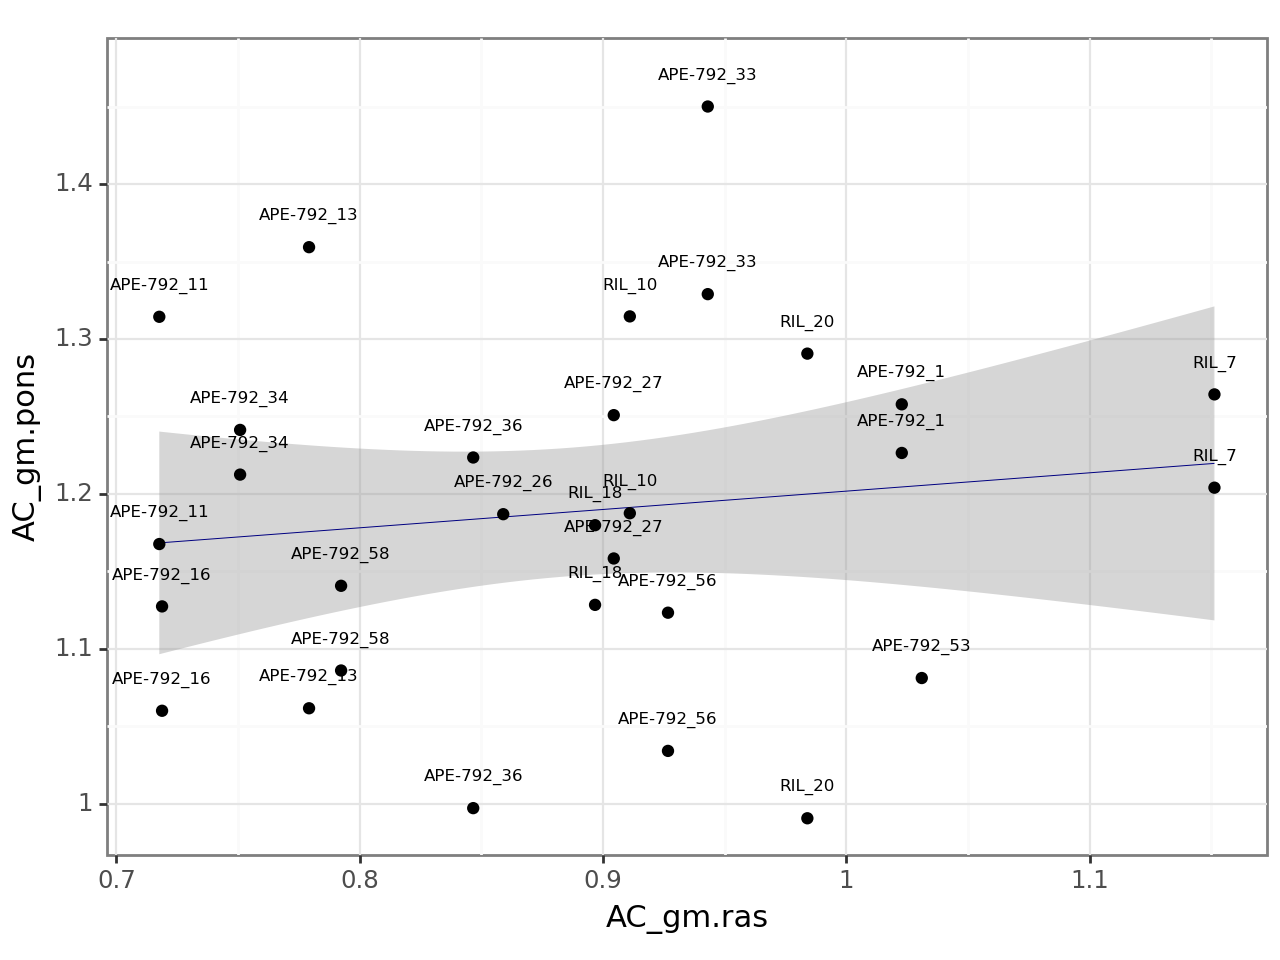


correlation for Precun_gm is 0.06 with p-value of 0.7584


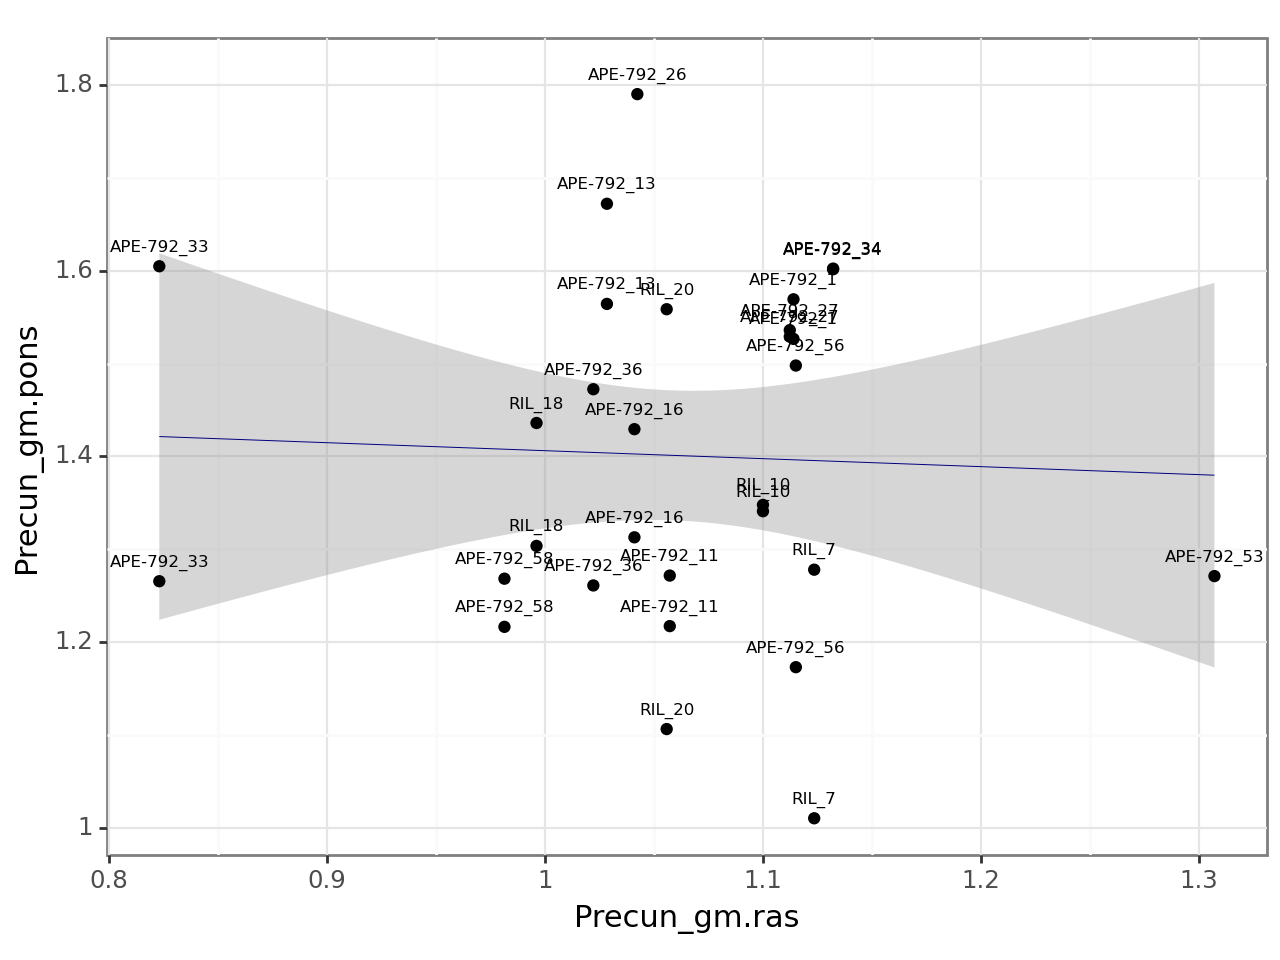


correlation for Par_gm is 0.25 with p-value of 0.1888


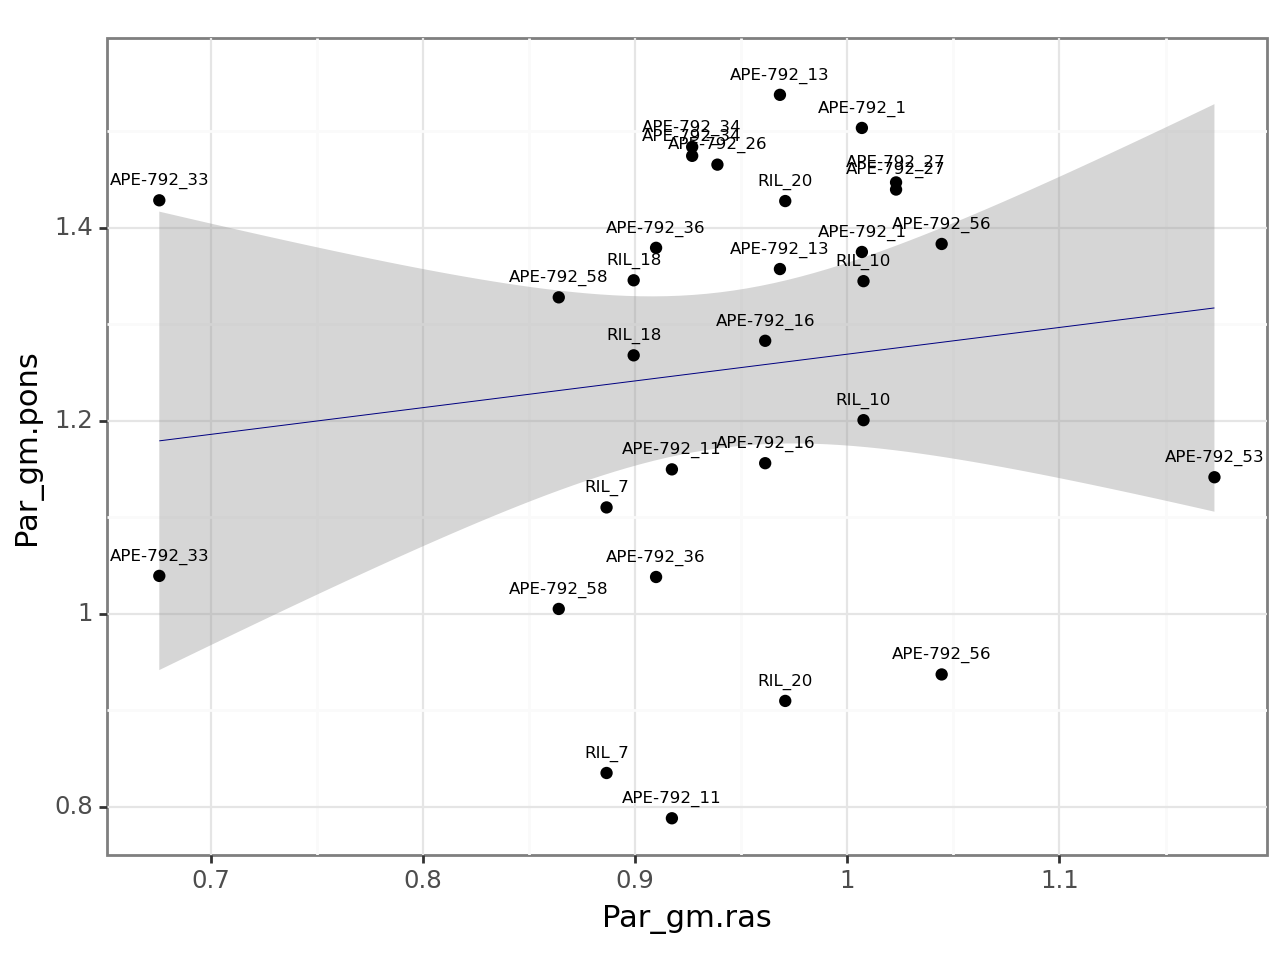


correlation for Temp_gm is -0.14 with p-value of 0.4768


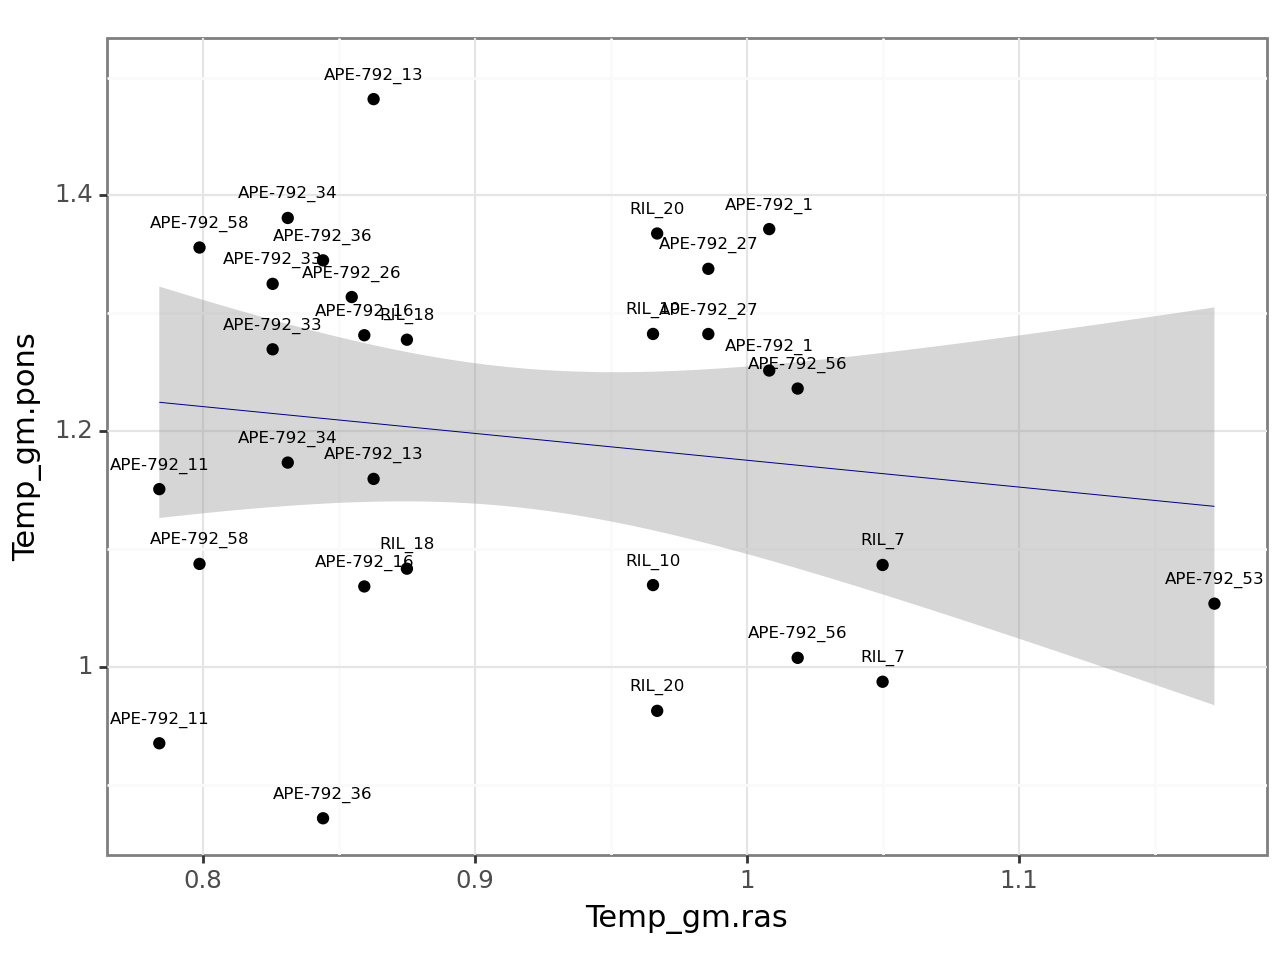


correlation for PostCing_gm is 0.19 with p-value of 0.3226


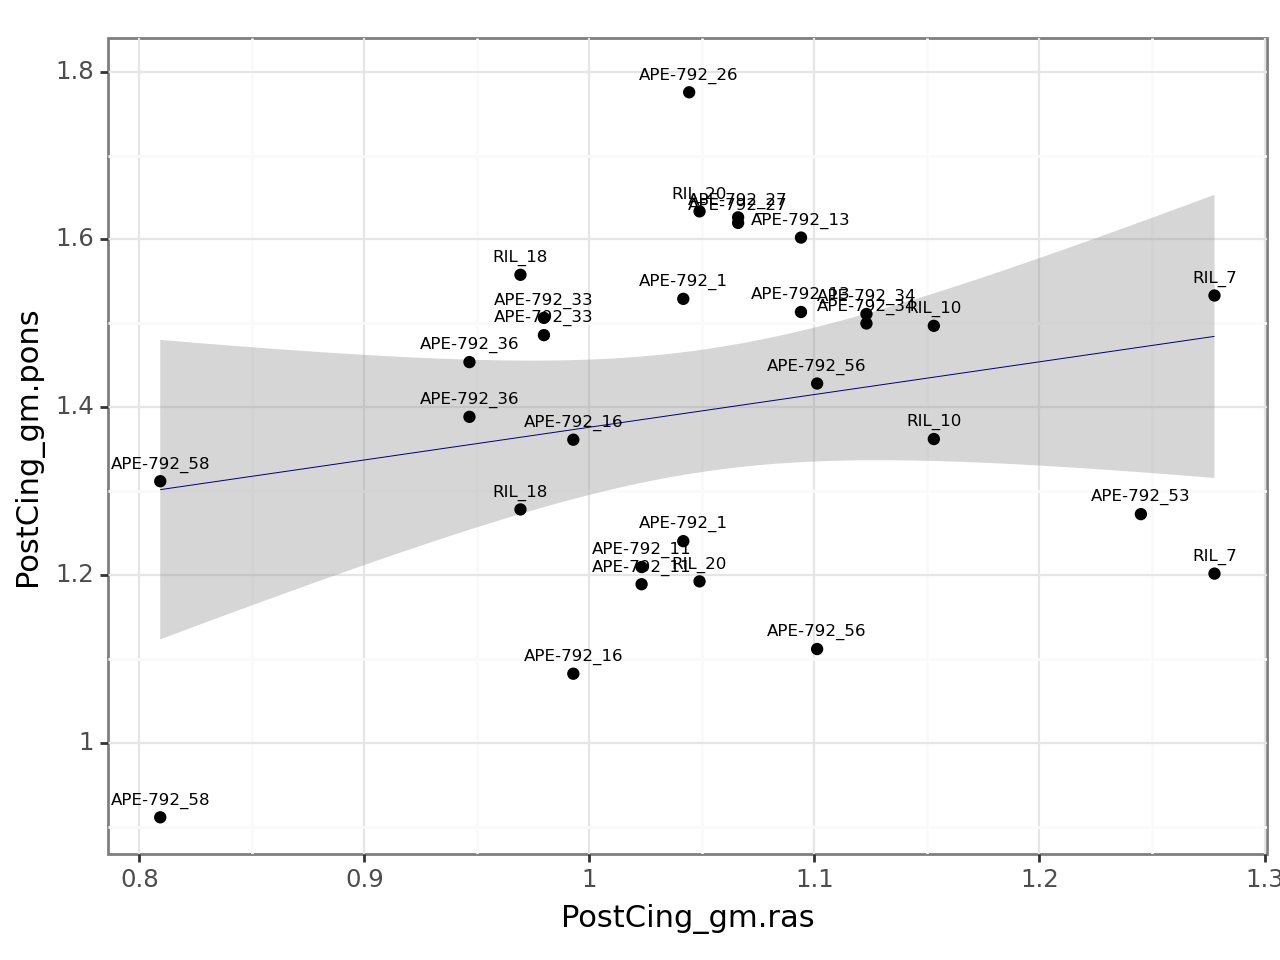

In [13]:
for var in [ele for ele in FDG_columns if (ele in ras.columns) & (ele in pons.columns)]:
    temp1 = ras.loc[ras['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = pons.loc[pons['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.ras', '.pons'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.ras'], temp_combined[var +'.pons'])
    print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.ras', y = var +'.pons', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))

# new_para and ras (0.51-0.85 correlation)

correlation for MTL_gm is 0.82 with p-value of 0.0


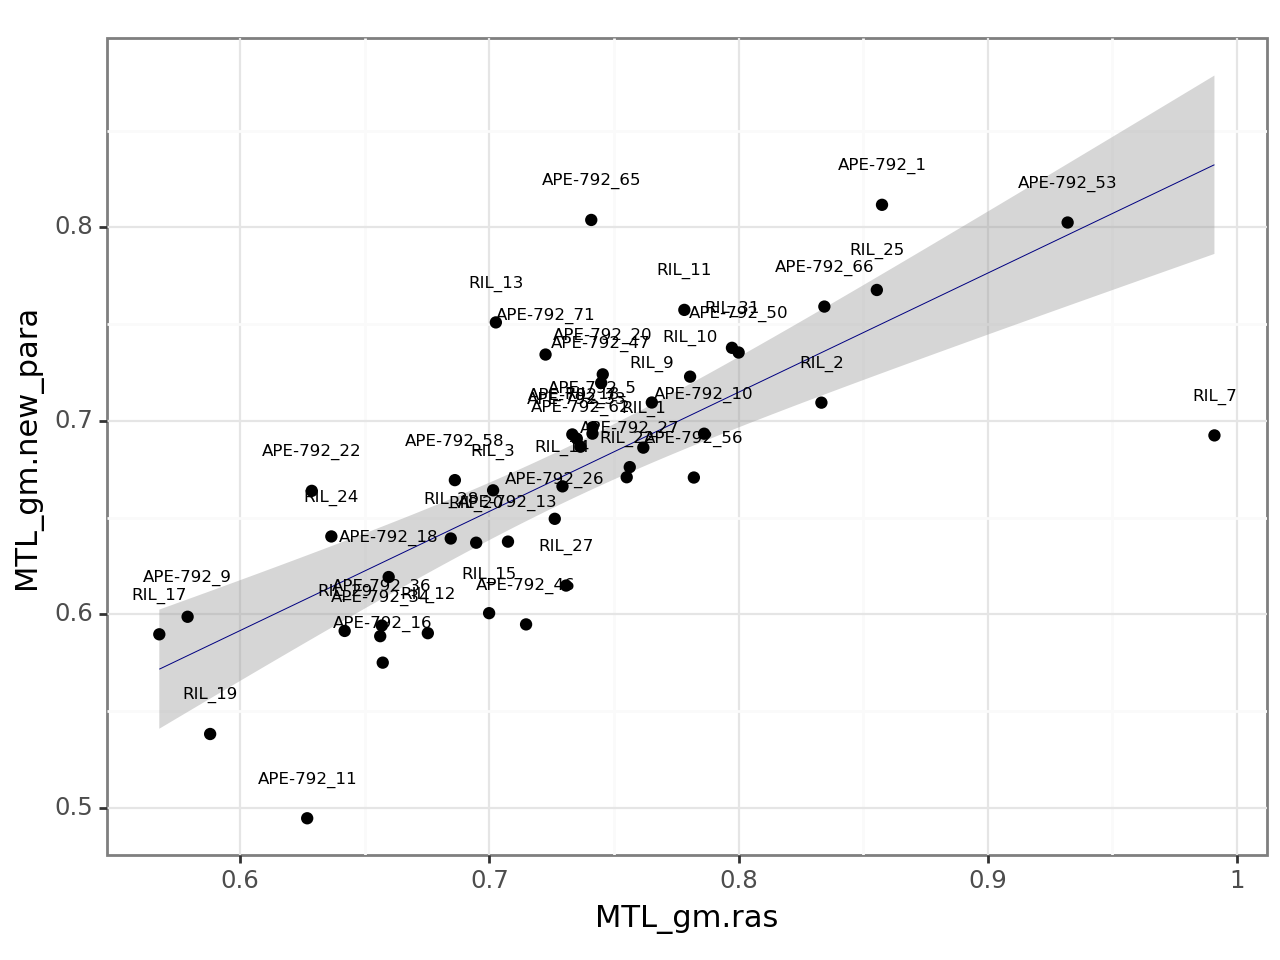


correlation for SensMot_gm is 0.51 with p-value of 0.0002


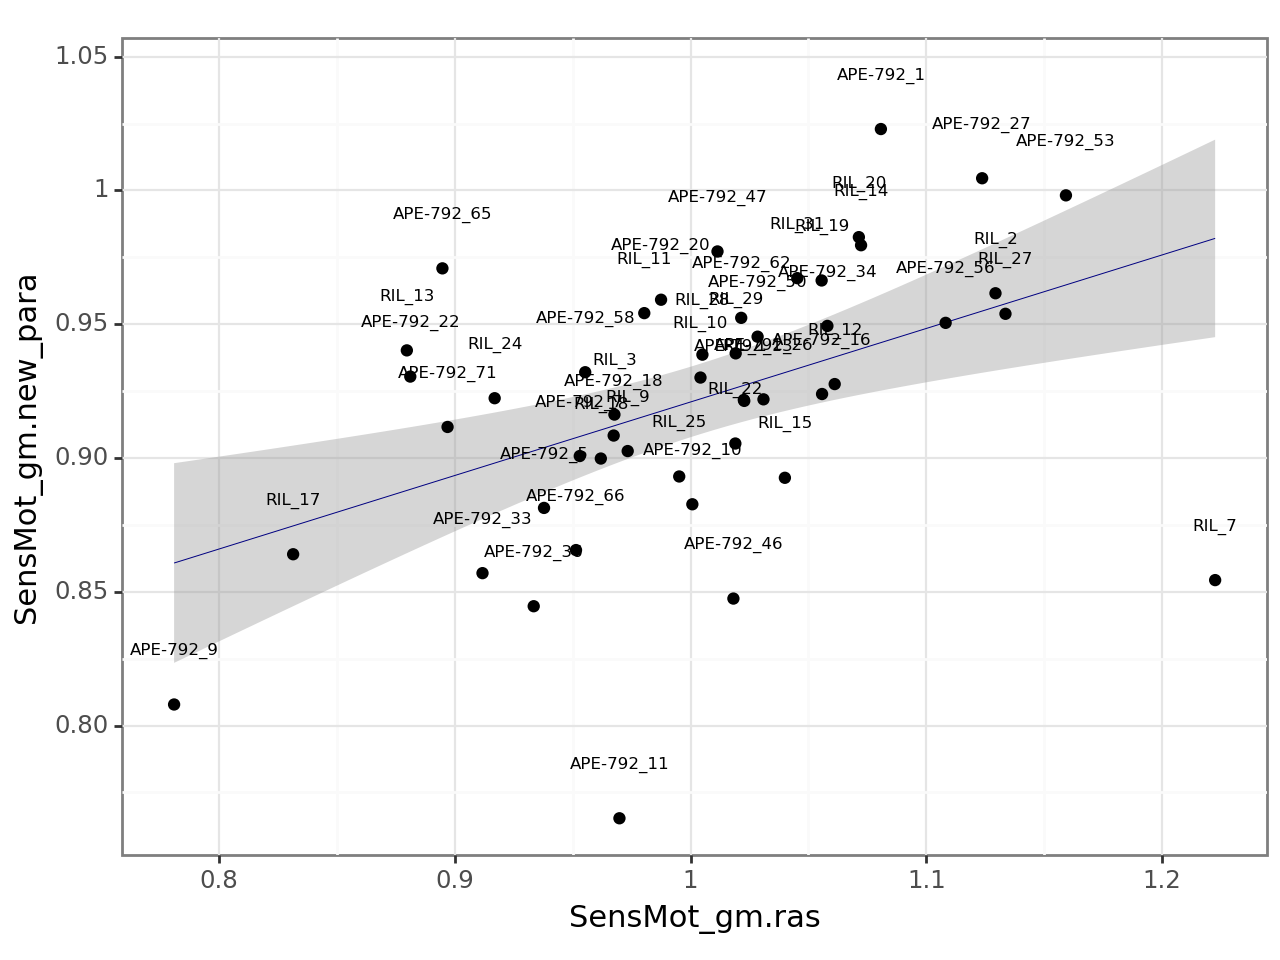


correlation for FRONTAL_gm is 0.68 with p-value of 0.0


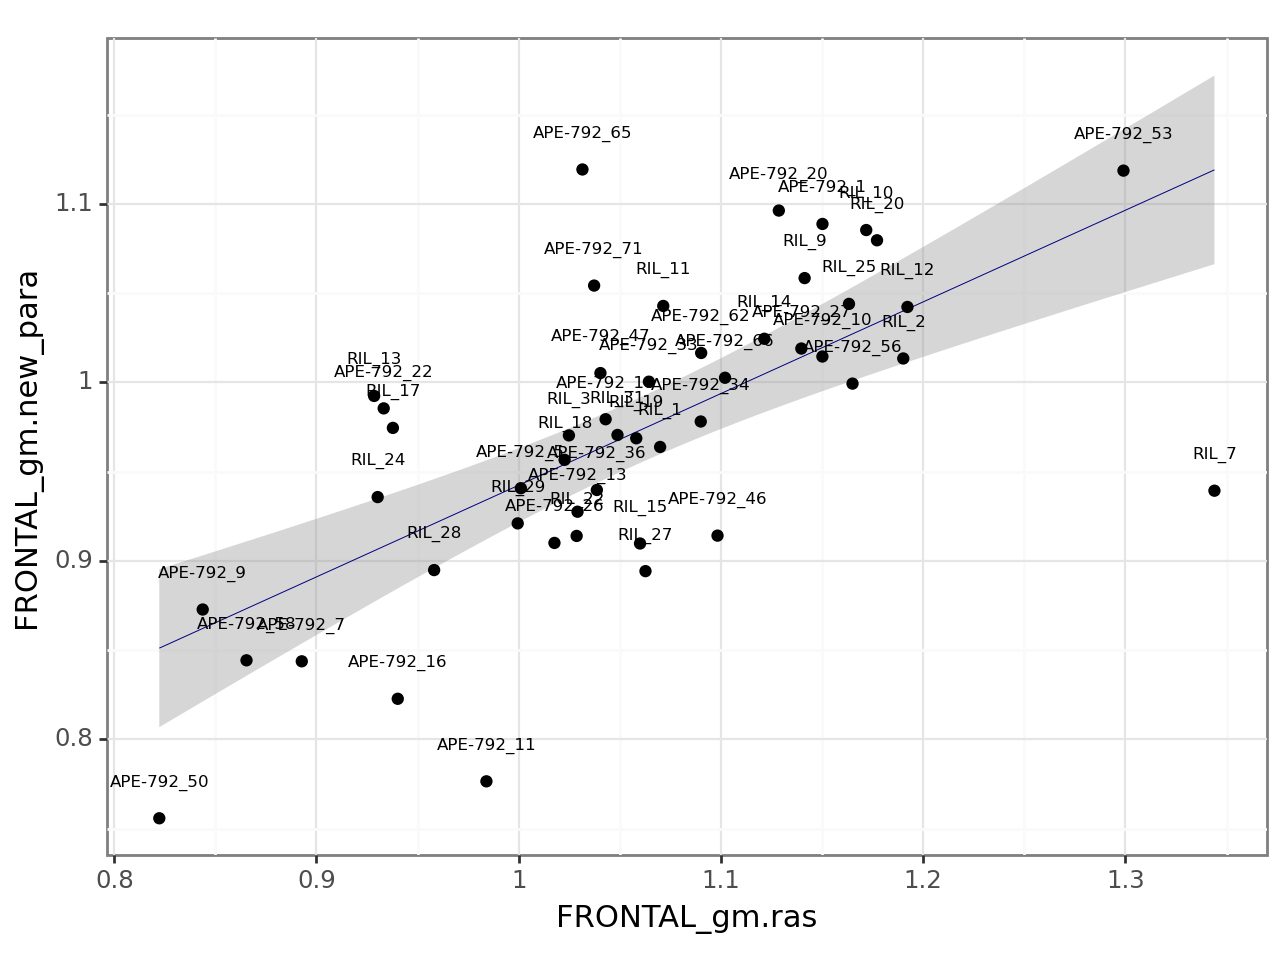


correlation for AC_gm is 0.81 with p-value of 0.0


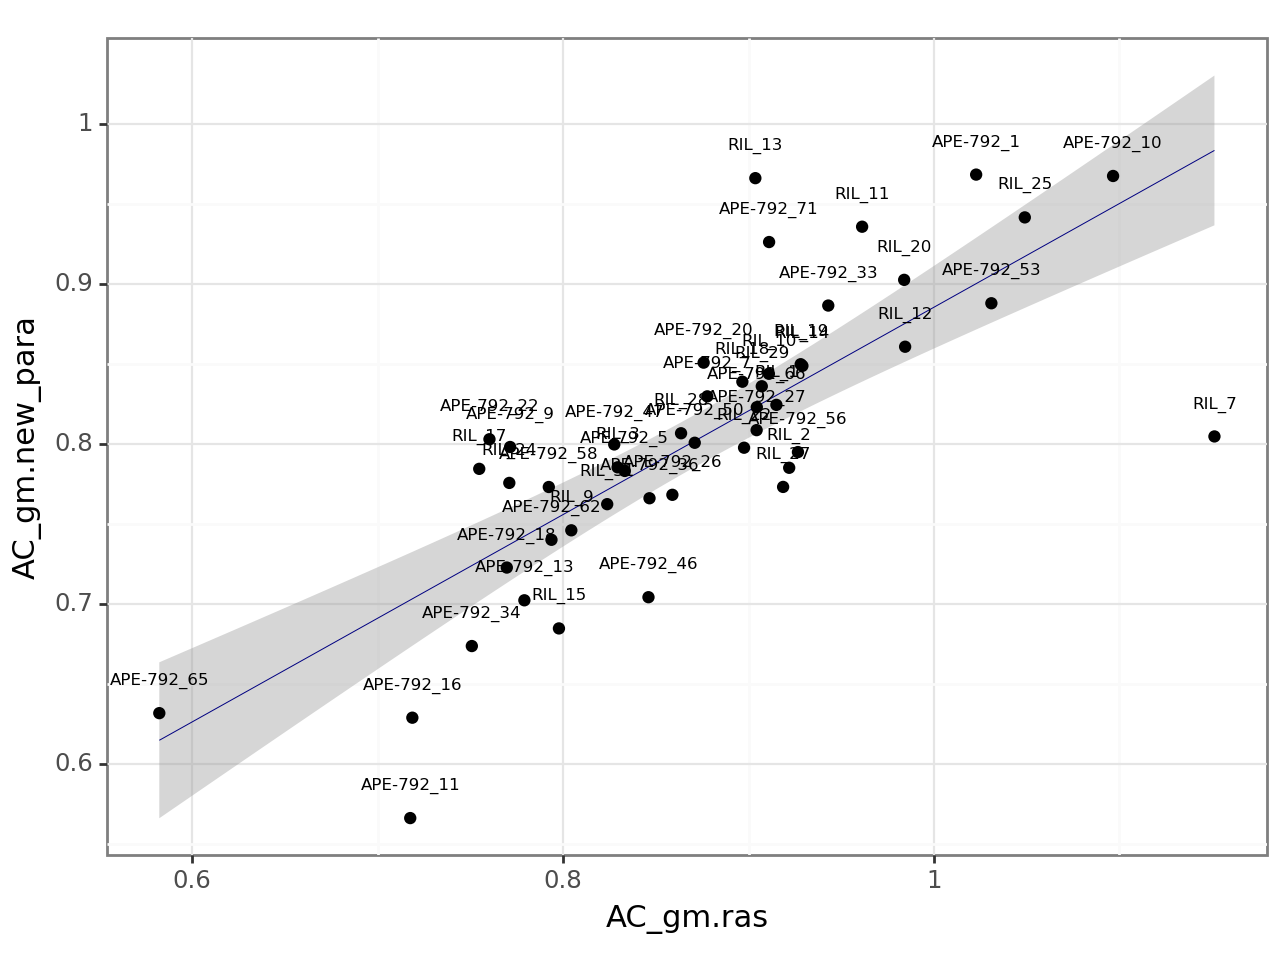


correlation for Precun_gm is 0.69 with p-value of 0.0


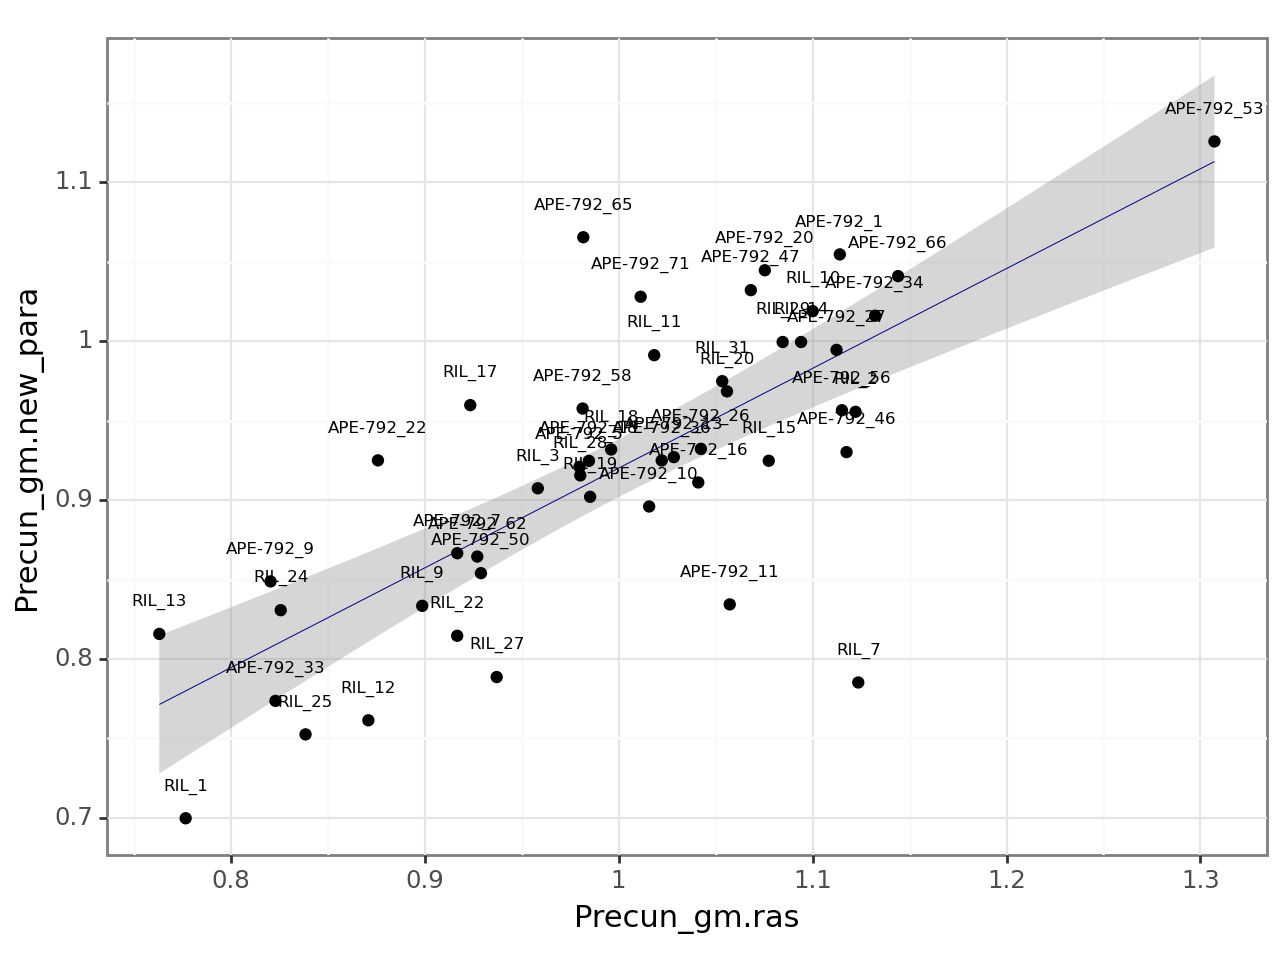


correlation for Par_gm is 0.85 with p-value of 0.0


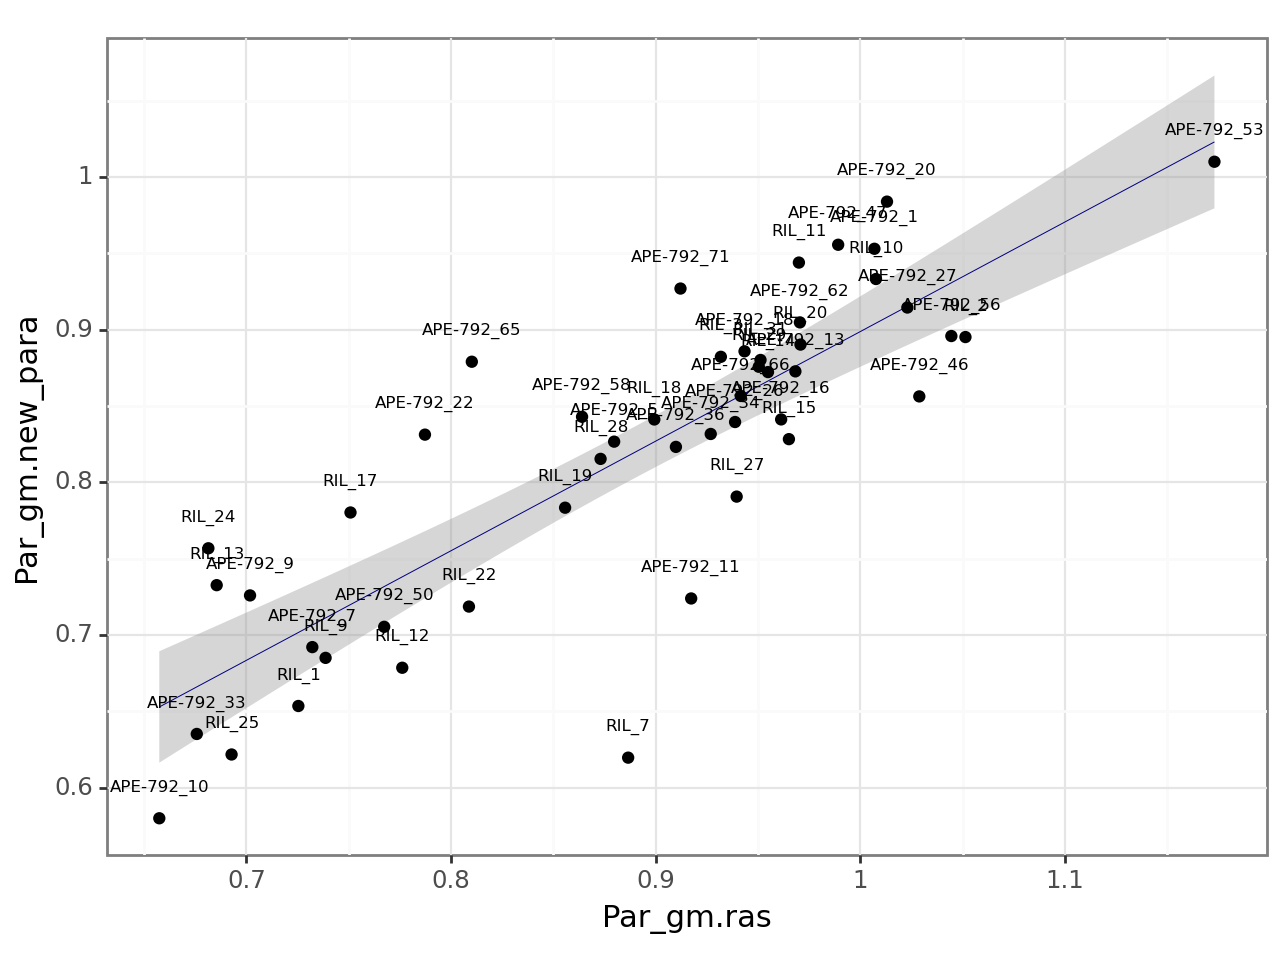


correlation for RASref1_gm is nan with p-value of nan


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\plotnine\stats\stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


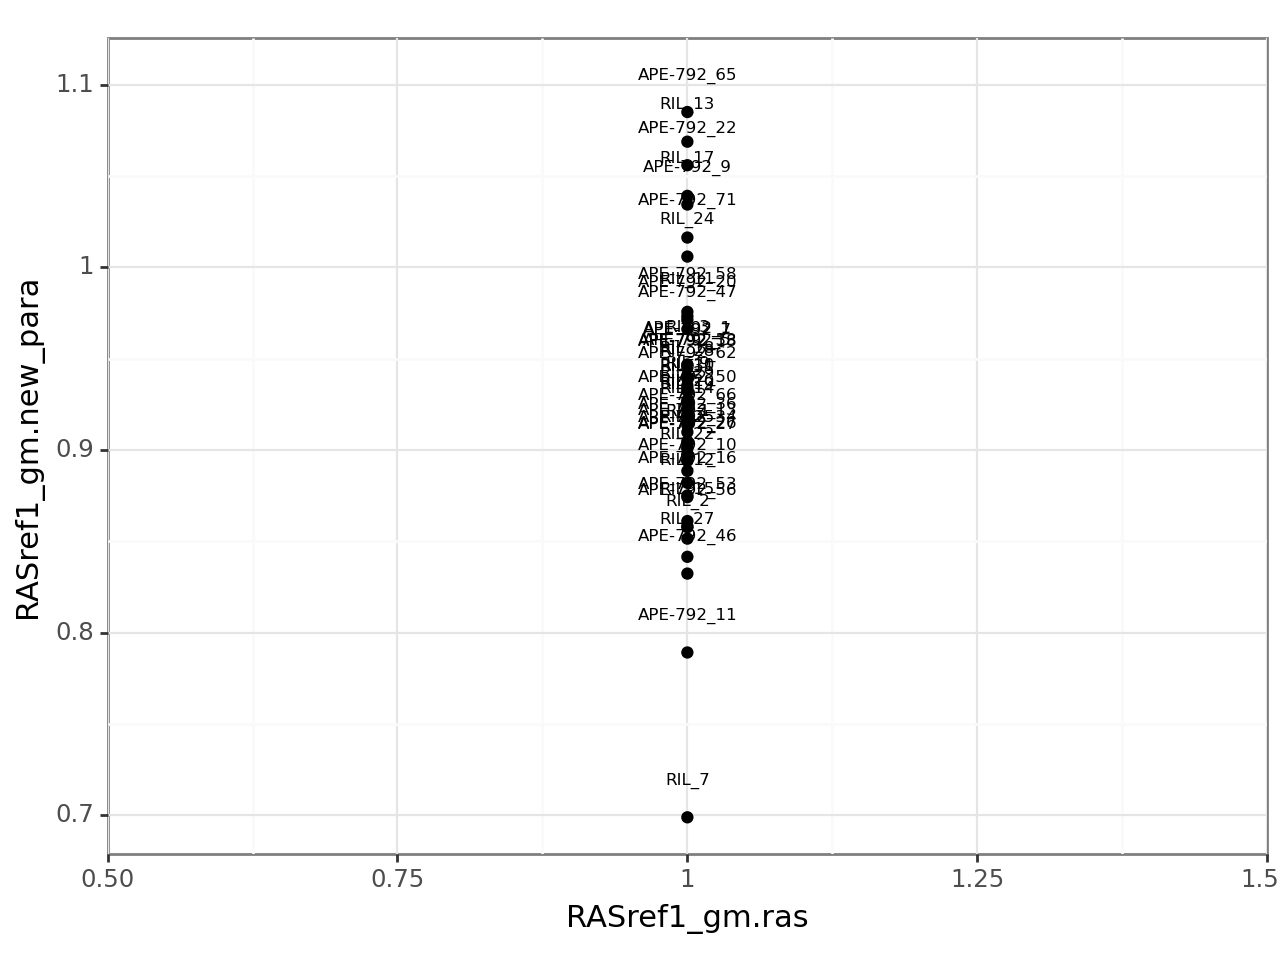


correlation for Temp_gm is 0.83 with p-value of 0.0


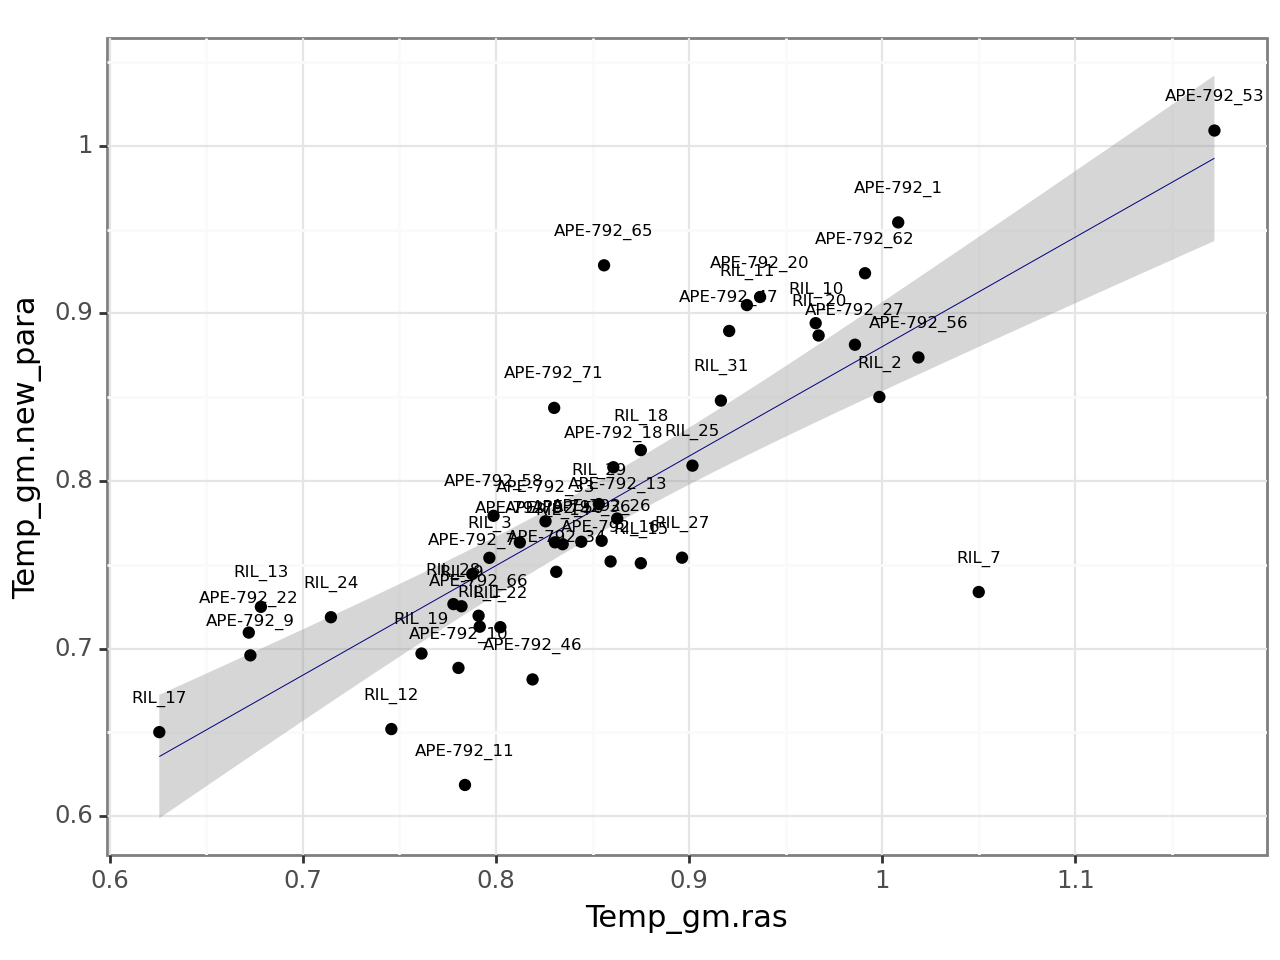


correlation for Paracentral_gm is nan with p-value of nan


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.


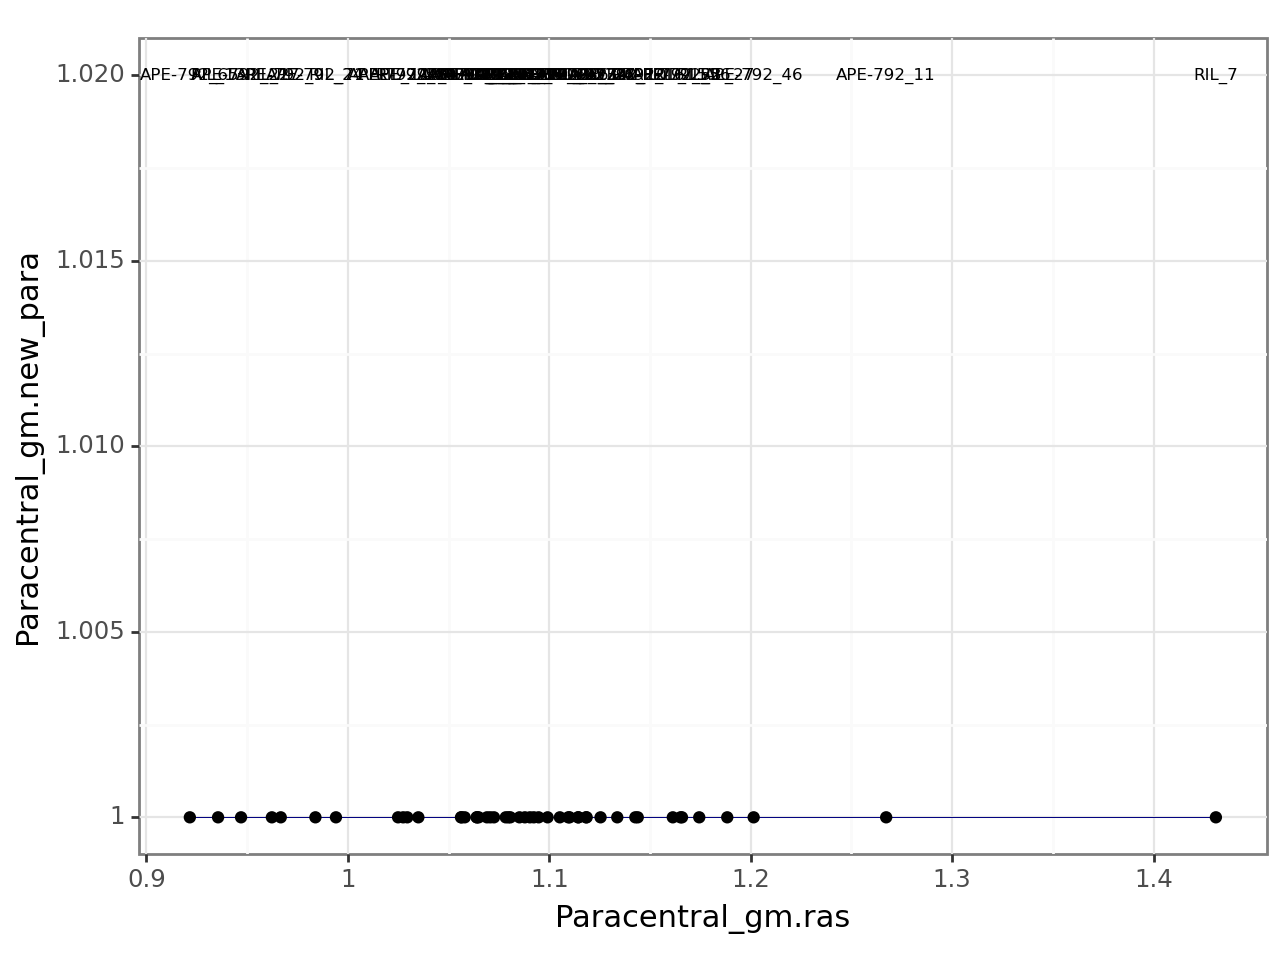


correlation for PostCing_gm is 0.79 with p-value of 0.0


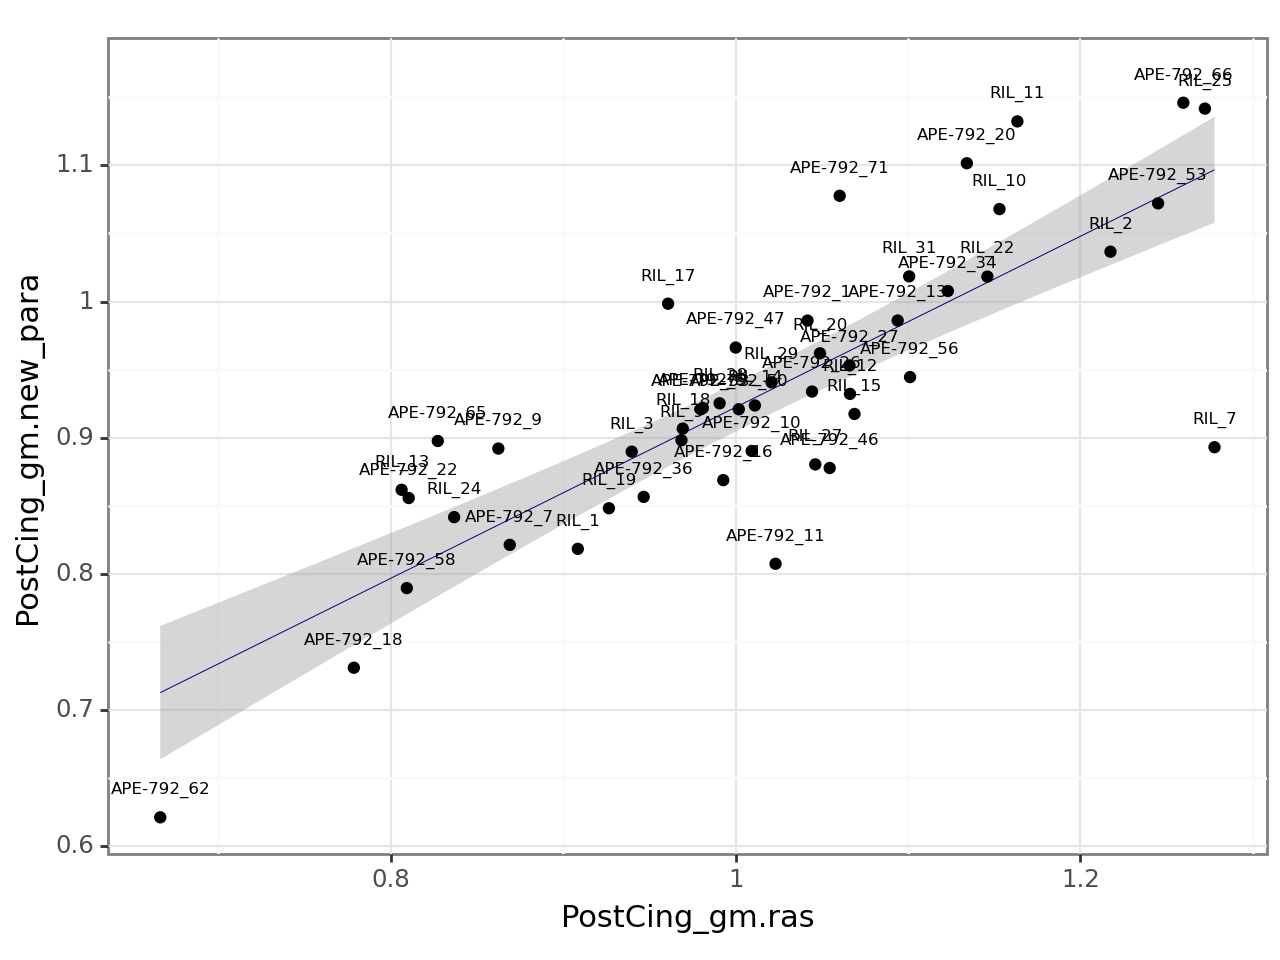

In [14]:
for var in [ele for ele in FDG_columns if (ele in ras.columns) & (ele in new_para.columns)]:
    temp1 = ras.loc[ras['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp2 = new_para.loc[new_para['timepoint'].isin(['base']), ['ID_ADM', var]]
    temp_combined = pd.merge(temp1, temp2, how = 'outer', on = ['ID_ADM'], suffixes=('.ras', '.new_para'))
    temp_combined = temp_combined.dropna()
    stat, pval = scipy.stats.spearmanr(temp_combined[var +'.ras'], temp_combined[var +'.new_para'])
    try:
      print('correlation for', var, 'is', stat.round(2), 'with p-value of', pval.round(4))    
    except:
      print('correlation for', var, 'is', stat, 'with p-value of', pval)    

    print(p9.ggplot(temp_combined, p9.aes(x = var +'.ras', y = var +'.new_para', label = 'ID_ADM'))
      + p9.theme_bw(base_size = 11)
      + p9.geom_smooth(method = 'lm', size = 0.2, color = 'navy')
      + p9.geom_point()
      + p9.geom_text(size = 6, nudge_x = 0, nudge_y =.02))